In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)


In [2]:
# Import Data
#data = pd.read_csv('data/data_encod.csv', index_col=[0])
data = pd.read_csv('data/data_729.csv', index_col=[0])
train=data[data.target.notnull()].reset_index(drop=True)
test=data[data.target.isna()].reset_index(drop=True)

print(f'Data: {data.shape}')
print(f'Train: {train.shape}') #(15539, 44)
print(f'Test: {test.shape}')

Data: (20574, 729)
Train: (15539, 729)
Test: (5035, 729)


In [3]:
train.head()

ID location      target   newtemp0  newprecip0  \
0     ID_train_0        C   45.126304  26.909091       0.000   
1     ID_train_1        D   79.131702  22.533333       0.102   
2    ID_train_10        A   32.661304  28.975000       0.000   
3   ID_train_100        A   53.850238  22.966667       0.000   
4  ID_train_1000        A  177.418750  21.875000       0.000   

   newrel_humidity0  newwind_dir0  windspeed0  atmospherepressure0   newtemp1  \
0          0.510818    272.902752    0.800909            87.777273  27.208333   
1          0.744583    281.664310    2.377500            90.320000  21.716667   
2          0.573333    328.682914    1.032500            88.551667  27.950000   
3          0.843083    300.085057    1.446667            88.615000  24.266667   
4          0.856417     21.839974    0.197500            88.556667  21.575000   

   ...  newrel_humidity119  newwind_dir119  windspeed119  \
0  ...                 NaN             NaN           NaN   
1  ...            0.649250       73.528733      1.475833   
2  ...            0.437917             NaN           NaN   
3  ...            0.766417             NaN           NaN   
4  ...                 NaN             NaN           NaN   

   atmospherepressure119  newtemp120  newprecip120  newrel_humidity120  \
0                    NaN         NaN           NaN                 NaN   
1              90.439167   21.450000         0.561            0.797333   
2              88.415833         NaN           NaN                 NaN   
3              88.490833   24.641667         0.000            0.719667   
4                    NaN         NaN           NaN                 NaN   

   newwind_dir120  windspeed120  atmospherepressure120  
0             NaN           NaN                    NaN  
1      296.967254      1.019167              90.529167  
2             NaN           NaN                    NaN  
3             NaN           NaN              88.465833  
4             NaN           NaN                    NaN  

[5 rows x 729 columns]

In [4]:
# select only Location D
train = train[(train['location']== 'D')]
train.shape

(4990, 729)

In [5]:
#fillna
train = train.fillna(train.mean())

/var/folders/gz/t1kyprv95tzc2bf6b375z94h0000gn/T/ipykernel_1504/361421783.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train = train.fillna(train.mean())


In [6]:
train.head()

ID location     target   newtemp0  newprecip0  \
1       ID_train_1        D  79.131702  22.533333       0.102   
10  ID_train_10005        D  55.638261  19.400000       0.000   
13  ID_train_10008        D  32.240851  27.808333       0.000   
15   ID_train_1001        D  72.717021  18.558333       0.000   
22  ID_train_10016        D  35.833571  28.841667       0.000   

    newrel_humidity0  newwind_dir0  windspeed0  atmospherepressure0  \
1           0.744583    281.664310    2.377500            90.320000   
10          0.927500     30.343767    0.348333            90.788333   
13          0.753917    153.221930    1.095000            90.427500   
15          0.939417    173.238391    0.380000            90.659167   
22          0.592167    321.349677    0.350833            90.260000   

     newtemp1  ...  newrel_humidity119  newwind_dir119  windspeed119  \
1   21.716667  ...            0.649250       73.528733      1.475833   
10  18.991667  ...            0.759167      178.252679      0.896736   
13  29.108333  ...            0.786333      101.535318      1.511667   
15  19.266667  ...            0.871250      270.524749      0.454167   
22  26.475000  ...            0.666833      178.252679      0.896736   

    atmospherepressure119  newtemp120  newprecip120  newrel_humidity120  \
1               90.439167   21.450000         0.561            0.797333   
10              90.555833   20.491667         0.000            0.779958   
13              90.554167   22.083333         2.229            0.915818   
15              90.512500   19.716667         0.000            0.905083   
22              90.239167   26.850000         0.000            0.642583   

    newwind_dir120  windspeed120  atmospherepressure120  
1       296.967254      1.019167              90.529167  
10      177.704952      0.897390              90.531667  
13      331.308648      1.970000              90.527500  
15      231.191039      0.388333              90.477500  
22      177.704952      0.897390              90.217500  

[5 rows x 729 columns]

In [7]:
columns_to_drop = ['target', 'ID', 'location']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 726)
y: (4990,)
X_train: (3493, 726)
y_train: (3493,)
X_test: (1497, 726)
y_test: (1497,)


## Linear Regression

In [8]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Instantiate our model 
lin_reg = LinearRegression()
lin_reg_scaled = LinearRegression()
# Train the model using our data
lin_reg.fit(X_train, y_train)
lin_reg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

y_pred_train_scaled = lin_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = lin_reg_scaled.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [12]:
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

rsme_lin_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_lin_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_lin_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_lin_reg_test_scaled:.2f}')

RSME _ train: 22.54
RSME _ test: 29.37
RSME _ train_scaled: 22.54
RSME _ test_scaled: 29.37


In [13]:
print(f' max coef: {max(lin_reg.coef_)}')
print(f' min coef: {min(abs(lin_reg.coef_))}')

 max coef: 48.10445251247902
 min coef: 6.402891180101733e-05


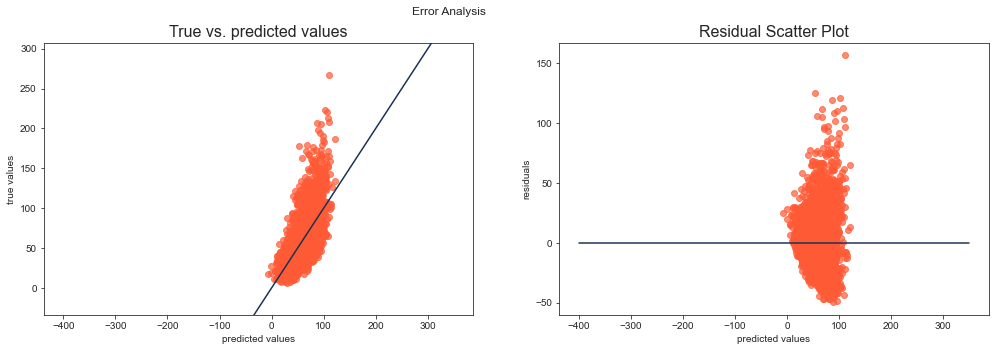

In [14]:
# error analysis train:
error_analysis(y_train, y_pred_train)

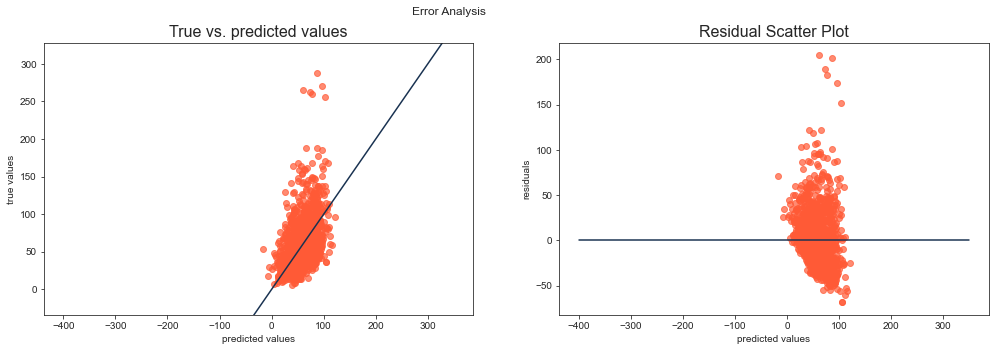

In [15]:
# error analysis test:
error_analysis(y_test, y_pred_test)

In [16]:
# error analysis test:
#error_analysis(y_test, y_pred_test_scaled)

### Lasso


RSME _ train: 25.92
RSME _ test: 29.18


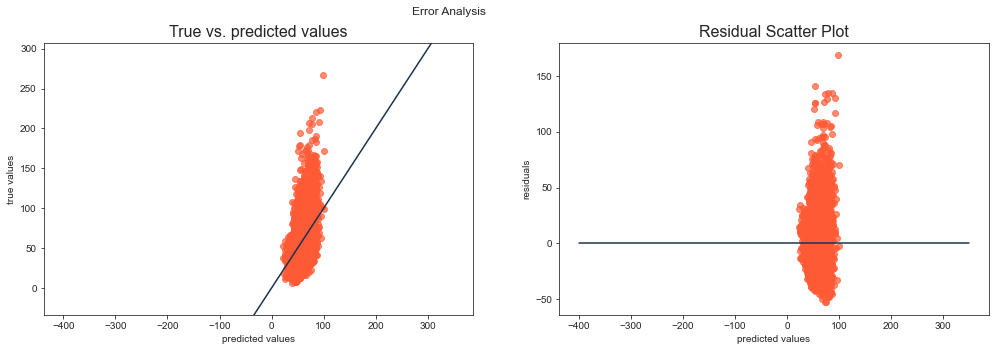

In [17]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)


In [18]:
print(f' max coef: {max(lasso_reg.coef_)}')
print(f' min coef: {min(lasso_reg.coef_)}')

 max coef: 0.7426770037343289
 min coef: -1.6086135469492795


### Ridge


RSME _ train: 22.64
RSME _ test: 28.74


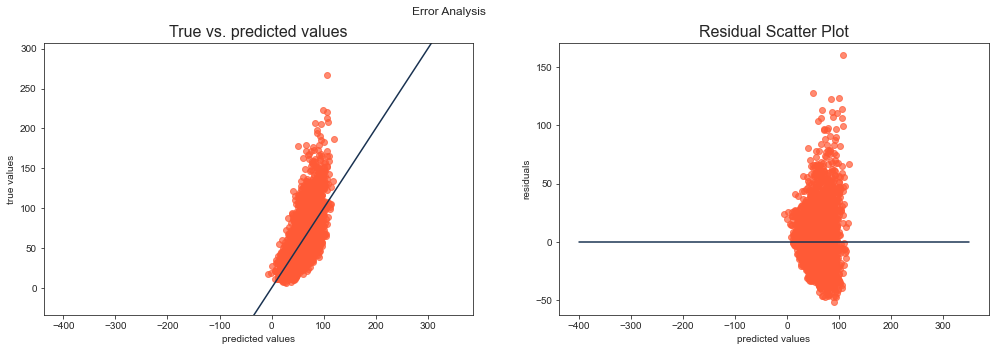

In [19]:
from sklearn.linear_model import Ridge

# Instantiate our model 
ridge_reg = Ridge()

# Train the model using our data
ridge_reg.fit(X_train, y_train)

# predict

y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

rsme_ridge_reg_train = rmse(y_train, y_pred_train)
rsme_ridge_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_ridge_reg_train:.2f}')
print(f'RSME _ test: {rsme_ridge_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### linear Regression on log y

In [20]:
y_log = np.log1p(y_train)


In [21]:
y_pred_train

array([58.51306071, 48.1860373 , 90.82193909, ..., 56.91790465,
       40.2683471 , 53.77077216])

RSME _ train: 23.11
RSME _ test: 29.04


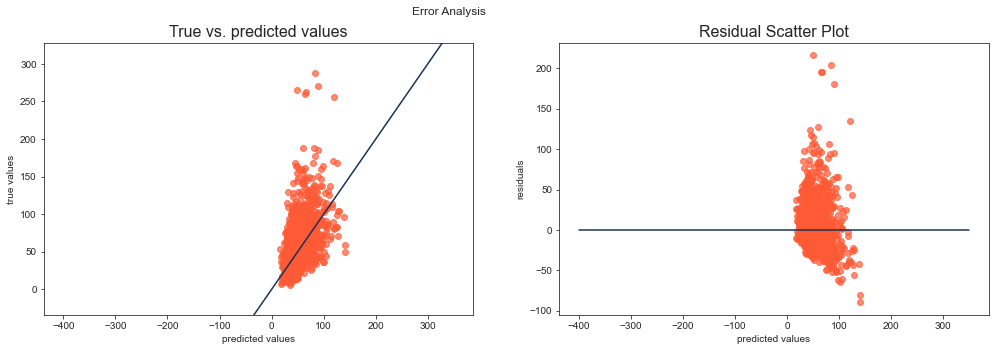

In [22]:
# Instantiate our model 
lin_log_reg = LinearRegression()

# Train the model using our data
lin_log_reg.fit(X_train, y_log) # y´= log(y+1)

# predict

y_pred_train_log = lin_log_reg.predict(X_train) # y = exp(y´) - 1
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test_log = lin_log_reg.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)


rsme_lin_log_reg_train = rmse(y_train, y_pred_train )
rsme_lin_log_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_log_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_log_reg_test:.2f}')

# error analysis test:
error_analysis(y_test, y_pred_test)

# EDA on features

In [23]:
train.head()

ID location     target   newtemp0  newprecip0  \
1       ID_train_1        D  79.131702  22.533333       0.102   
10  ID_train_10005        D  55.638261  19.400000       0.000   
13  ID_train_10008        D  32.240851  27.808333       0.000   
15   ID_train_1001        D  72.717021  18.558333       0.000   
22  ID_train_10016        D  35.833571  28.841667       0.000   

    newrel_humidity0  newwind_dir0  windspeed0  atmospherepressure0  \
1           0.744583    281.664310    2.377500            90.320000   
10          0.927500     30.343767    0.348333            90.788333   
13          0.753917    153.221930    1.095000            90.427500   
15          0.939417    173.238391    0.380000            90.659167   
22          0.592167    321.349677    0.350833            90.260000   

     newtemp1  ...  newrel_humidity119  newwind_dir119  windspeed119  \
1   21.716667  ...            0.649250       73.528733      1.475833   
10  18.991667  ...            0.759167      178.252679      0.896736   
13  29.108333  ...            0.786333      101.535318      1.511667   
15  19.266667  ...            0.871250      270.524749      0.454167   
22  26.475000  ...            0.666833      178.252679      0.896736   

    atmospherepressure119  newtemp120  newprecip120  newrel_humidity120  \
1               90.439167   21.450000         0.561            0.797333   
10              90.555833   20.491667         0.000            0.779958   
13              90.554167   22.083333         2.229            0.915818   
15              90.512500   19.716667         0.000            0.905083   
22              90.239167   26.850000         0.000            0.642583   

    newwind_dir120  windspeed120  atmospherepressure120  
1       296.967254      1.019167              90.529167  
10      177.704952      0.897390              90.531667  
13      331.308648      1.970000              90.527500  
15      231.191039      0.388333              90.477500  
22      177.704952      0.897390              90.217500  

[5 rows x 729 columns]

/var/folders/gz/t1kyprv95tzc2bf6b375z94h0000gn/T/ipykernel_1504/3208552227.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


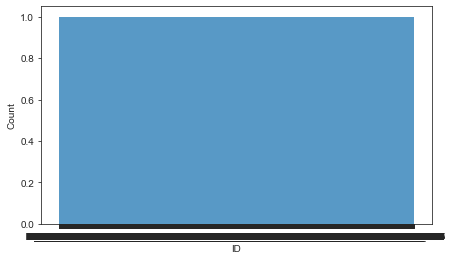

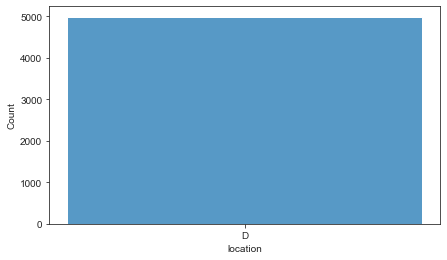

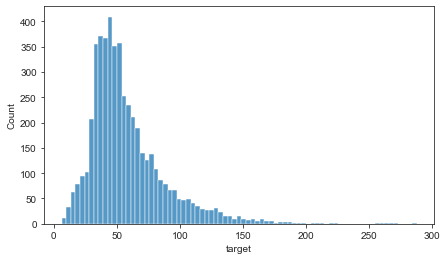

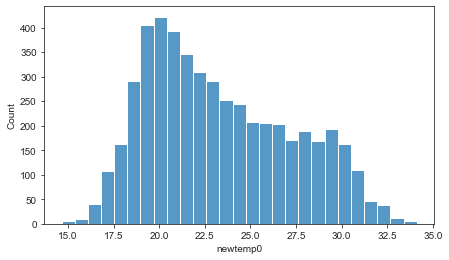

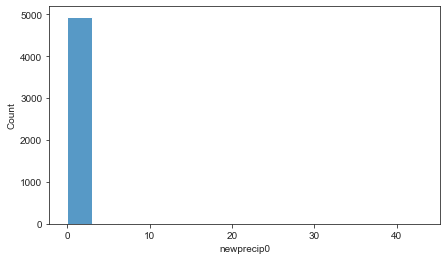

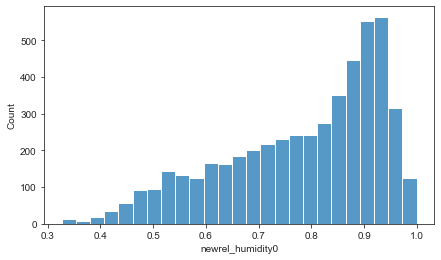

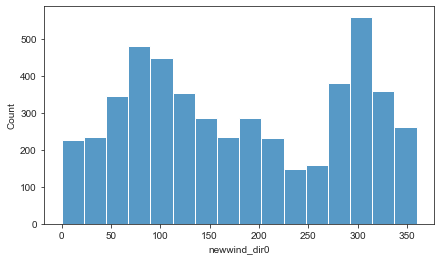

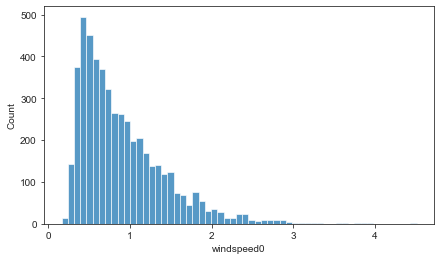

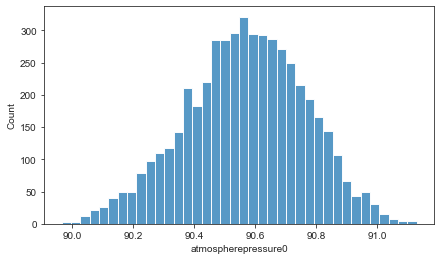

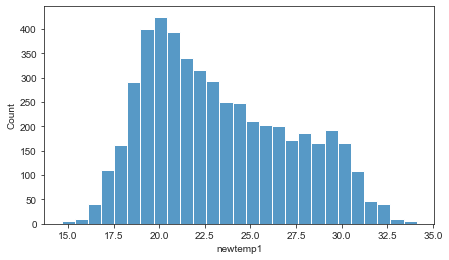

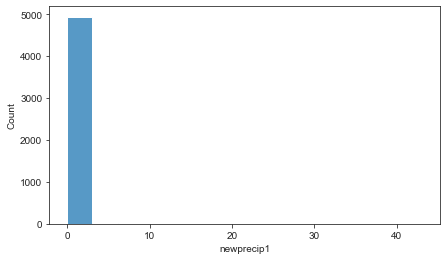

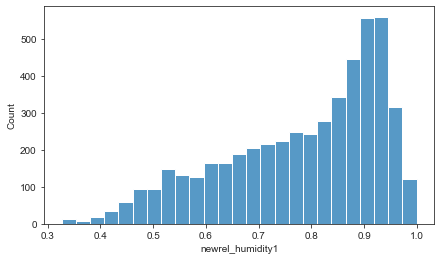

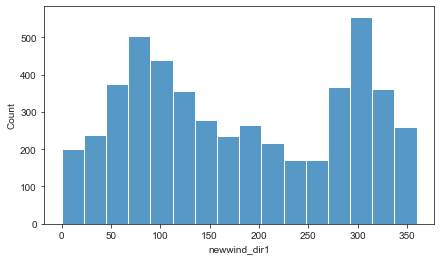

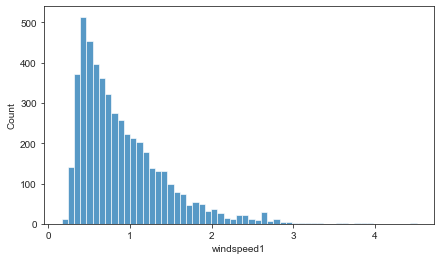

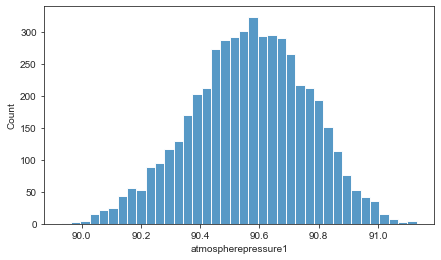

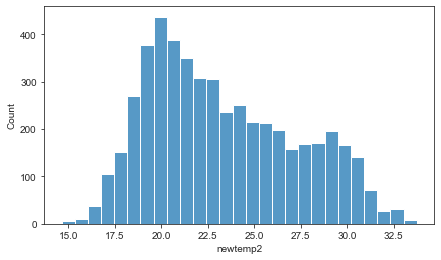

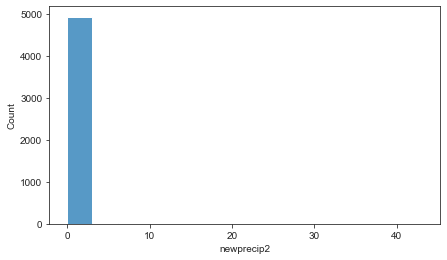

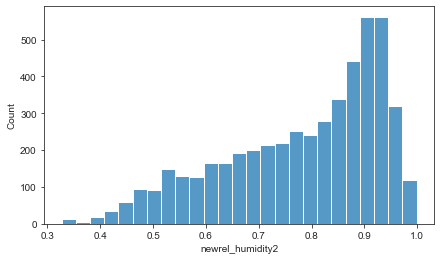

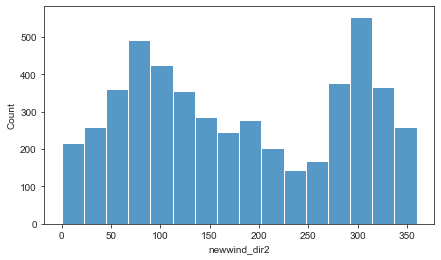

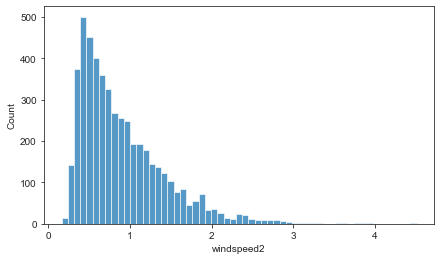

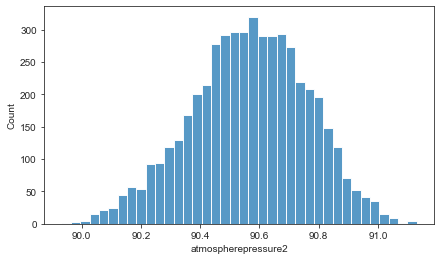

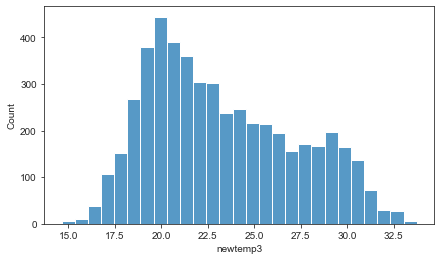

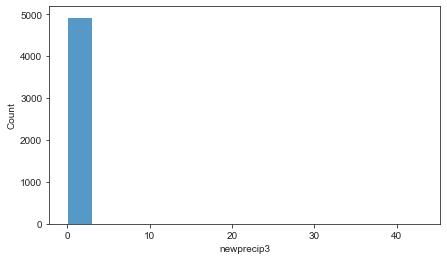

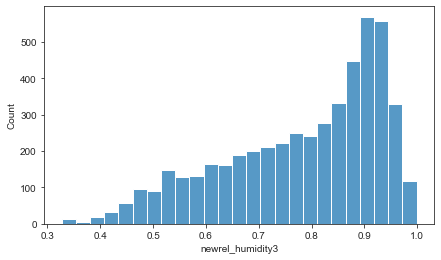

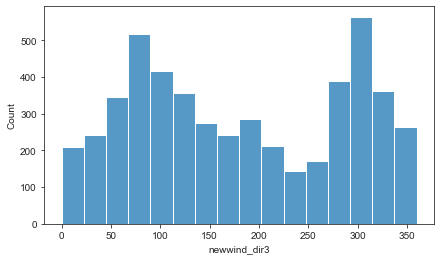

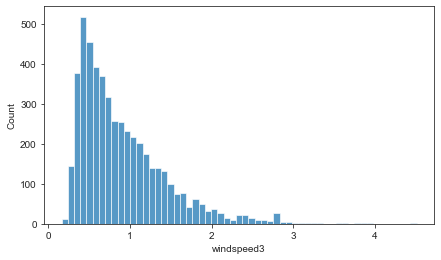

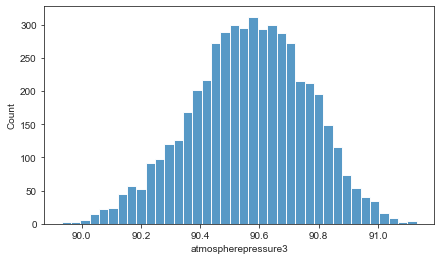

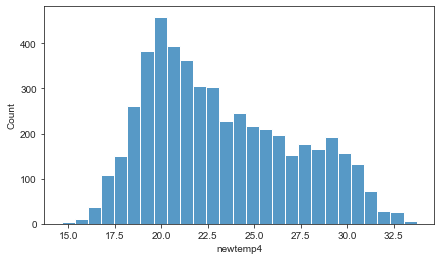

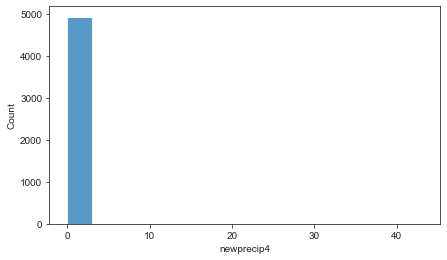

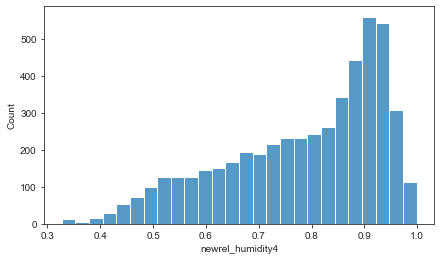

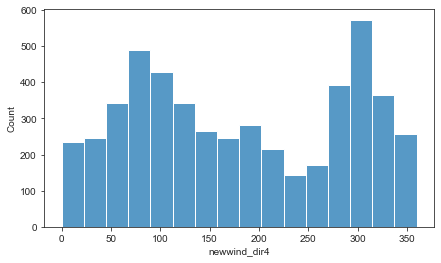

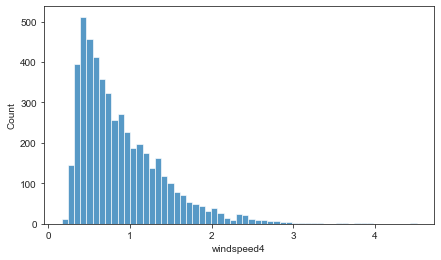

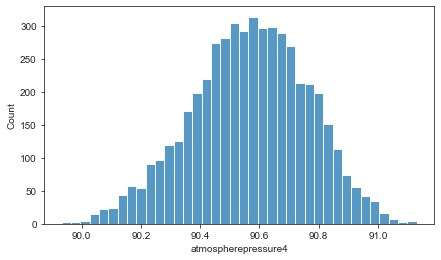

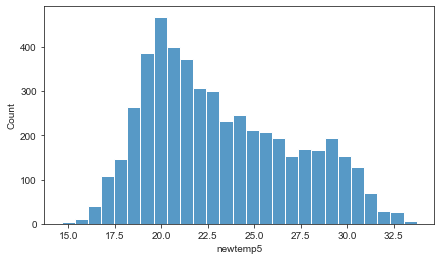

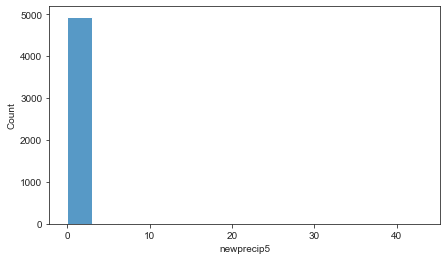

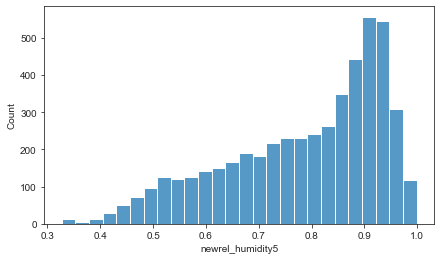

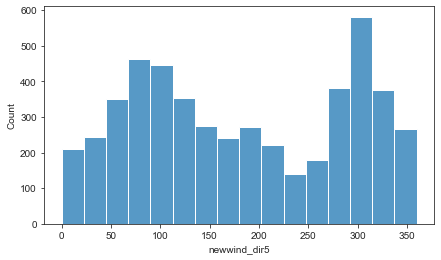

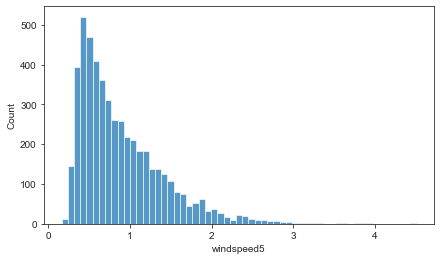

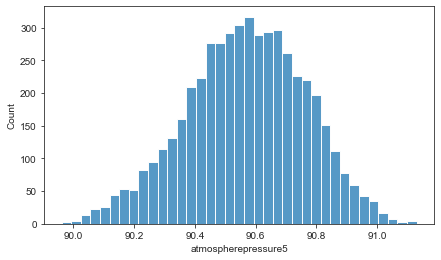

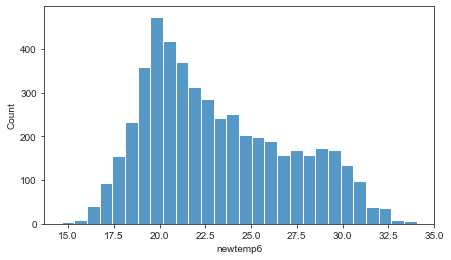

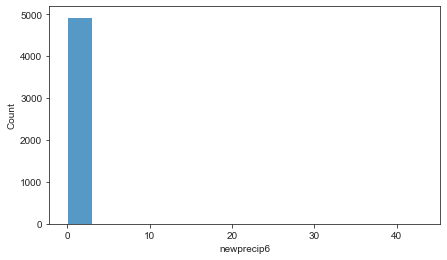

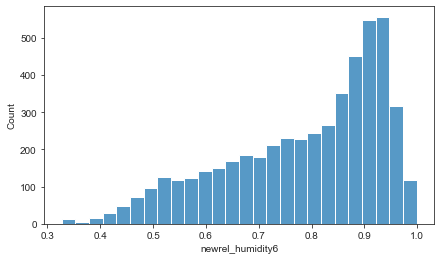

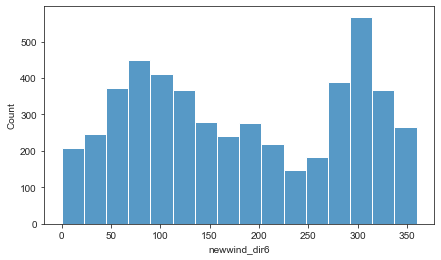

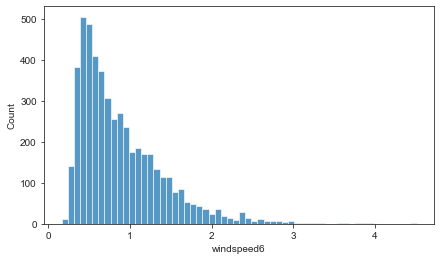

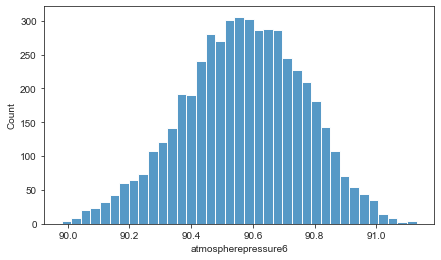

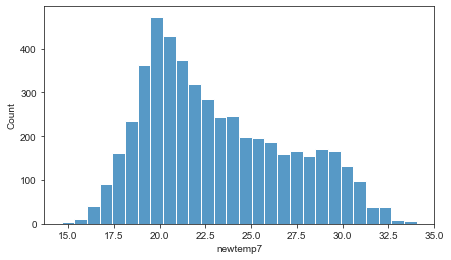

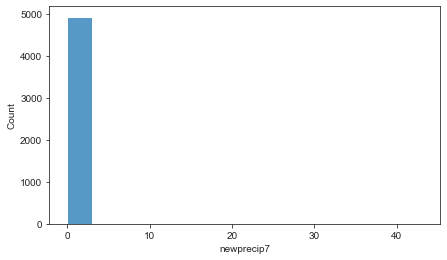

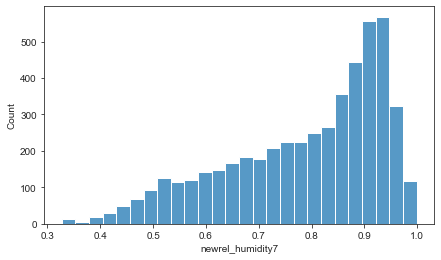

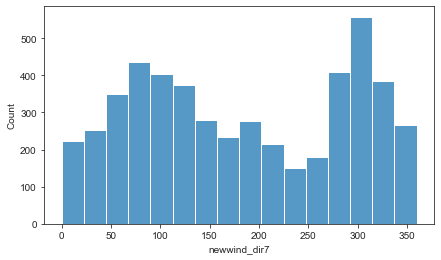

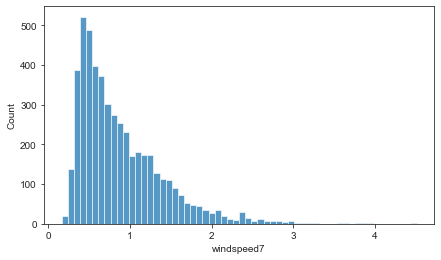

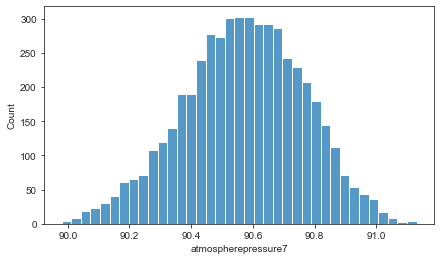

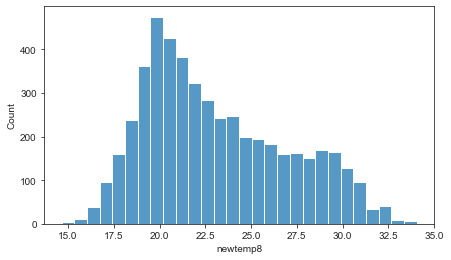

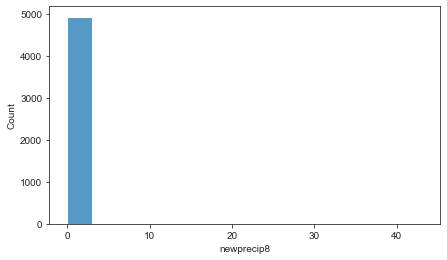

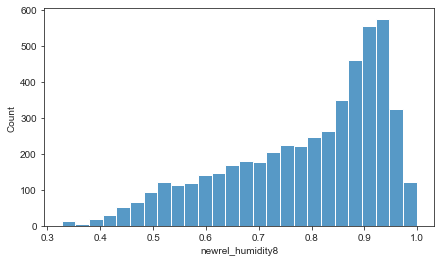

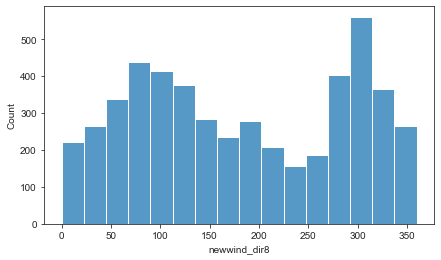

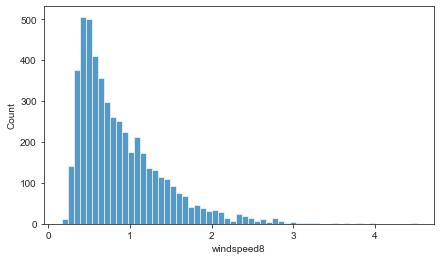

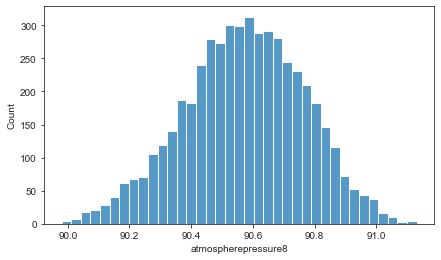

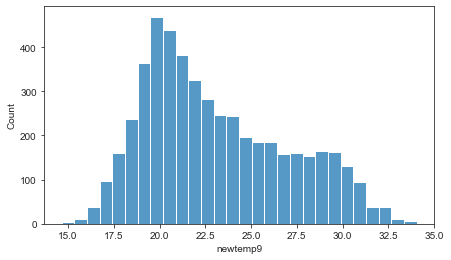

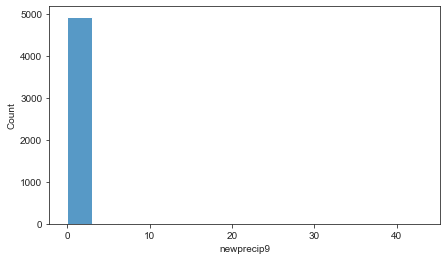

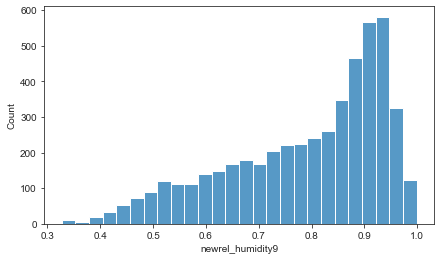

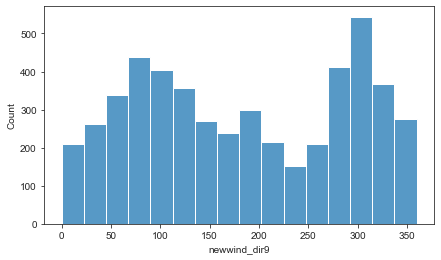

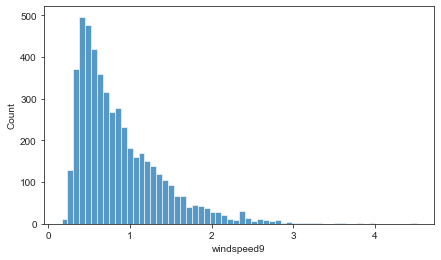

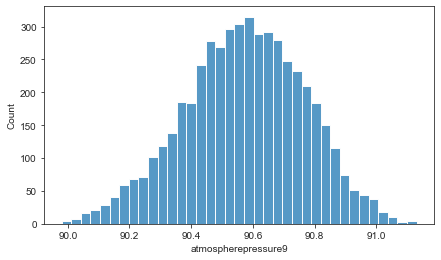

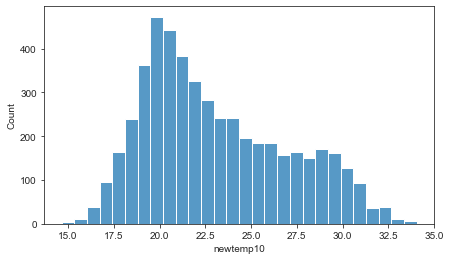

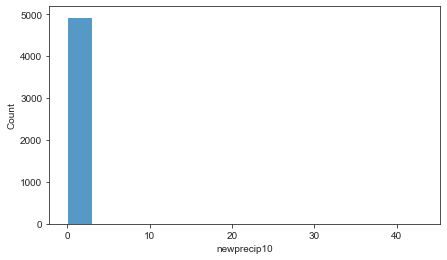

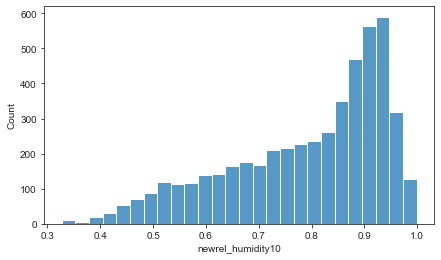

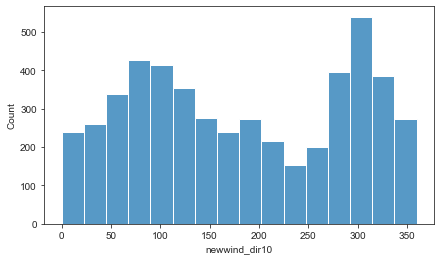

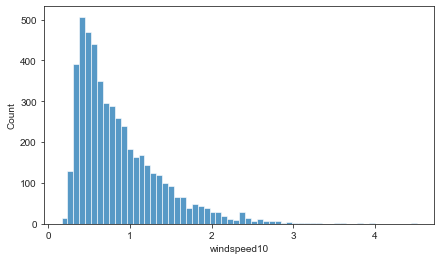

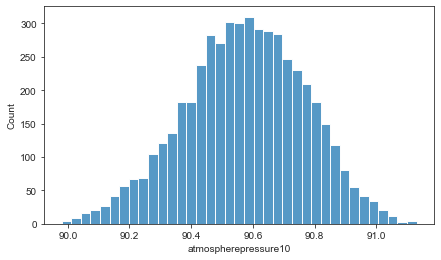

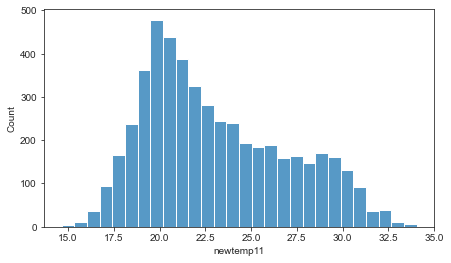

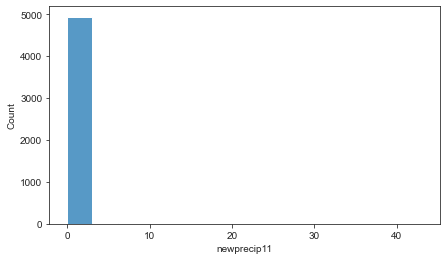

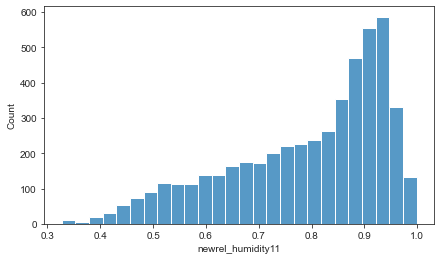

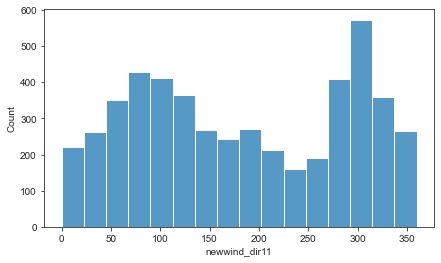

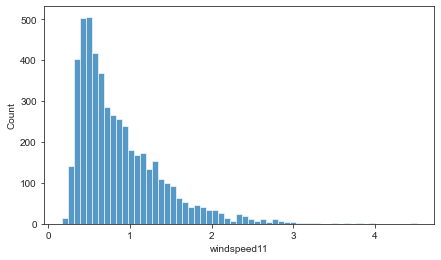

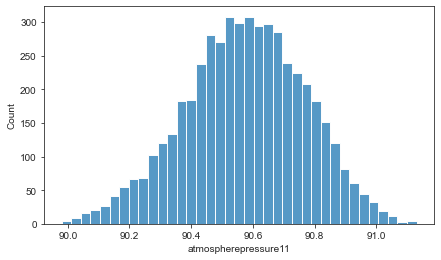

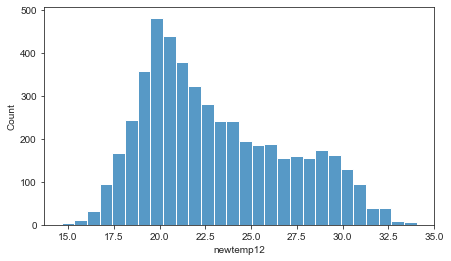

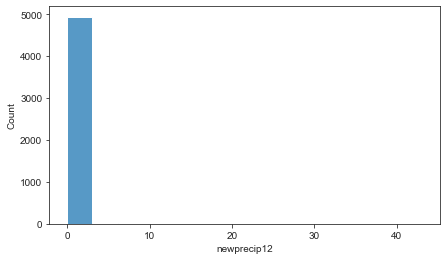

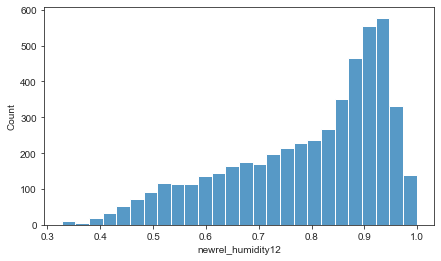

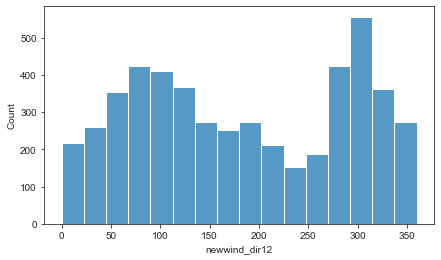

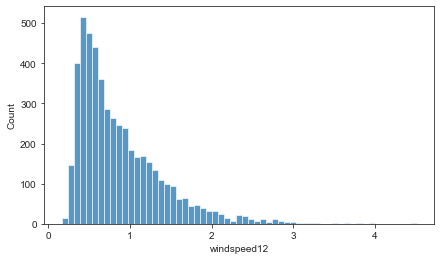

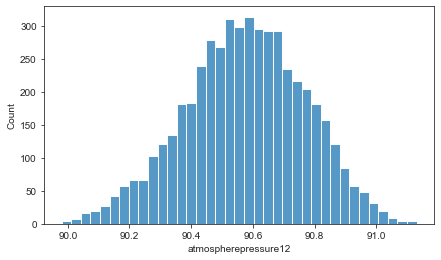

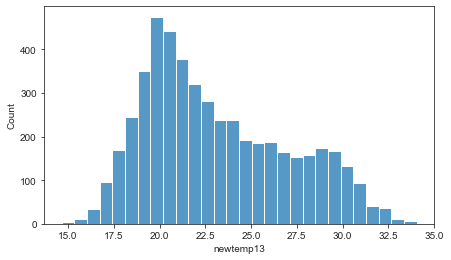

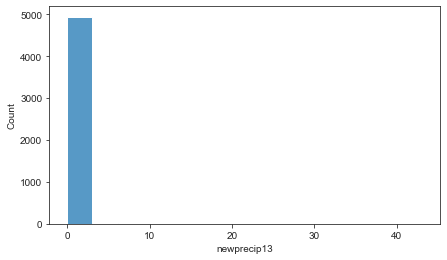

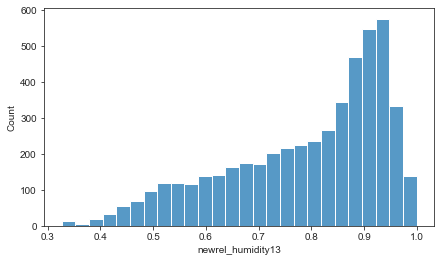

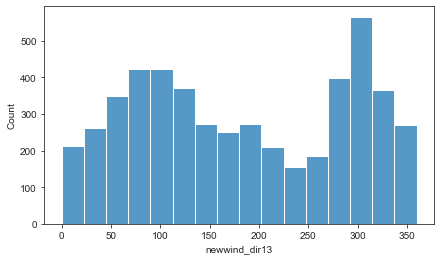

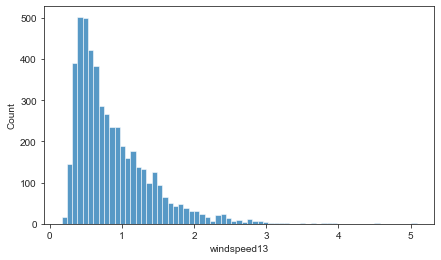

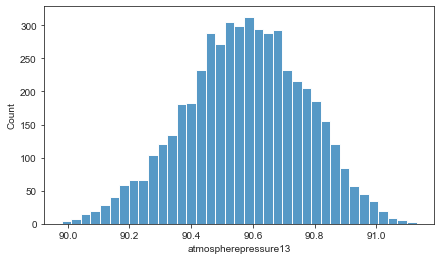

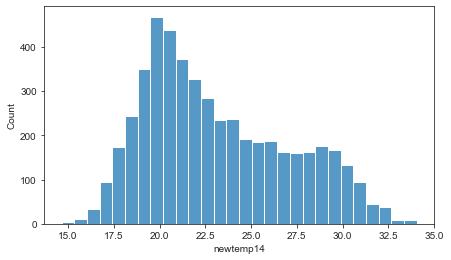

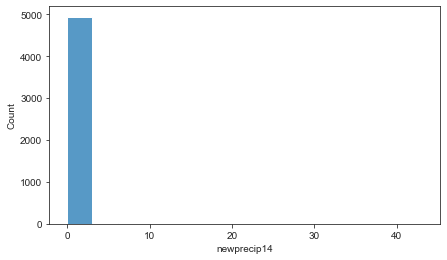

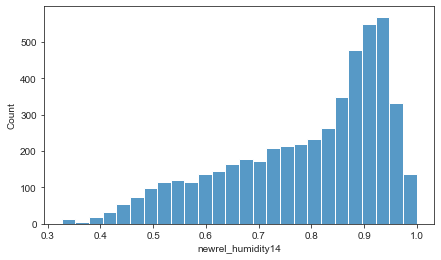

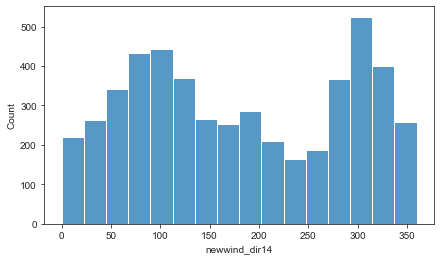

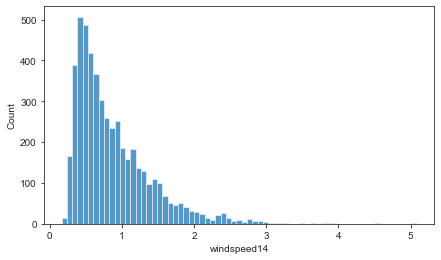

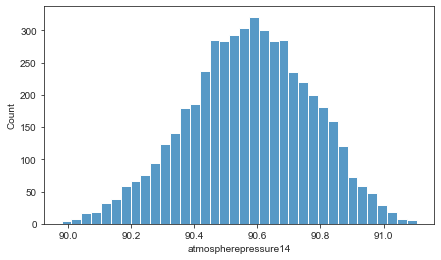

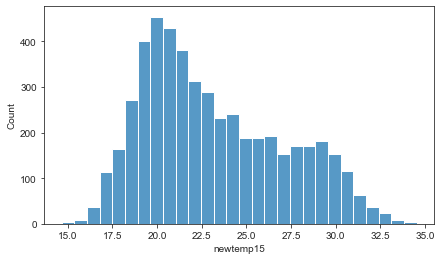

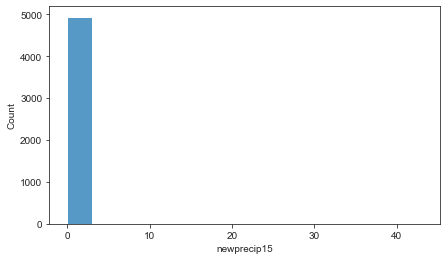

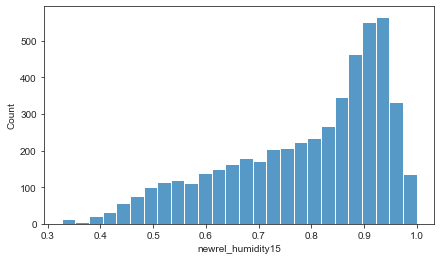

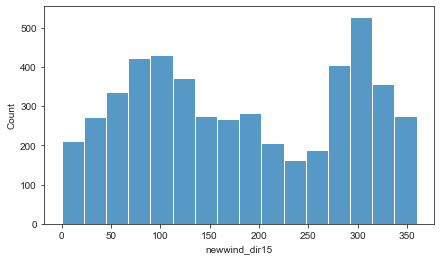

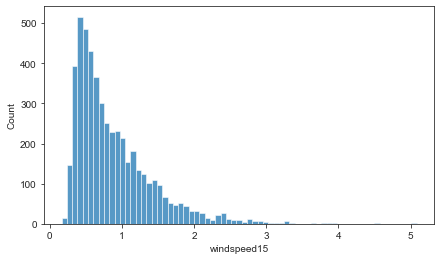

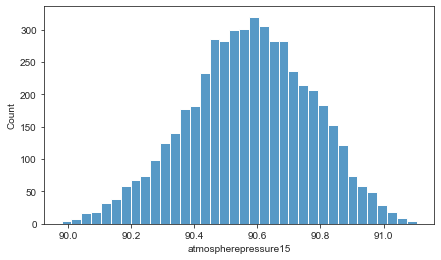

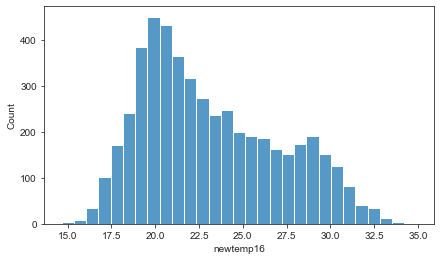

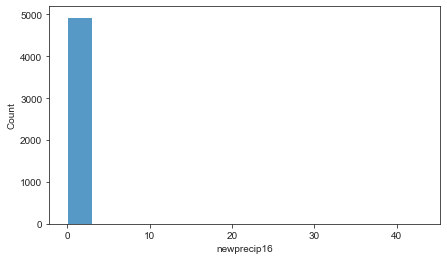

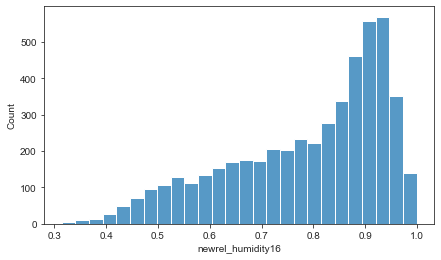

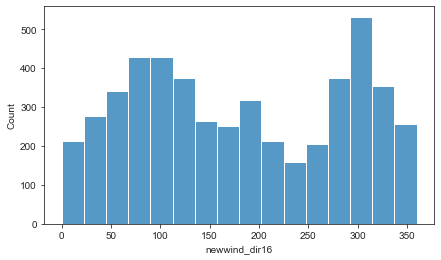

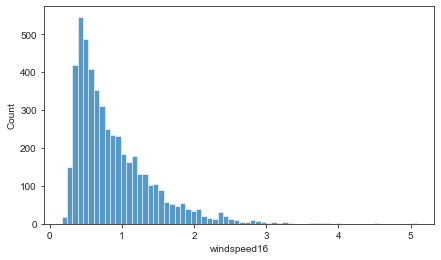

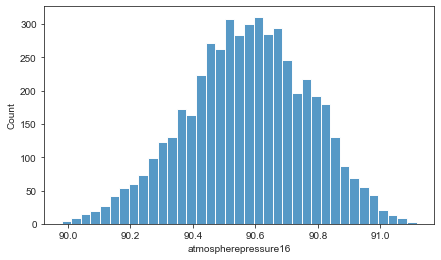

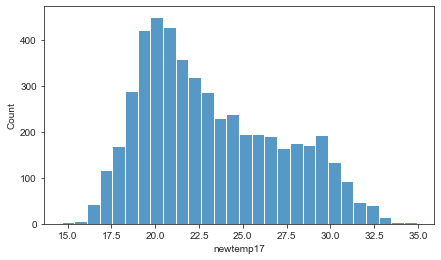

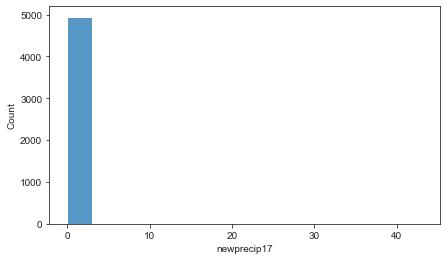

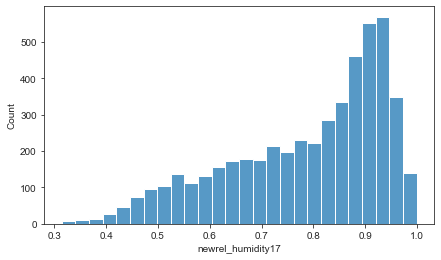

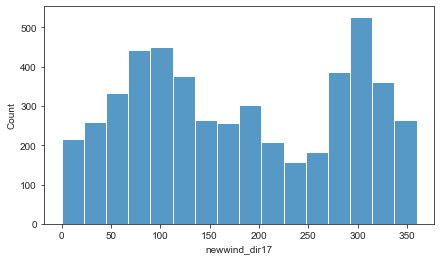

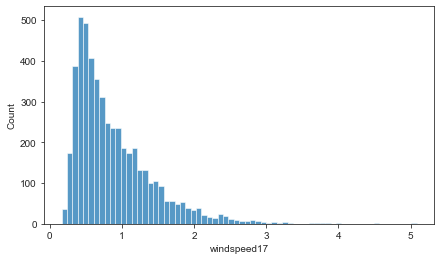

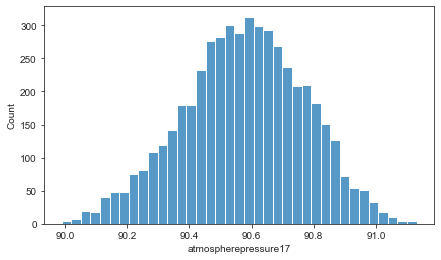

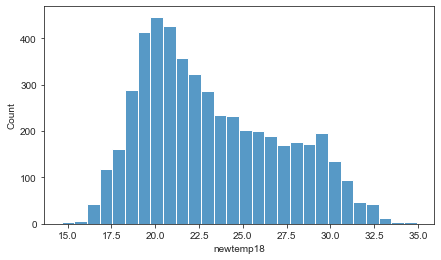

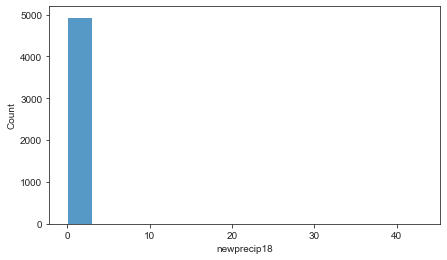

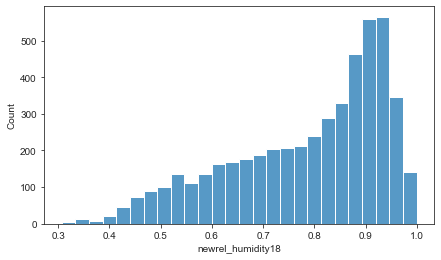

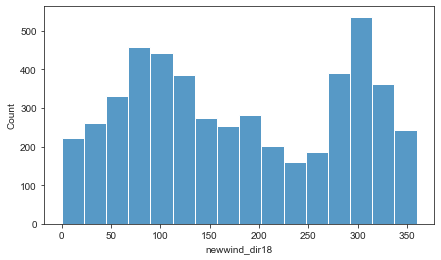

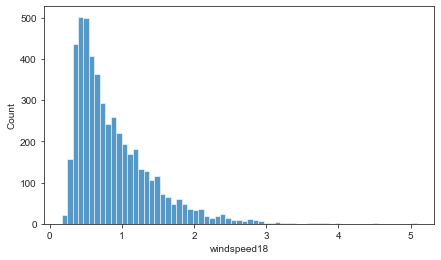

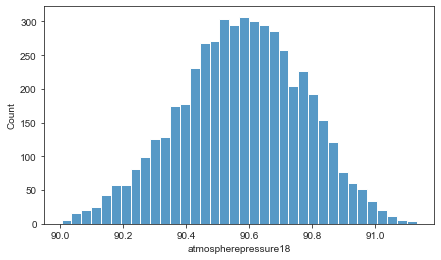

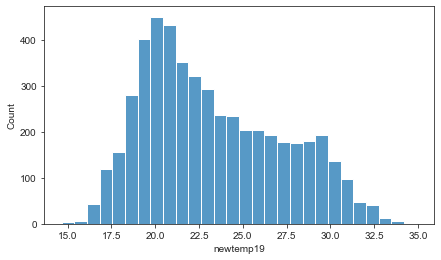

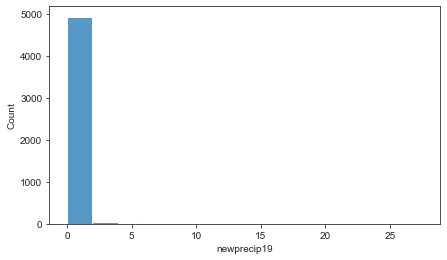

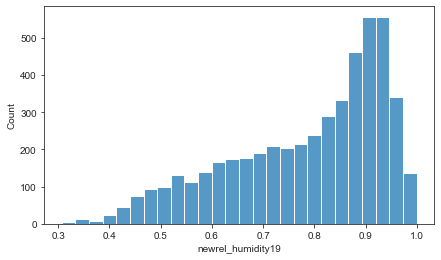

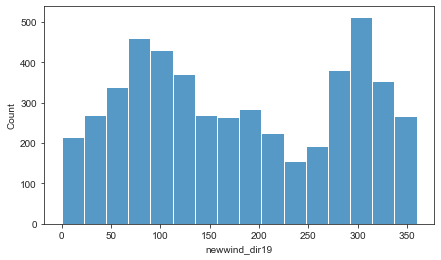

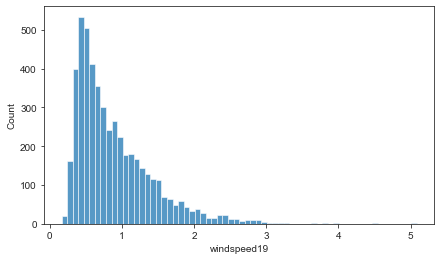

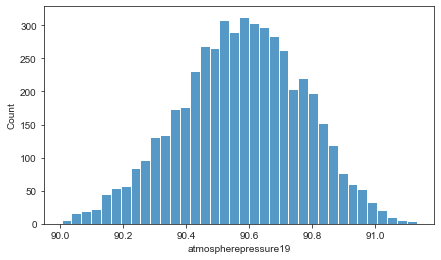

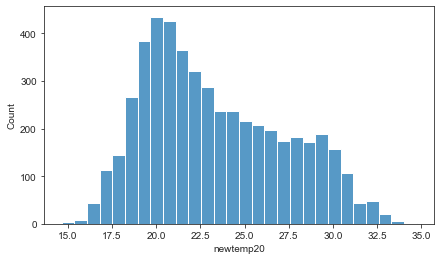

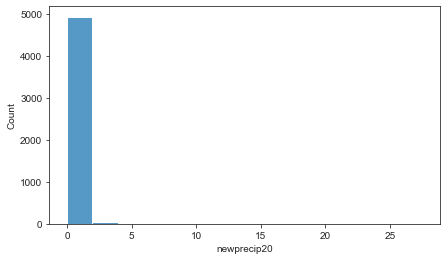

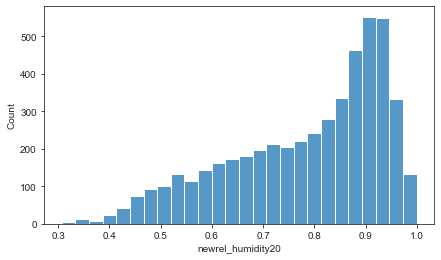

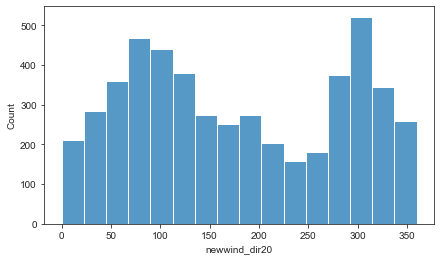

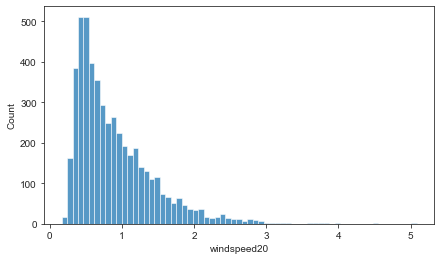

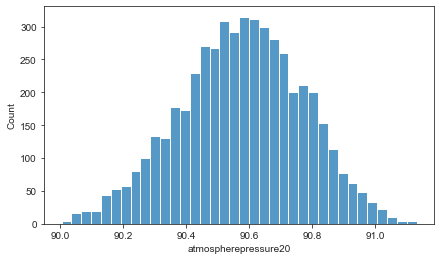

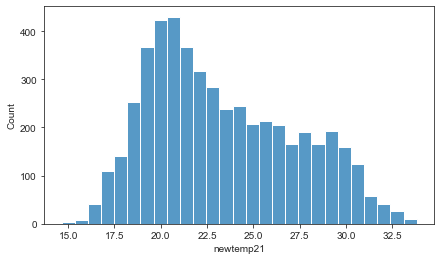

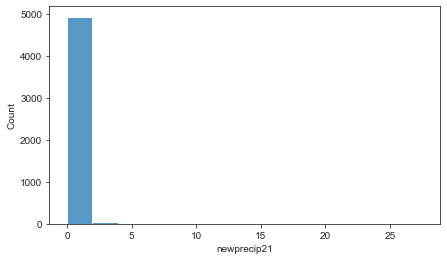

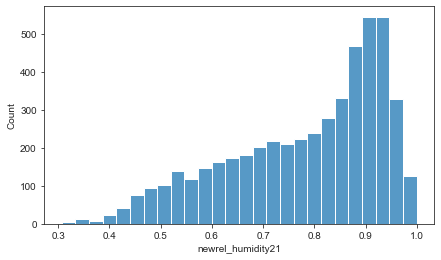

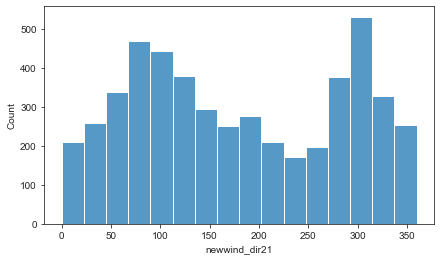

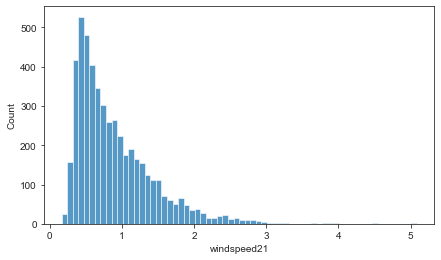

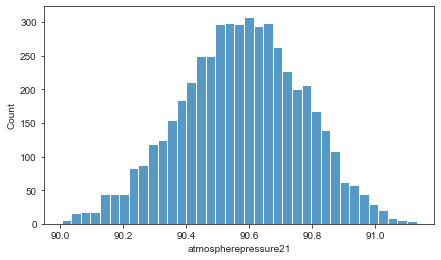

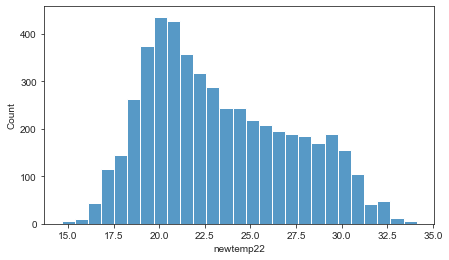

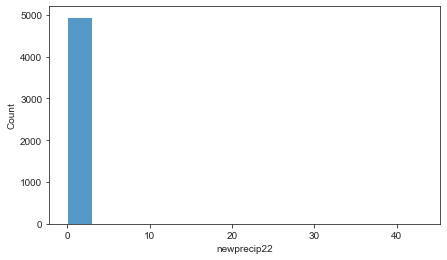

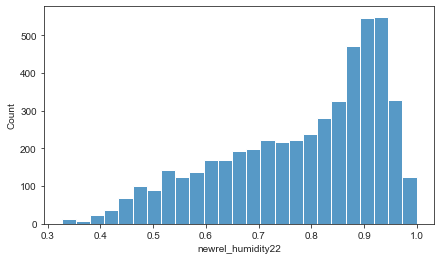

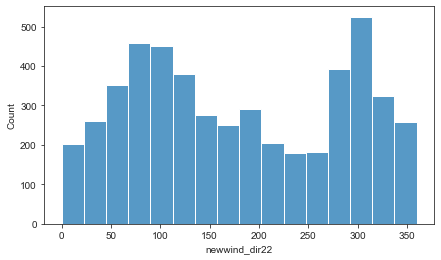

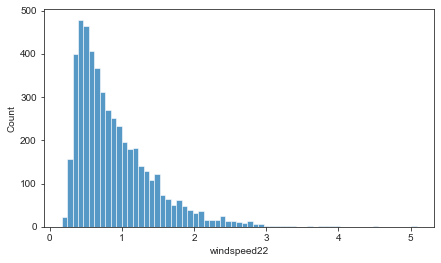

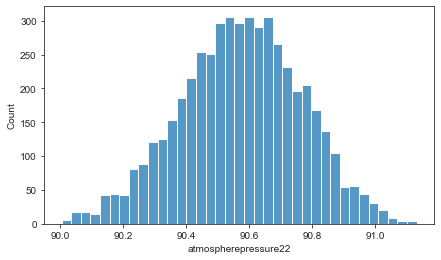

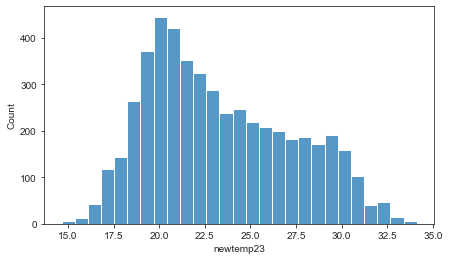

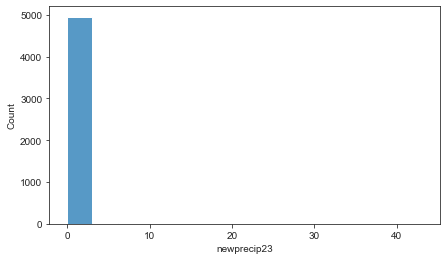

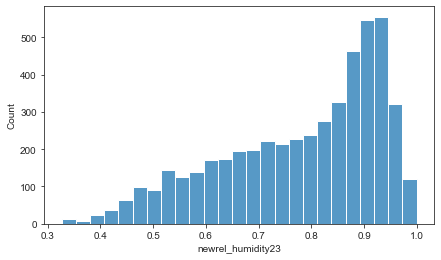

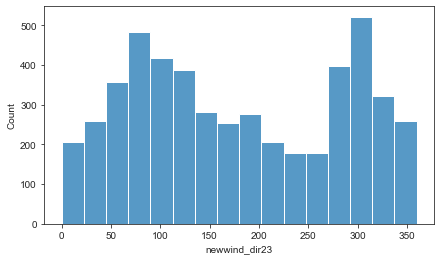

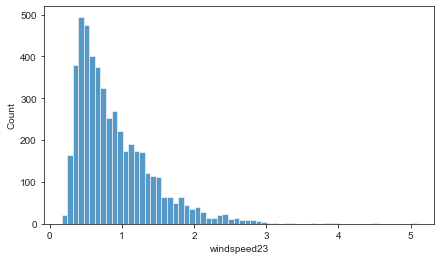

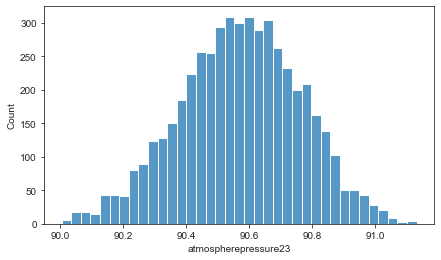

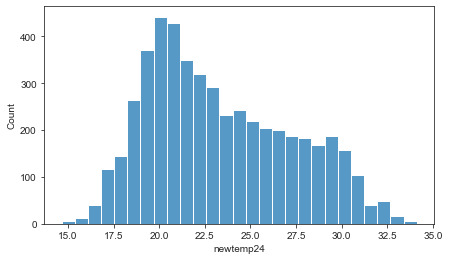

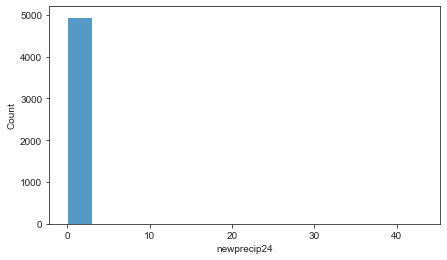

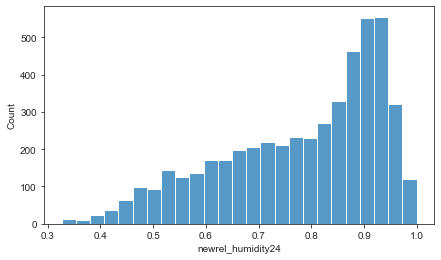

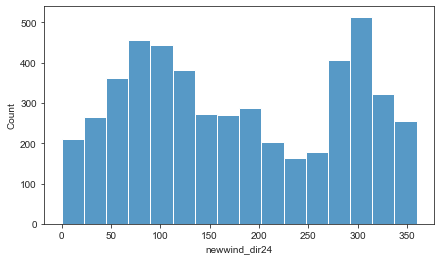

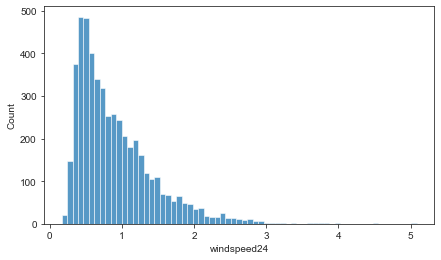

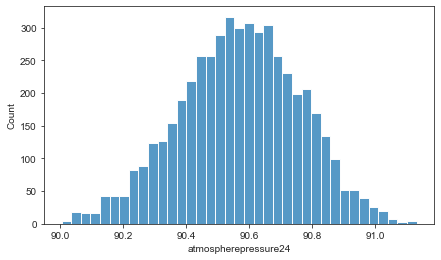

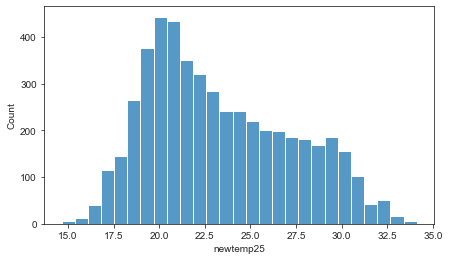

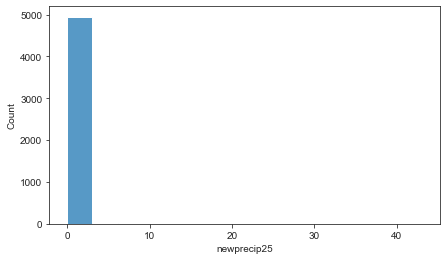

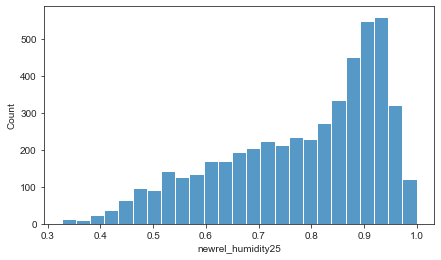

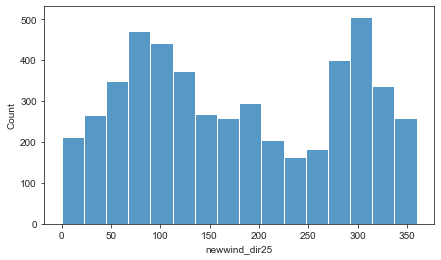

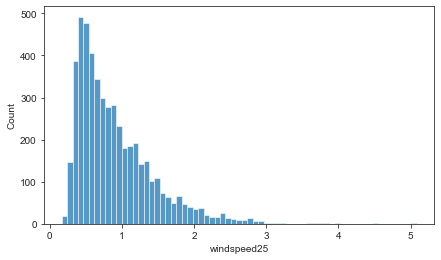

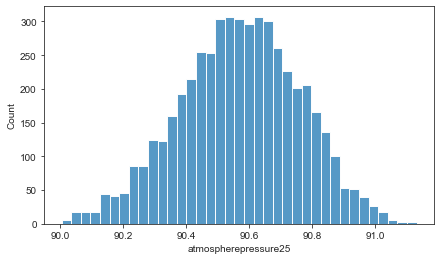

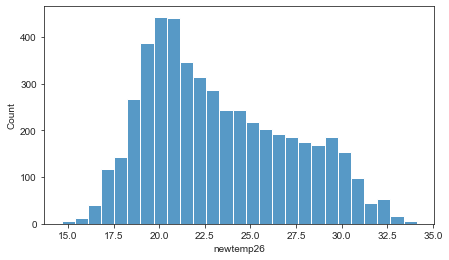

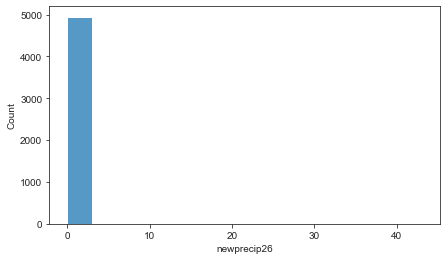

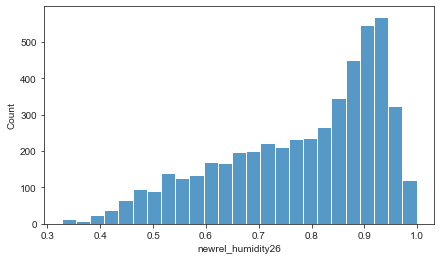

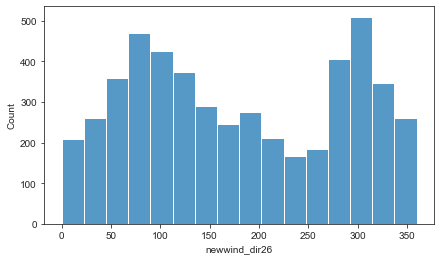

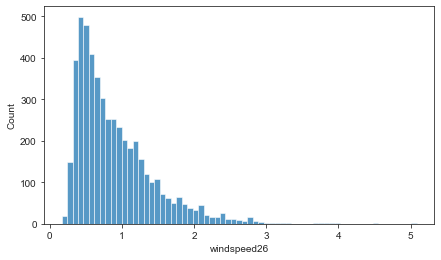

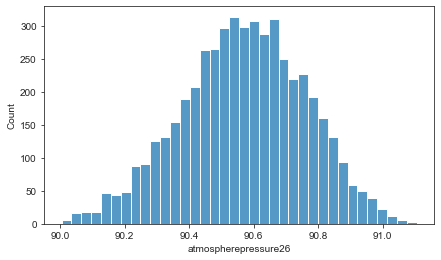

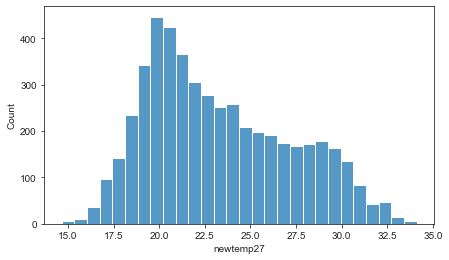

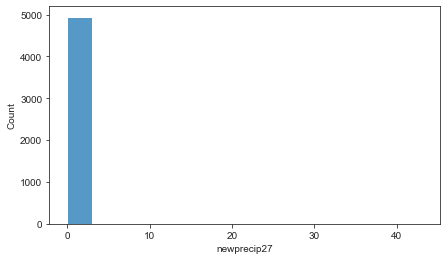

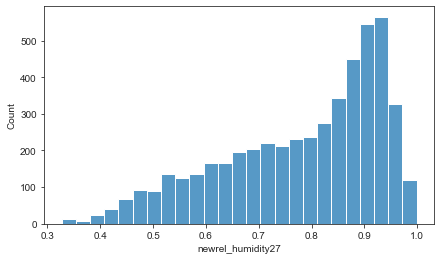

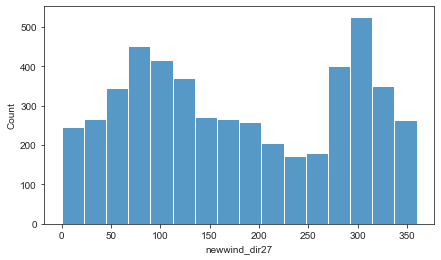

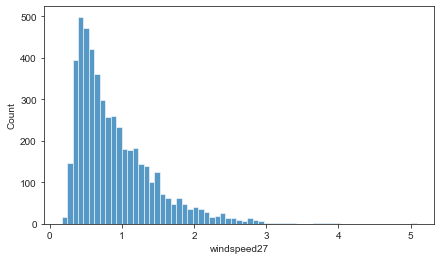

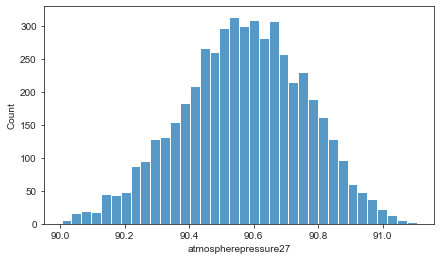

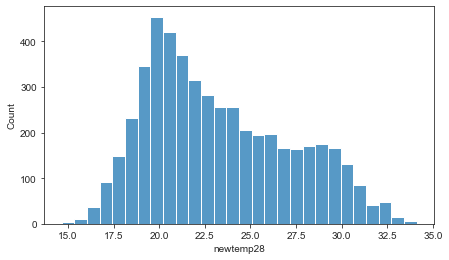

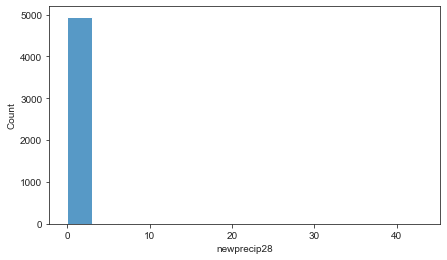

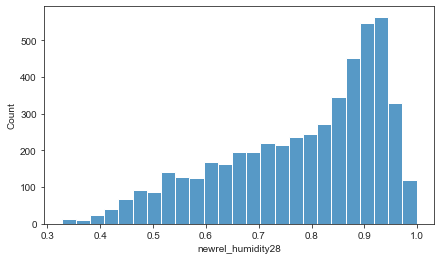

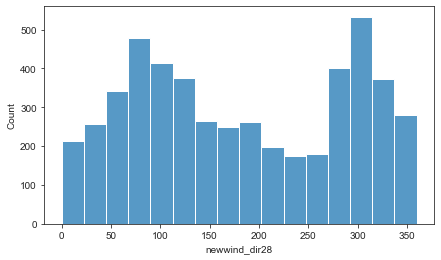

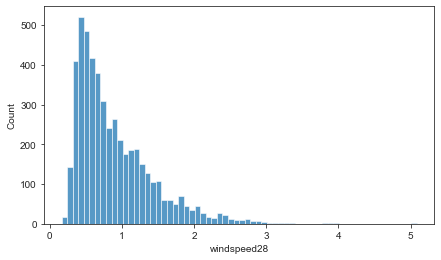

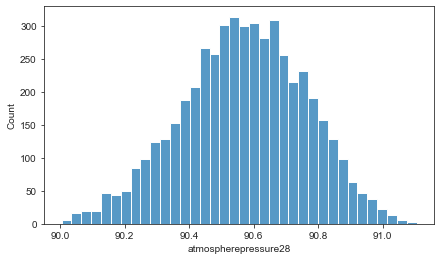

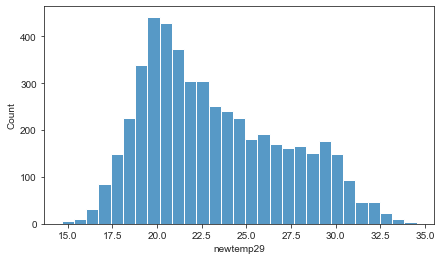

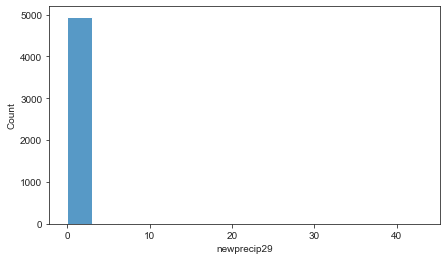

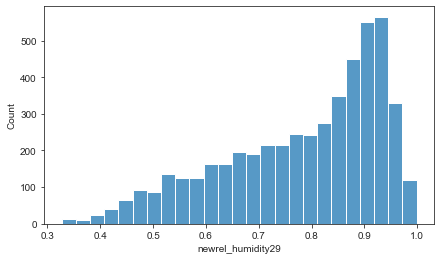

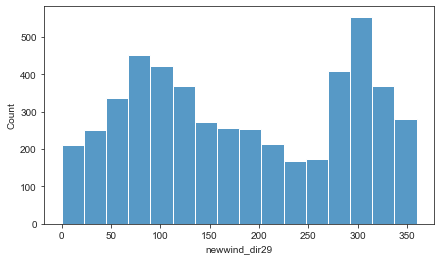

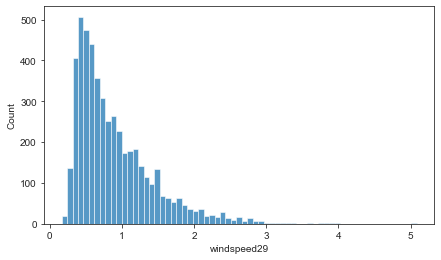

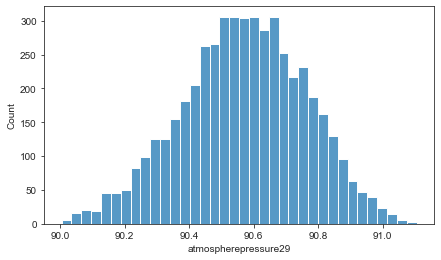

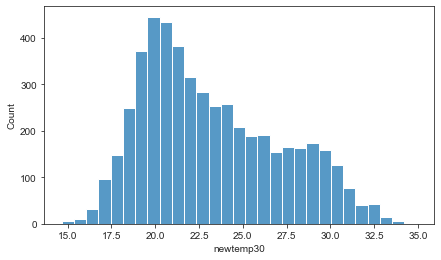

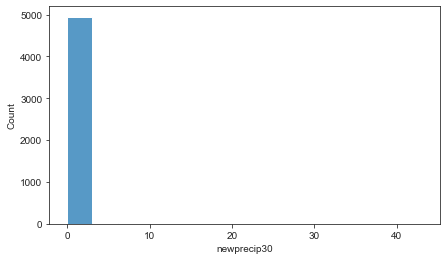

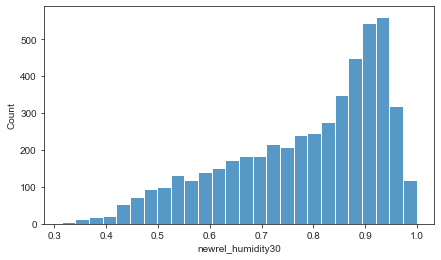

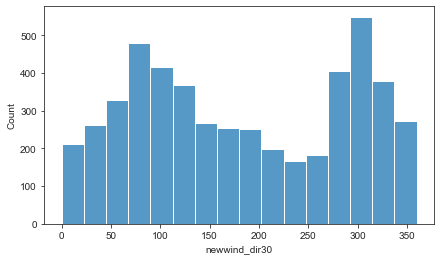

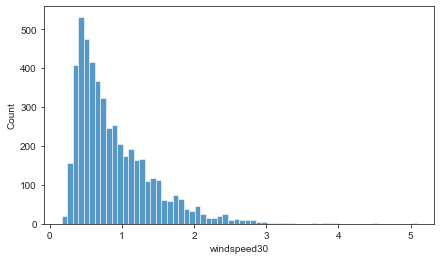

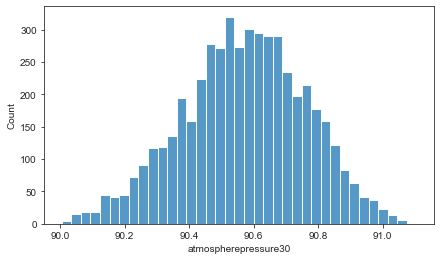

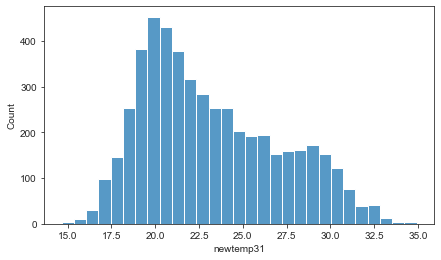

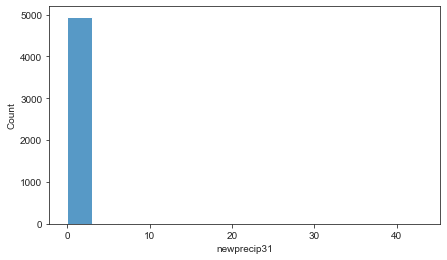

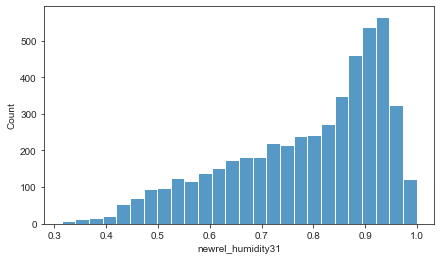

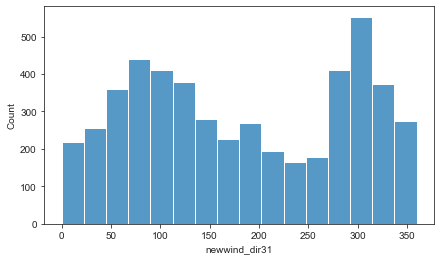

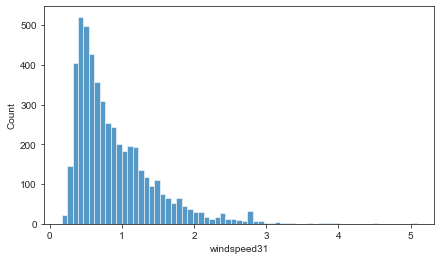

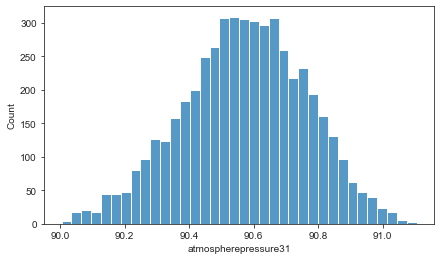

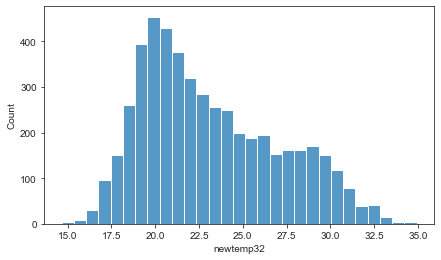

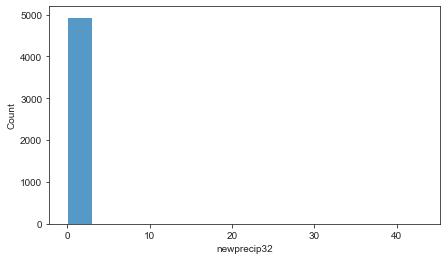

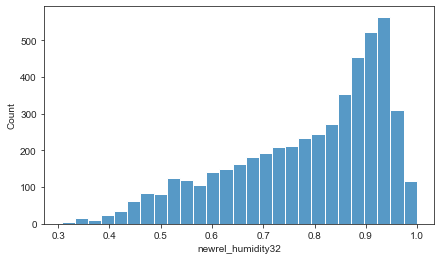

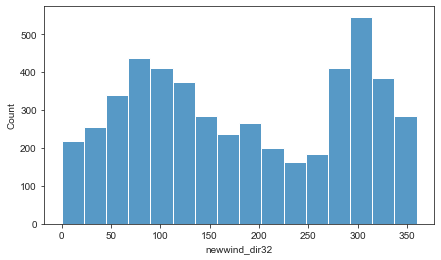

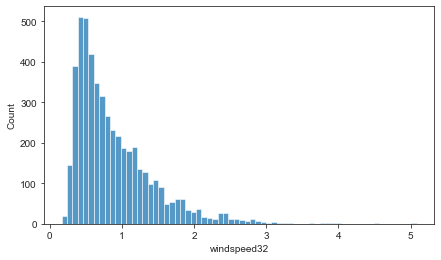

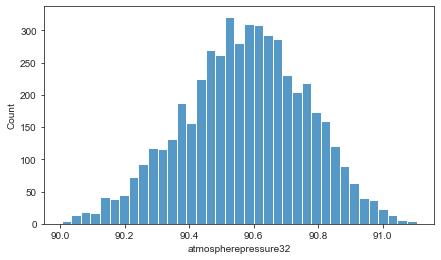

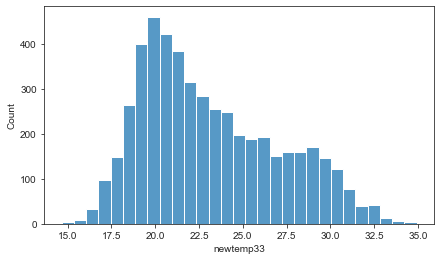

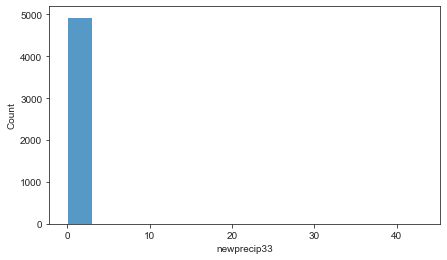

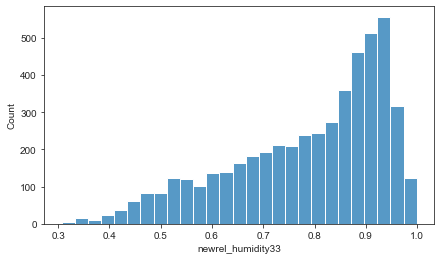

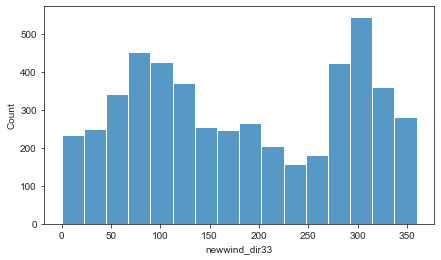

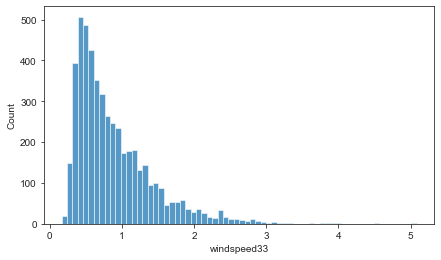

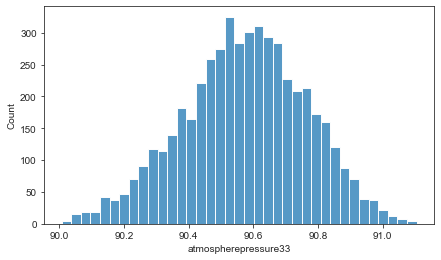

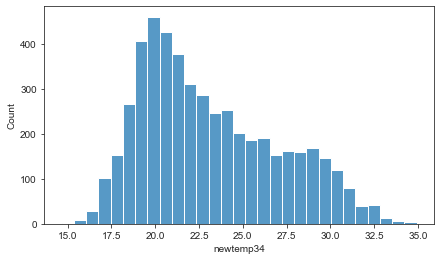

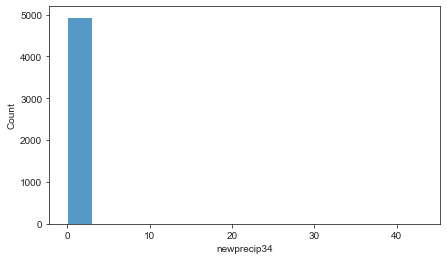

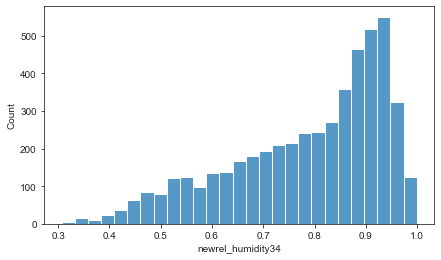

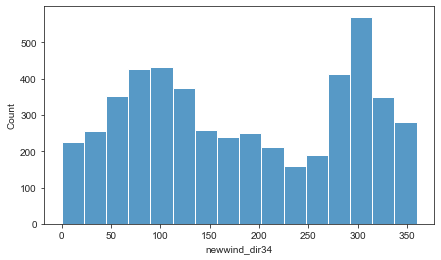

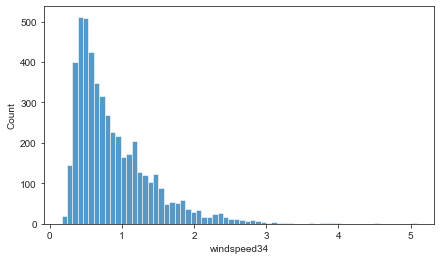

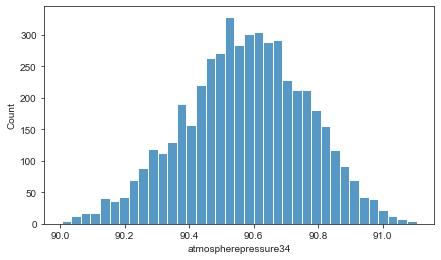

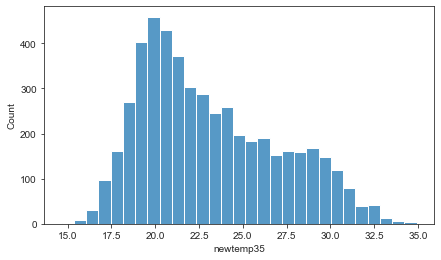

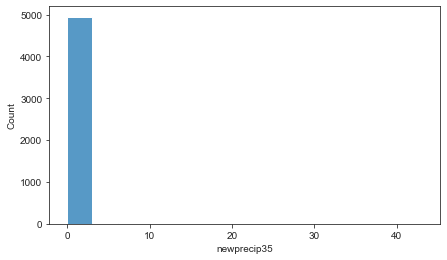

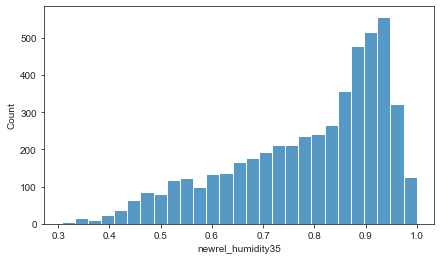

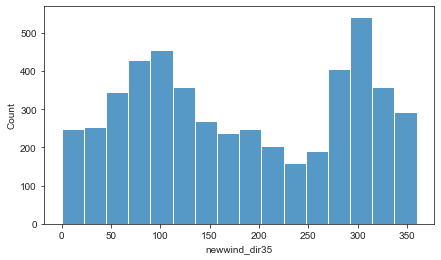

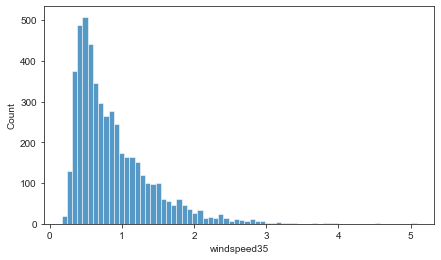

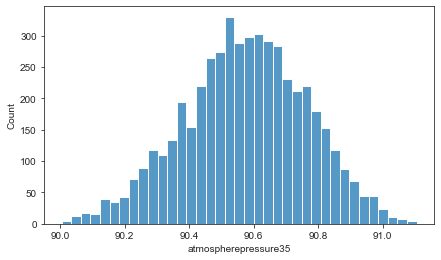

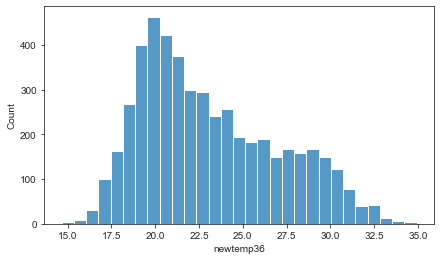

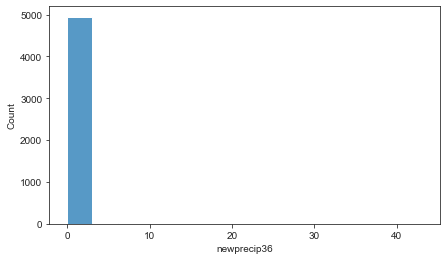

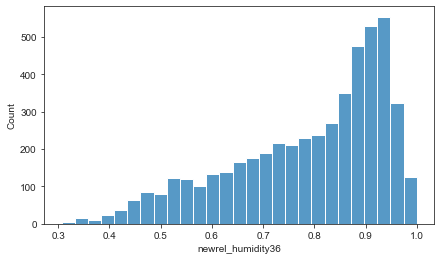

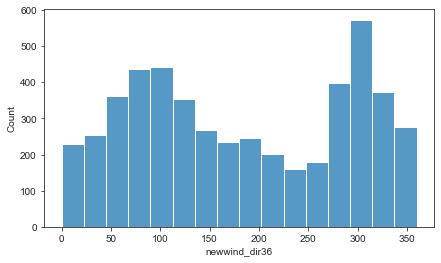

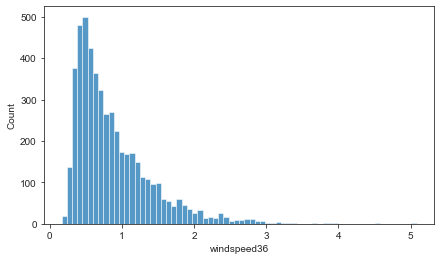

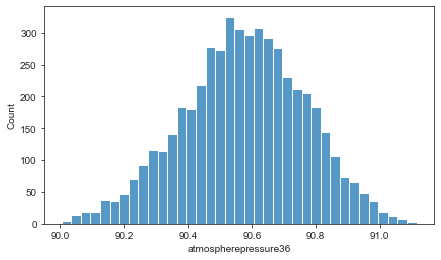

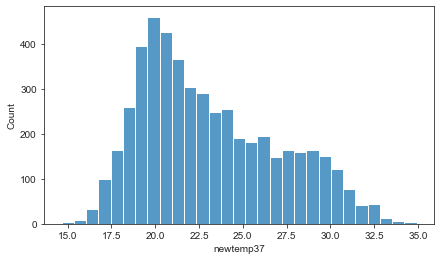

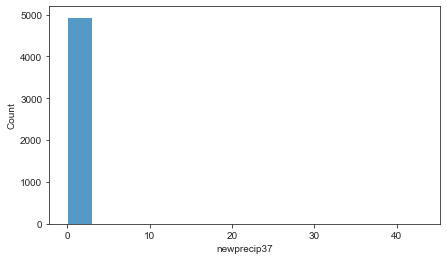

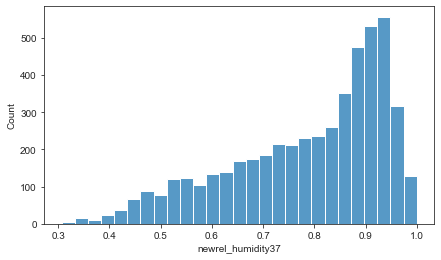

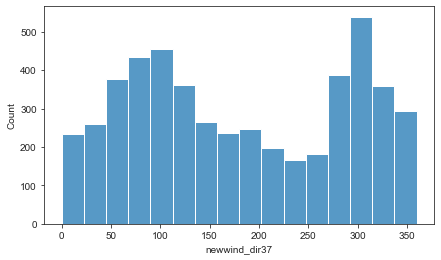

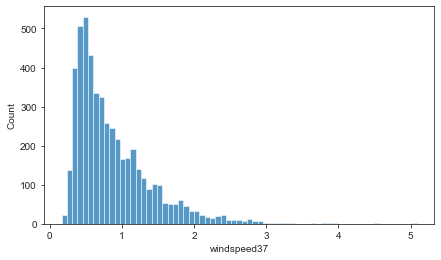

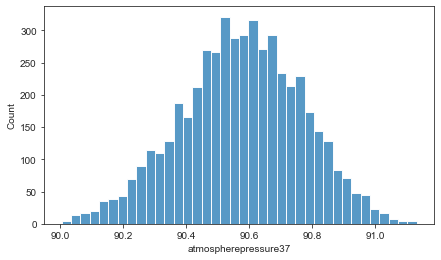

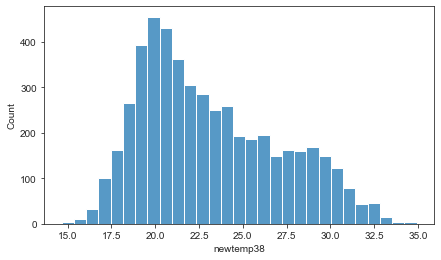

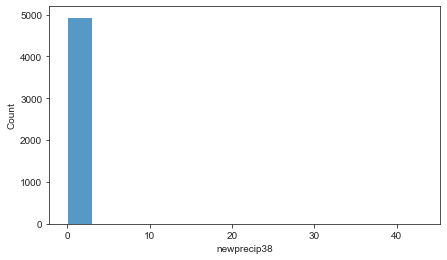

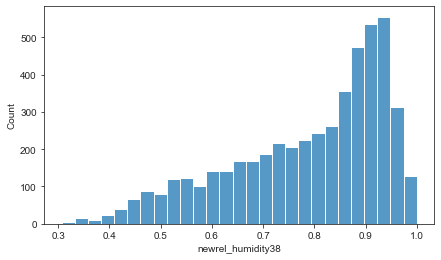

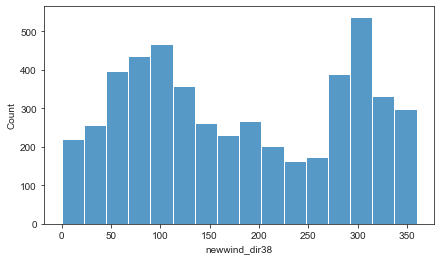

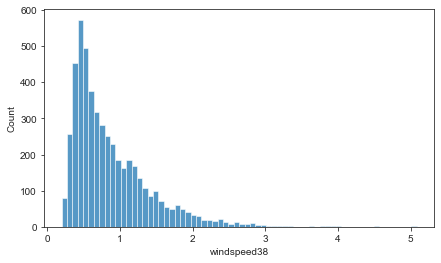

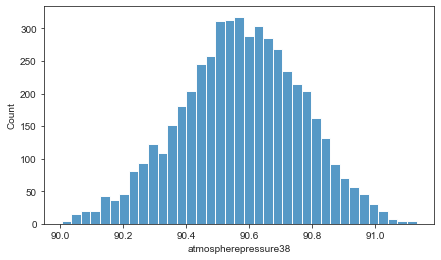

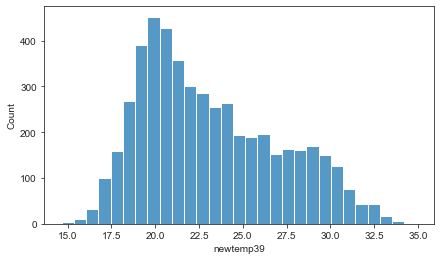

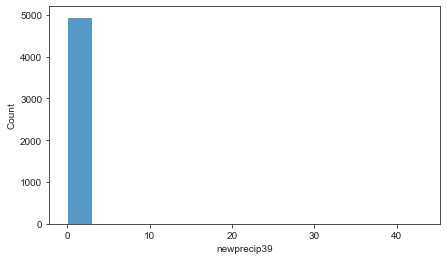

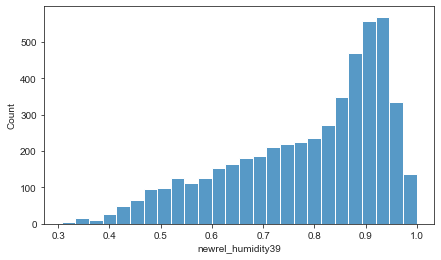

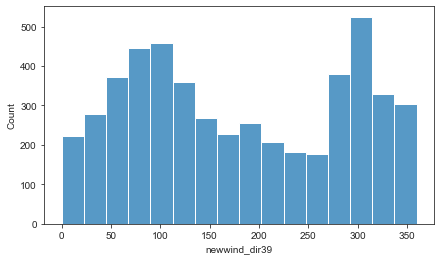

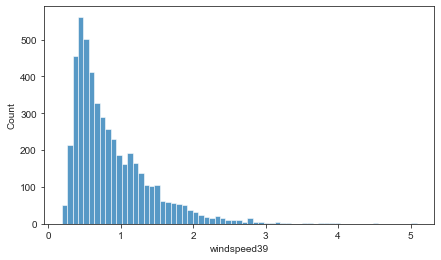

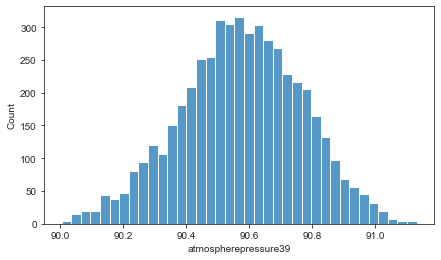

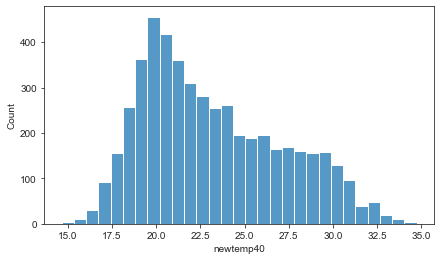

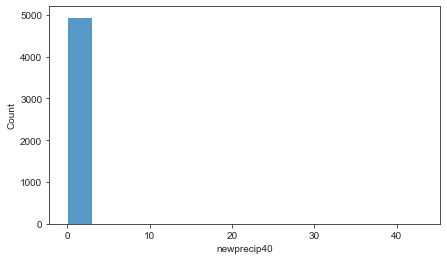

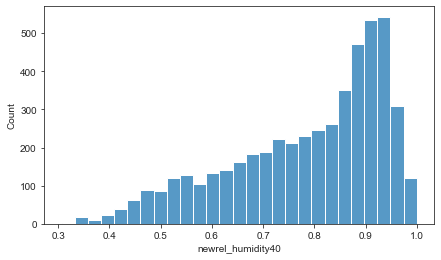

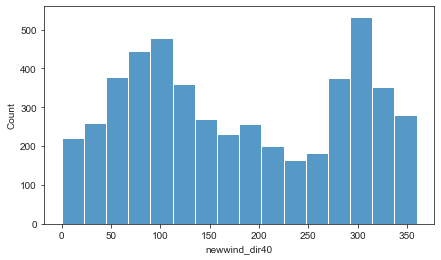

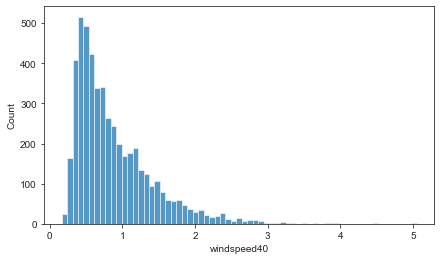

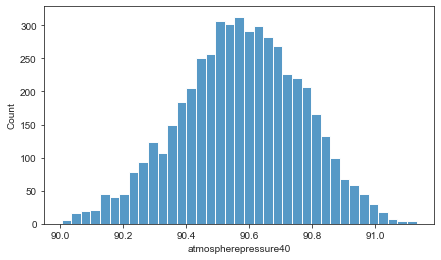

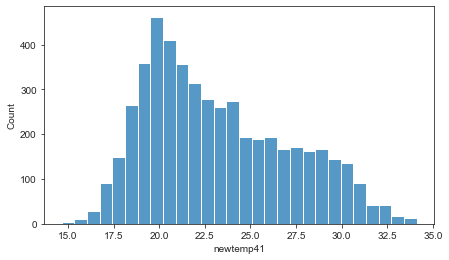

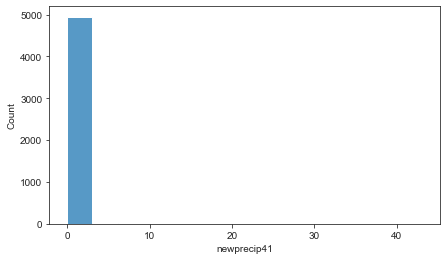

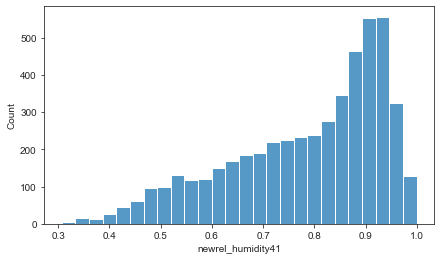

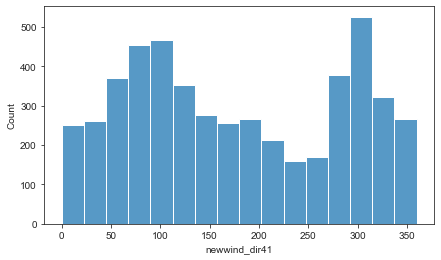

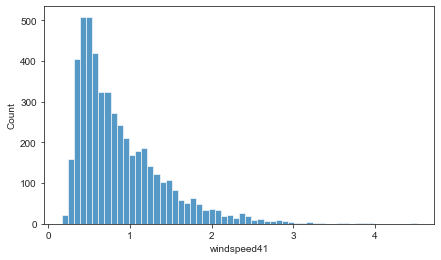

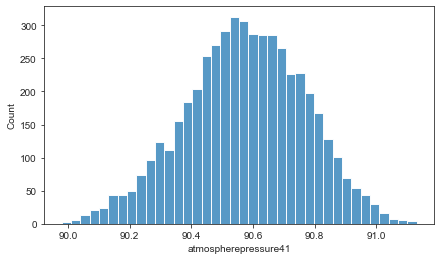

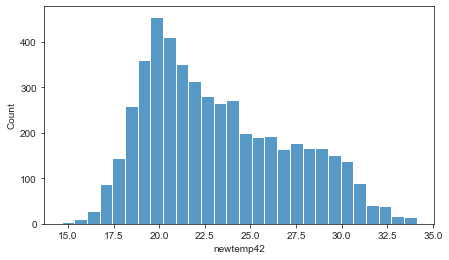

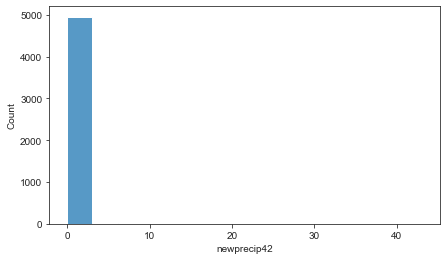

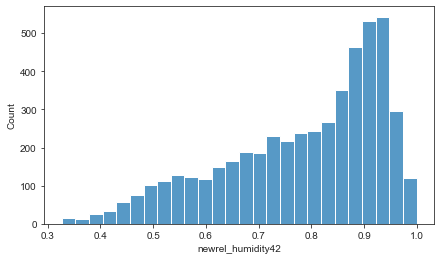

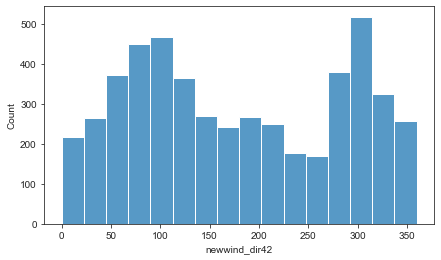

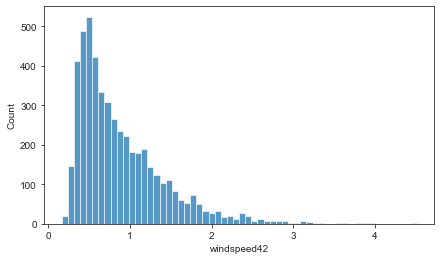

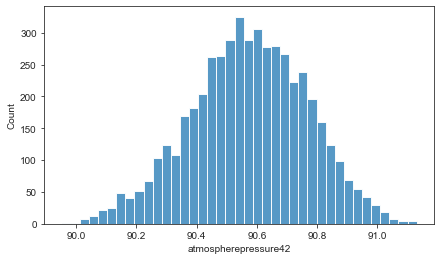

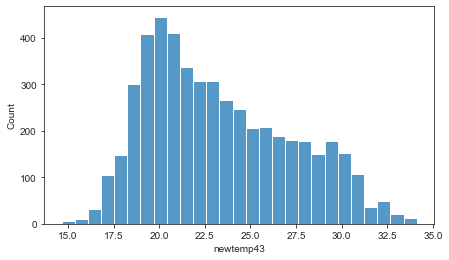

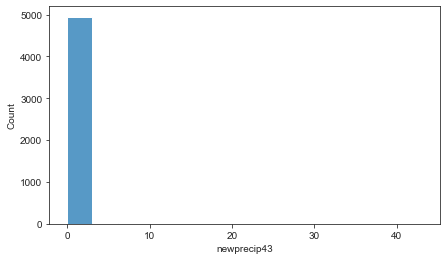

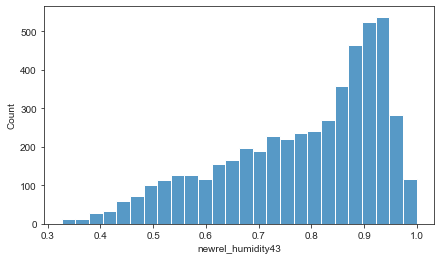

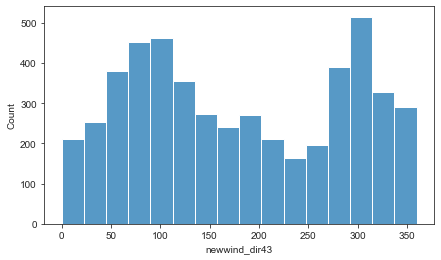

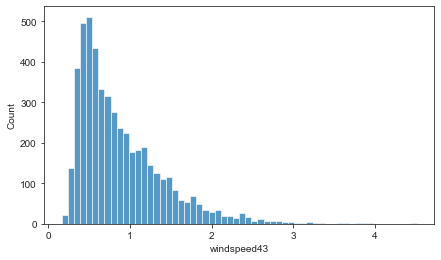

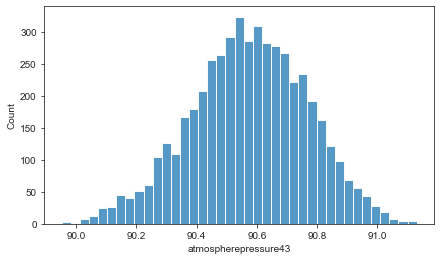

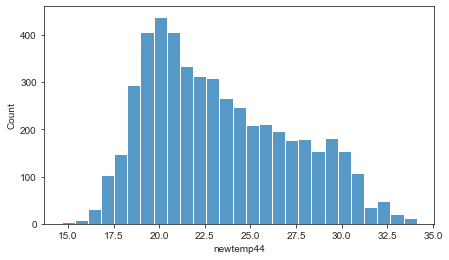

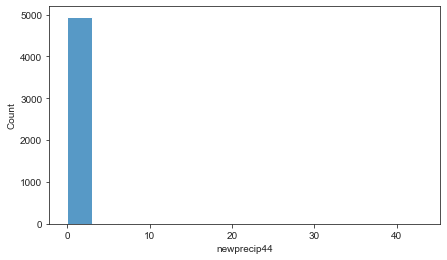

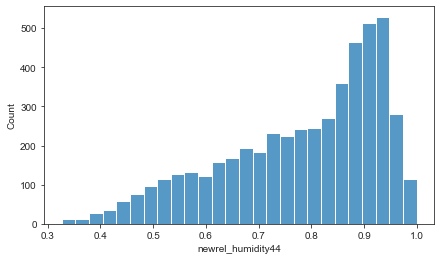

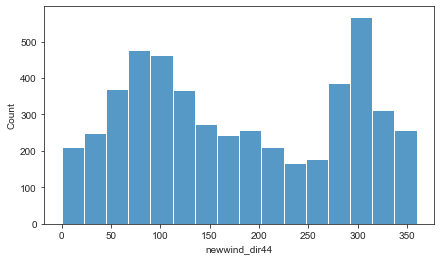

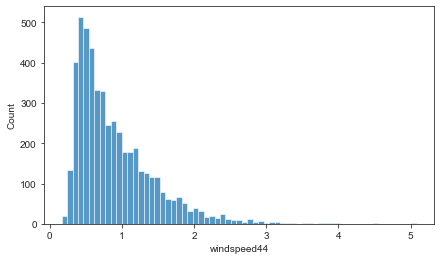

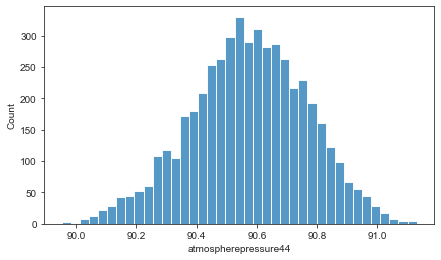

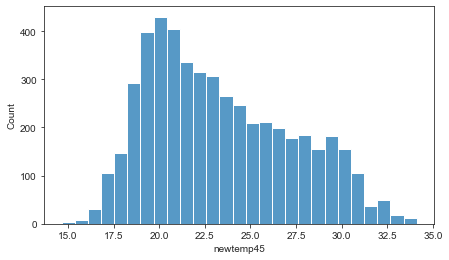

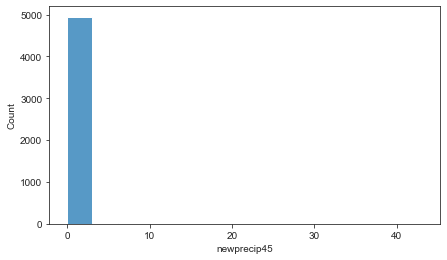

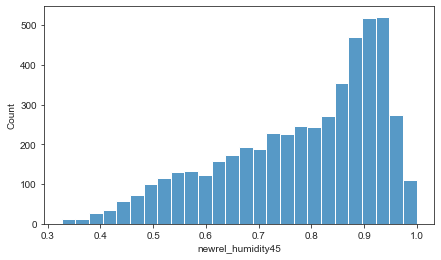

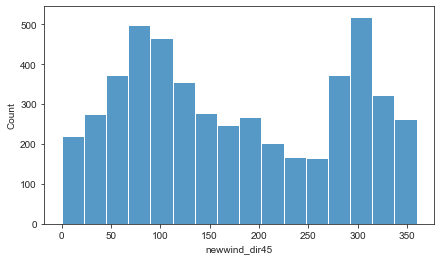

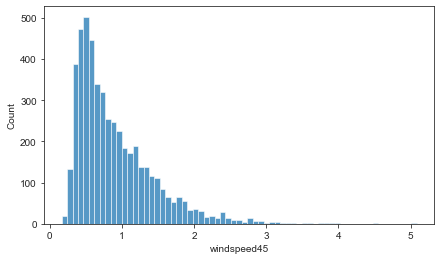

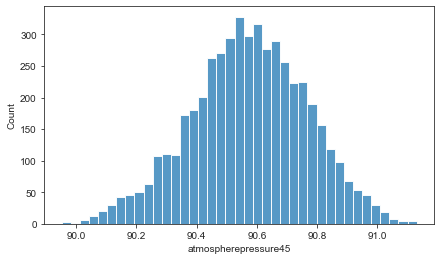

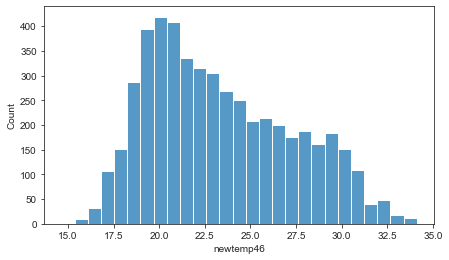

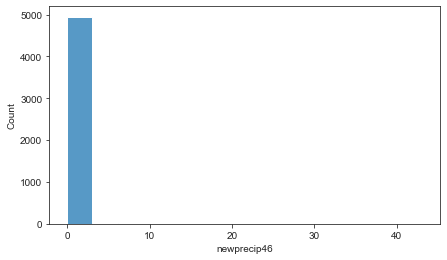

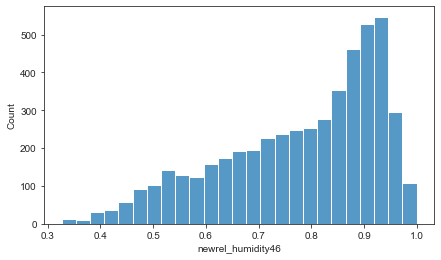

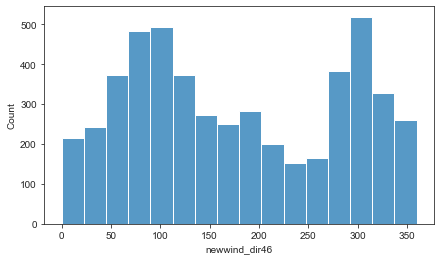

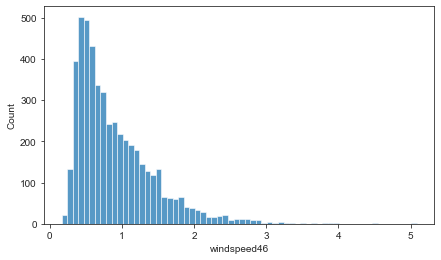

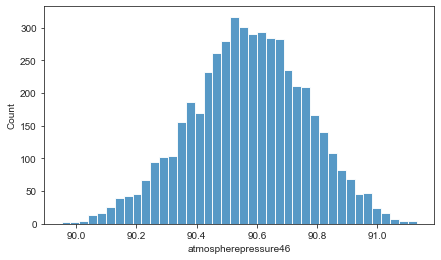

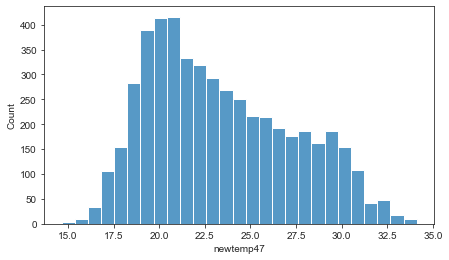

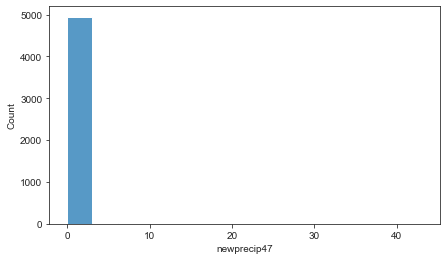

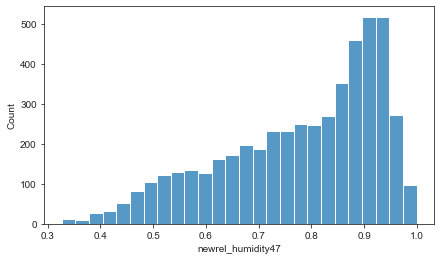

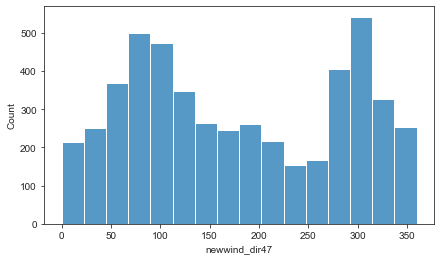

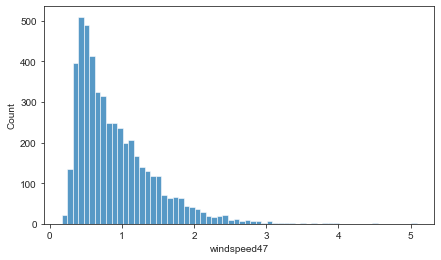

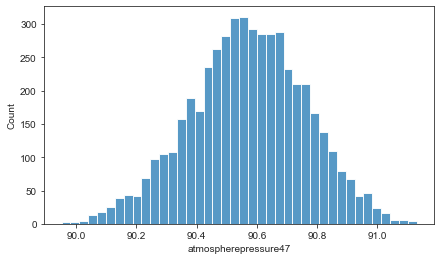

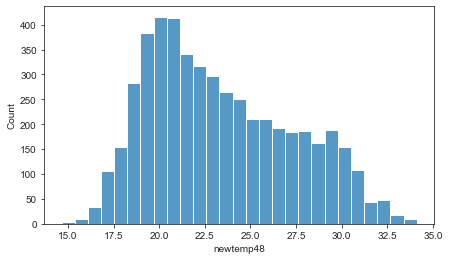

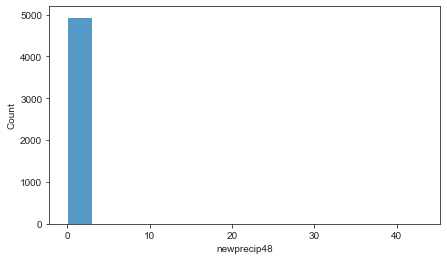

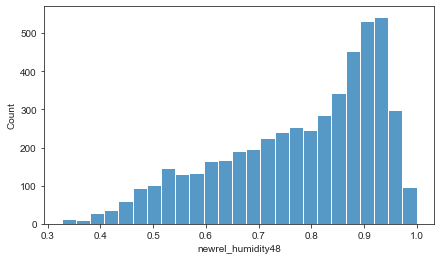

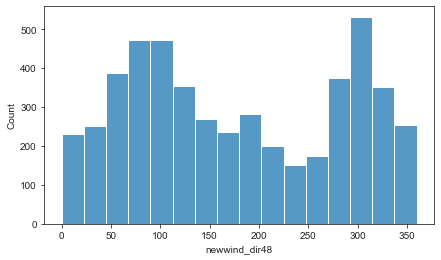

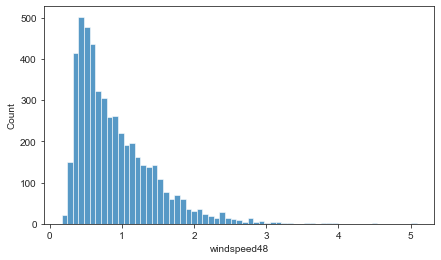

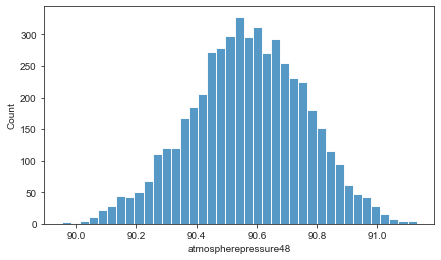

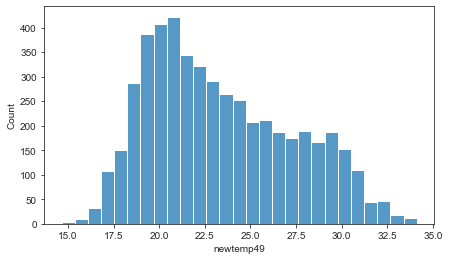

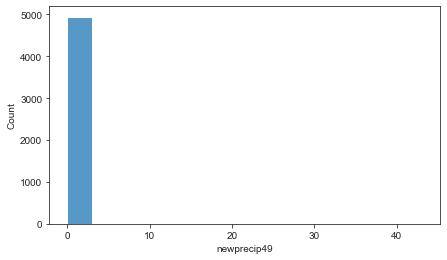

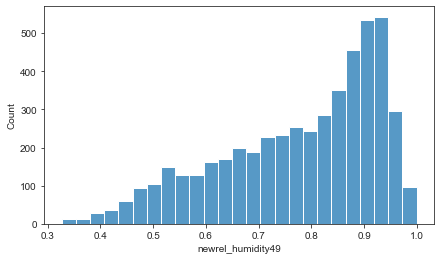

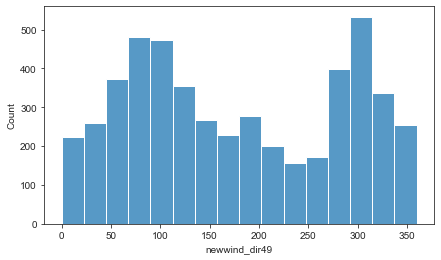

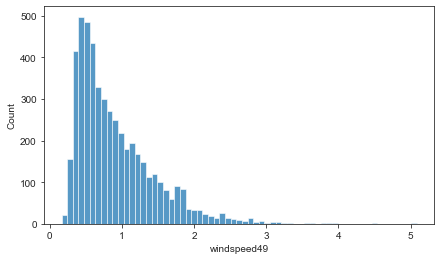

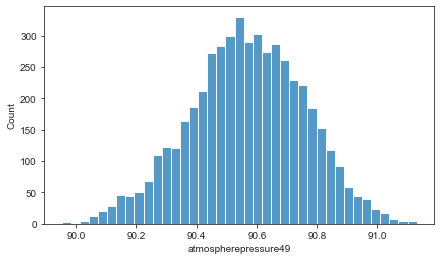

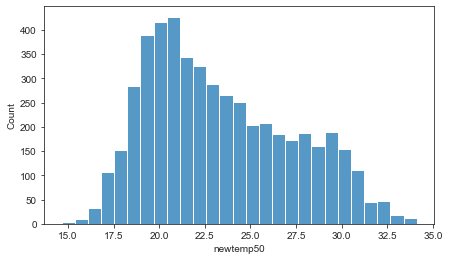

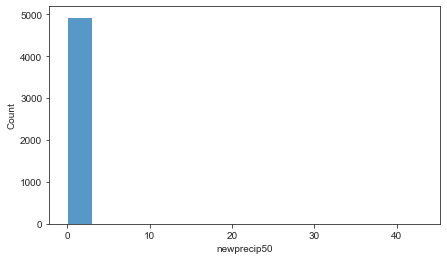

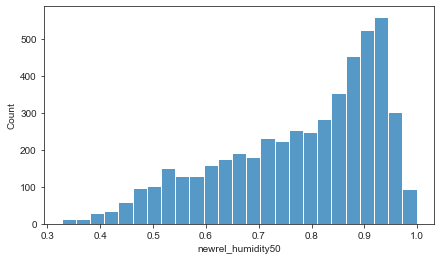

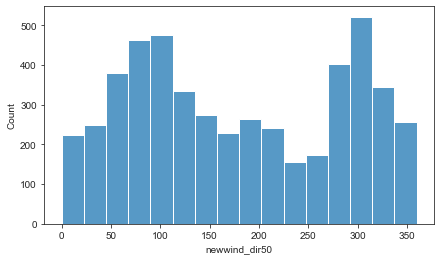

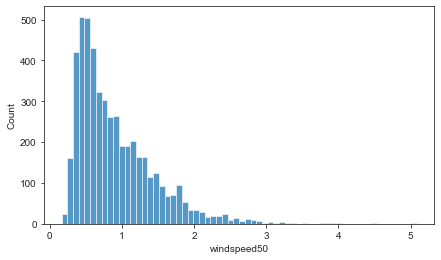

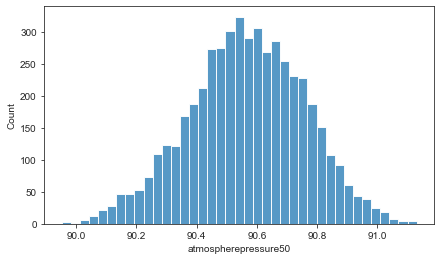

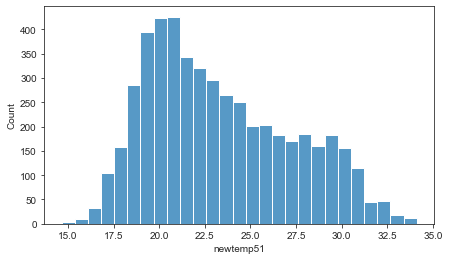

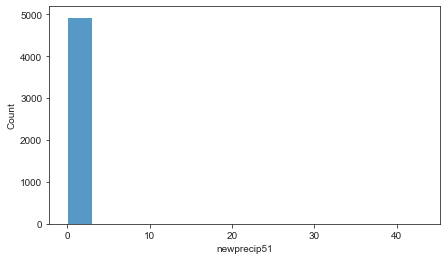

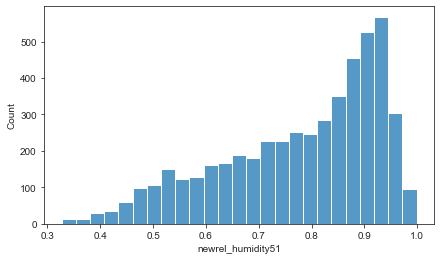

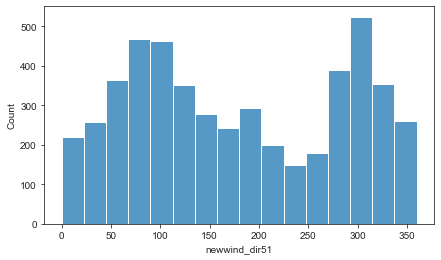

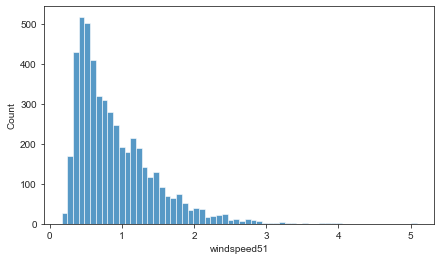

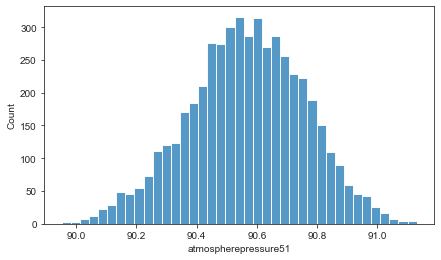

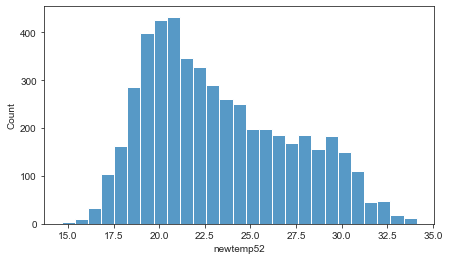

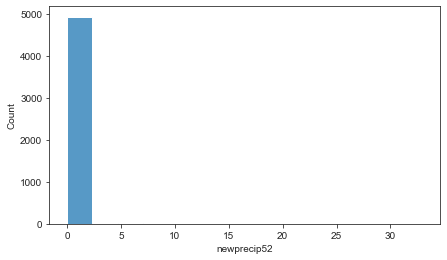

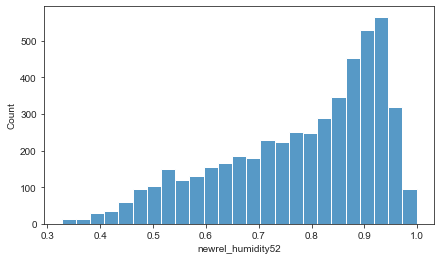

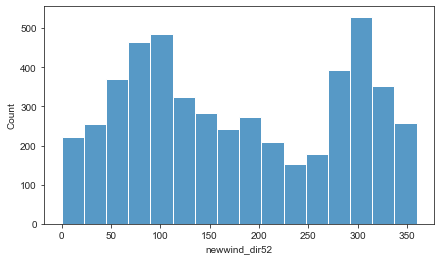

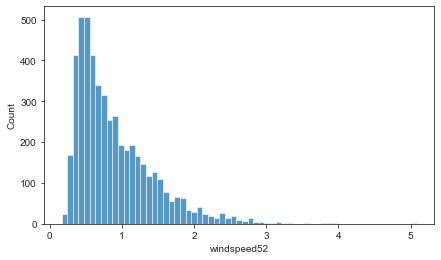

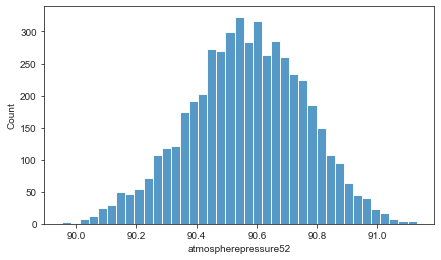

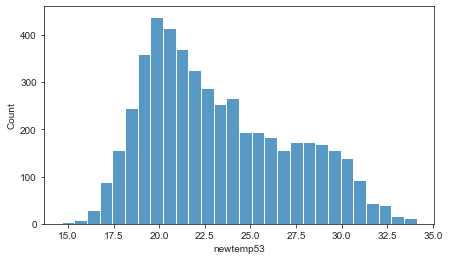

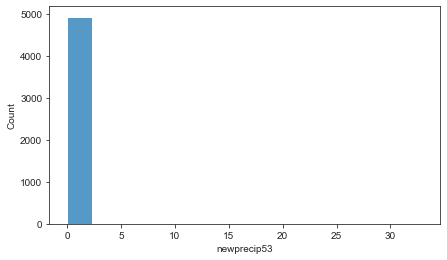

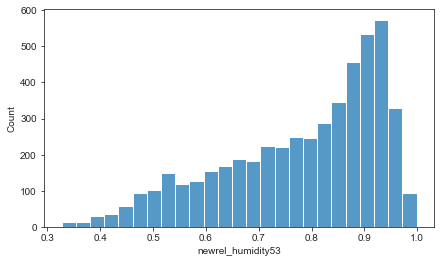

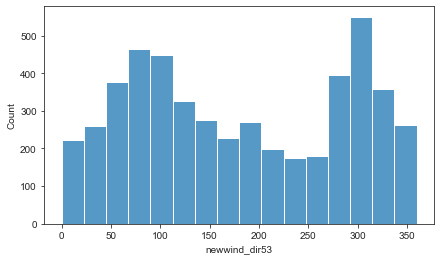

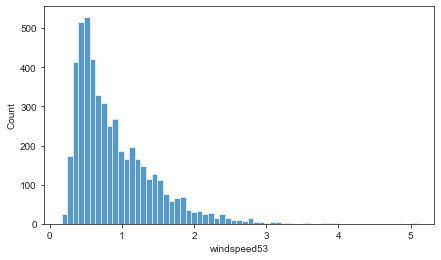

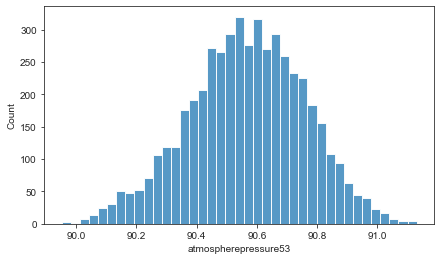

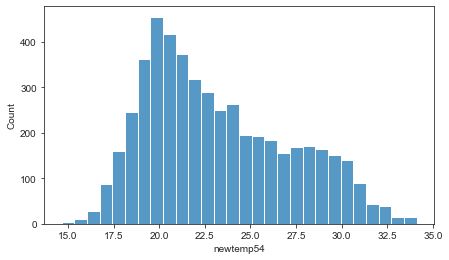

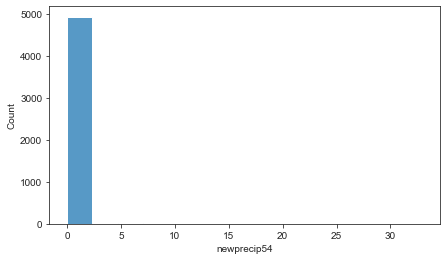

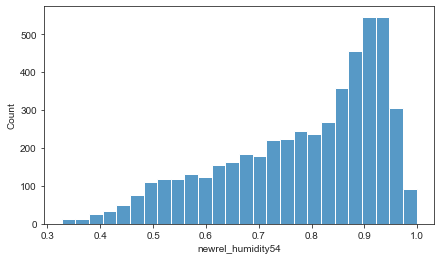

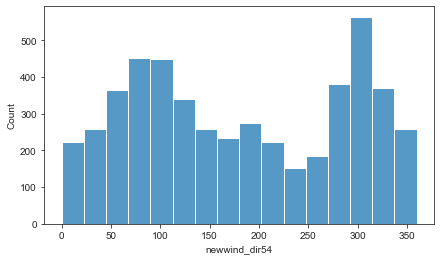

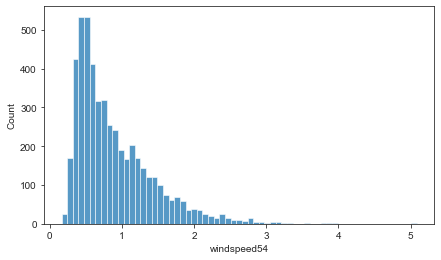

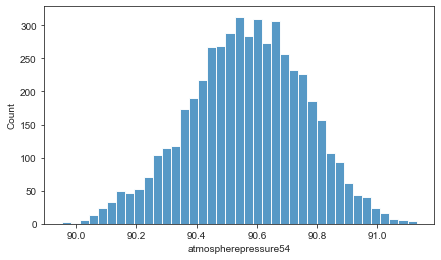

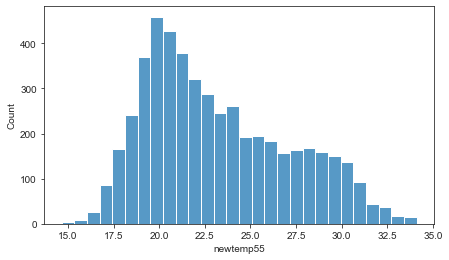

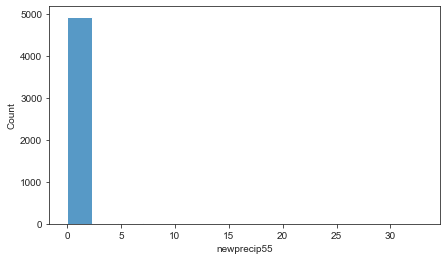

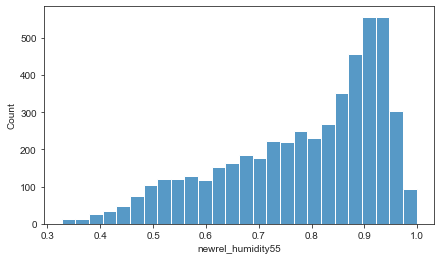

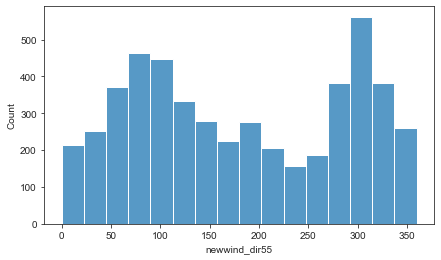

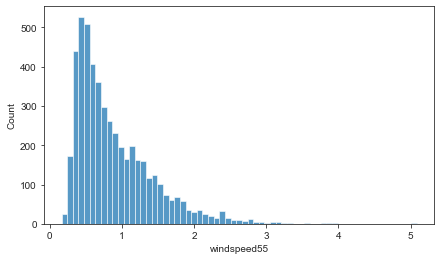

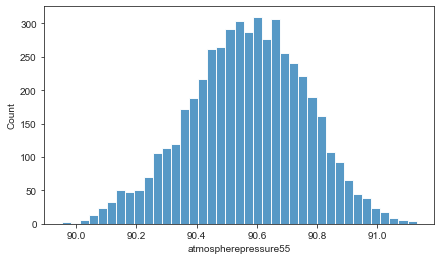

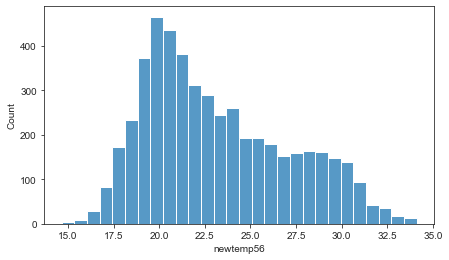

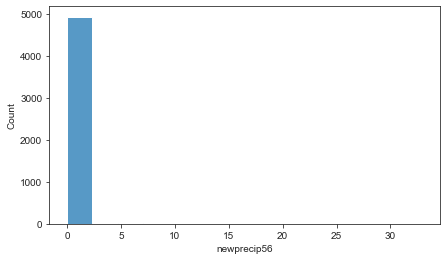

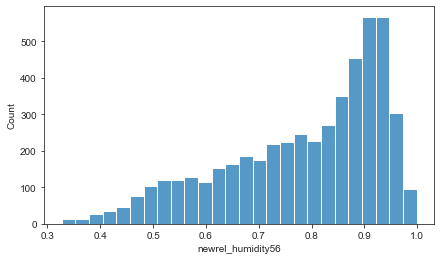

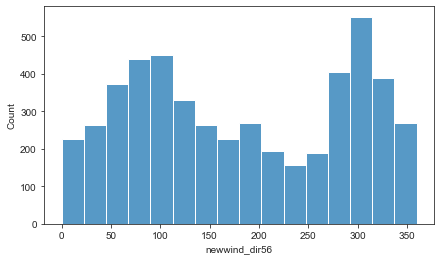

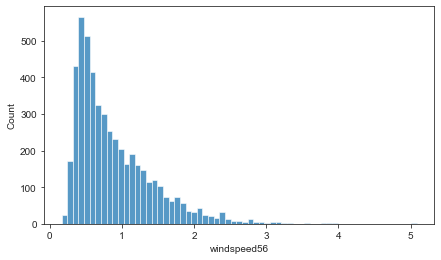

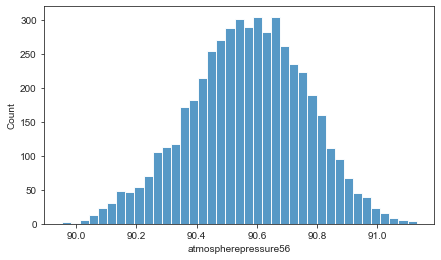

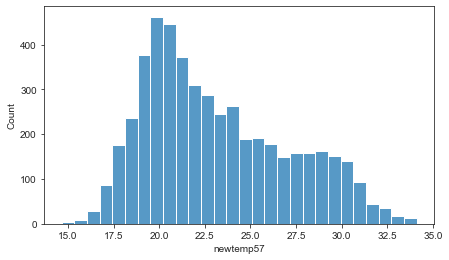

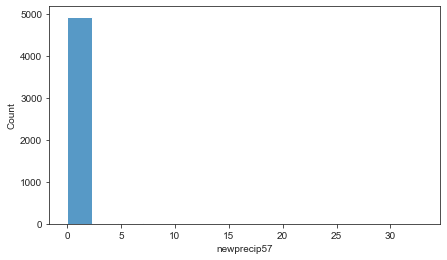

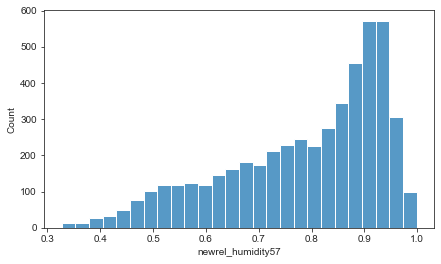

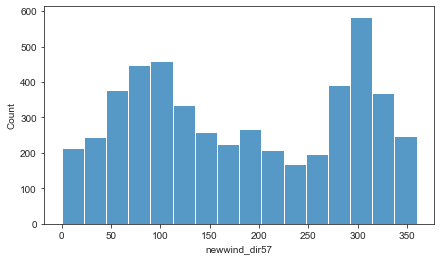

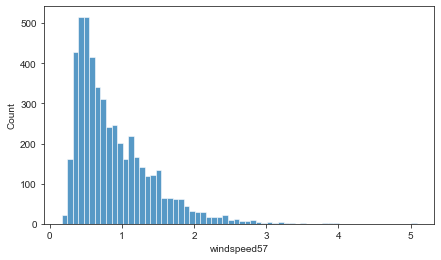

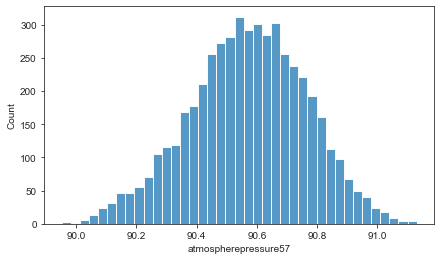

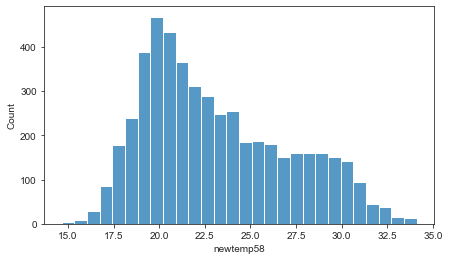

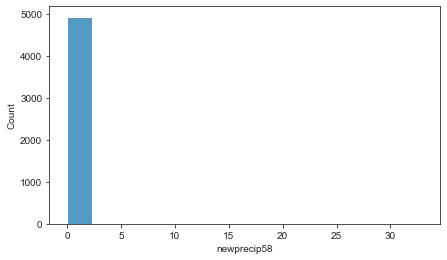

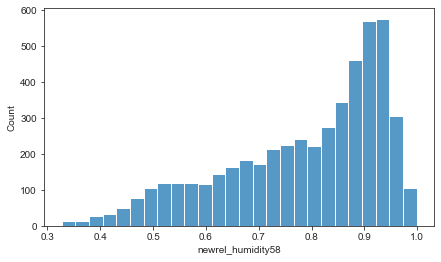

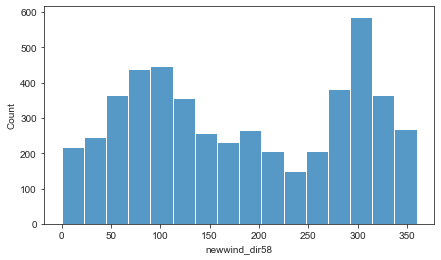

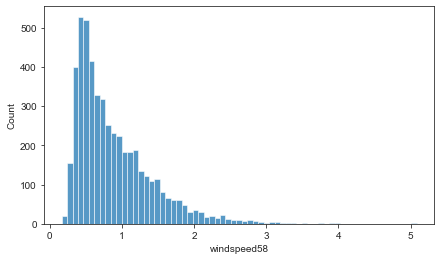

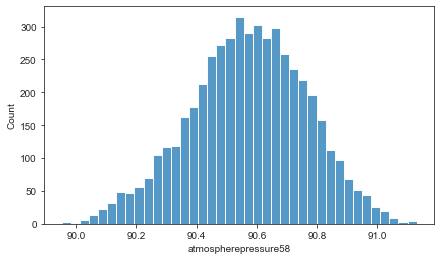

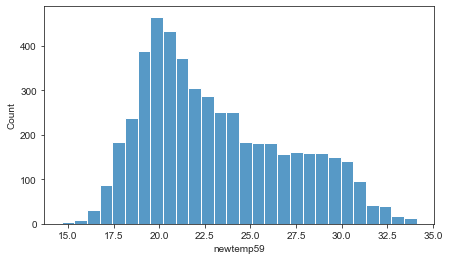

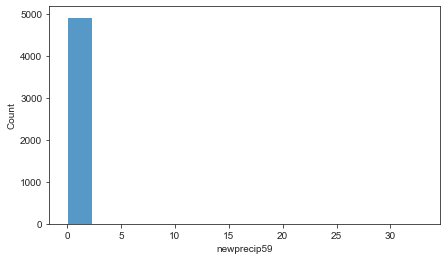

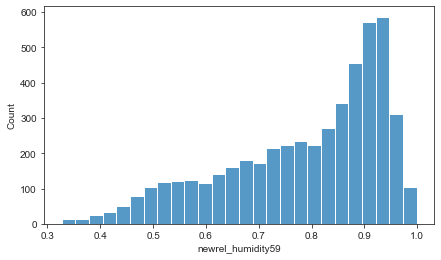

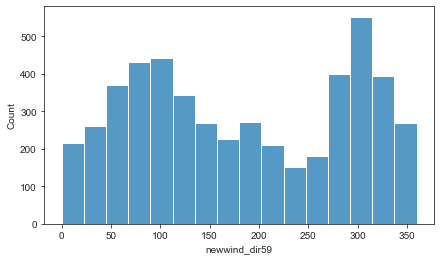

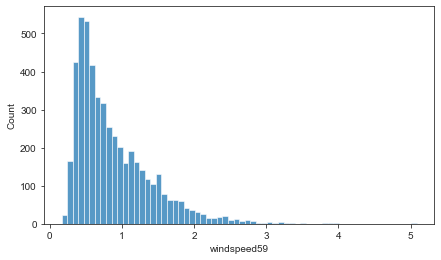

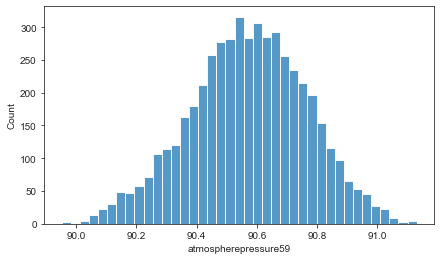

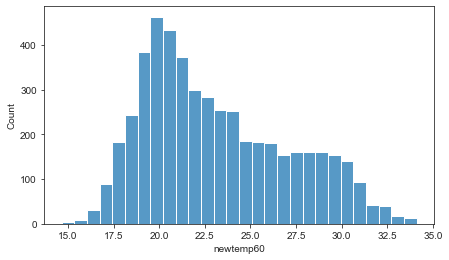

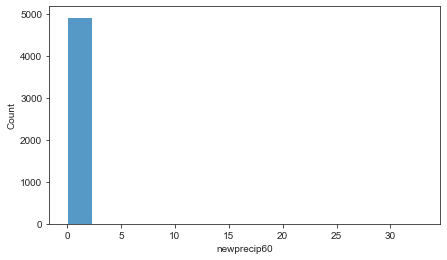

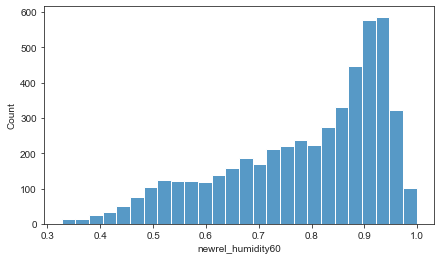

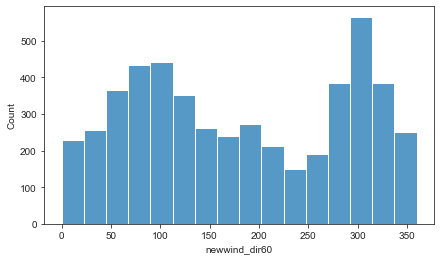

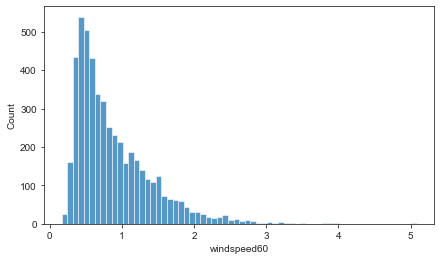

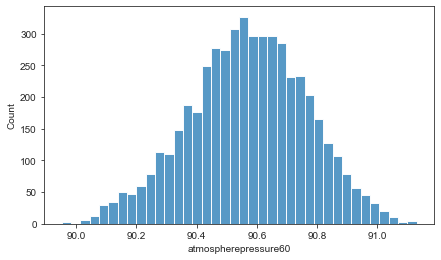

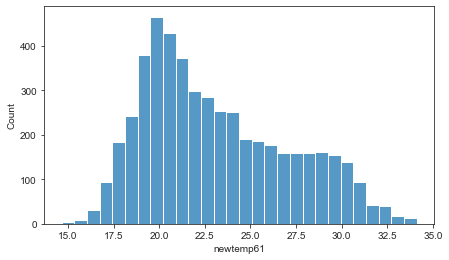

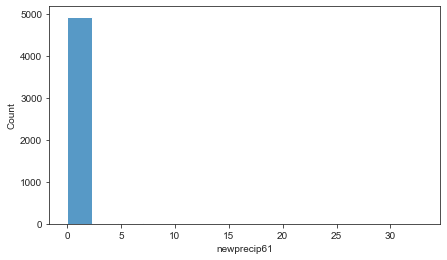

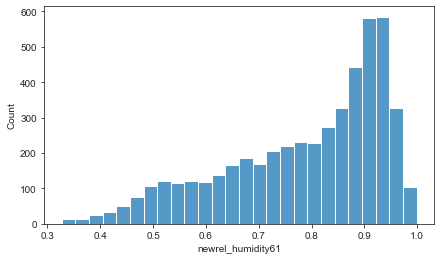

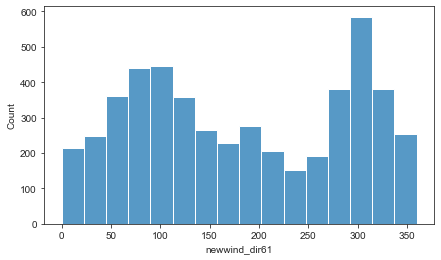

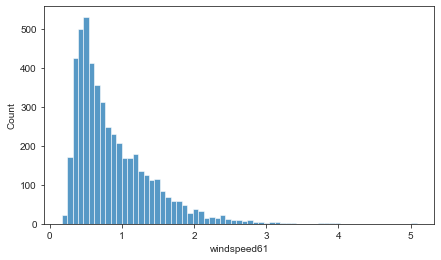

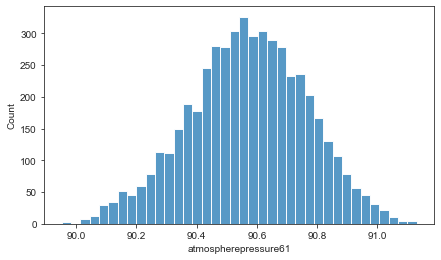

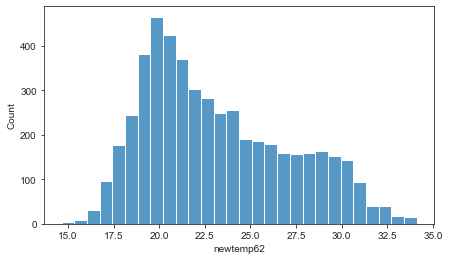

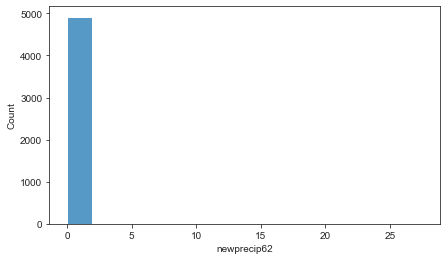

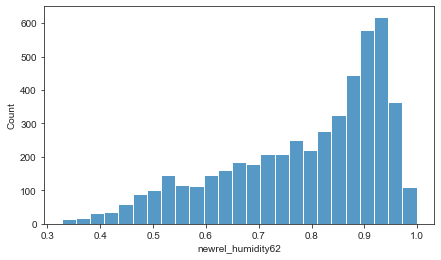

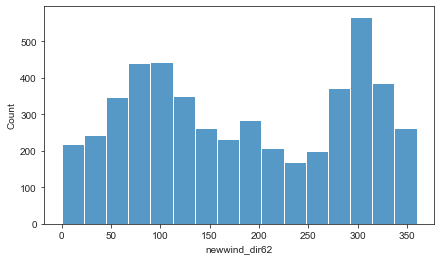

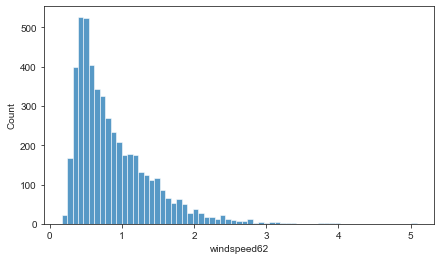

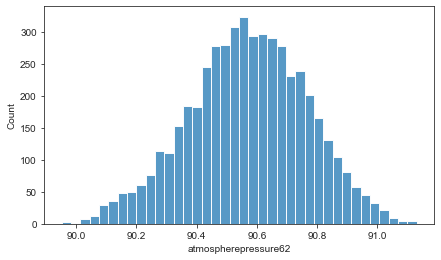

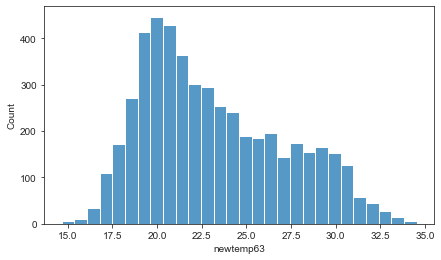

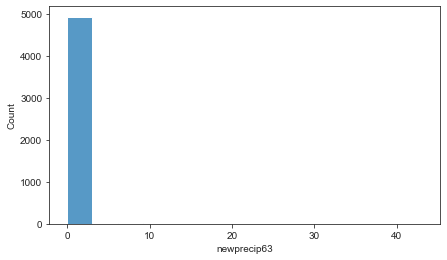

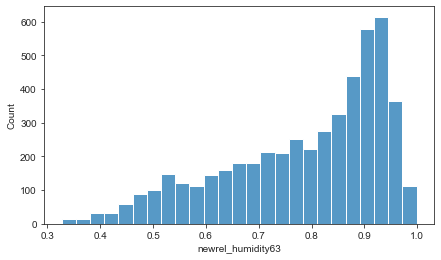

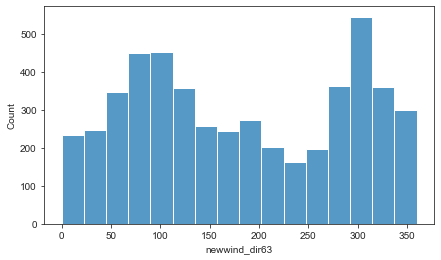

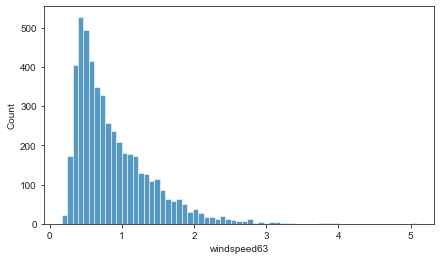

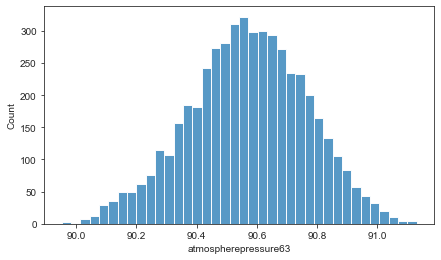

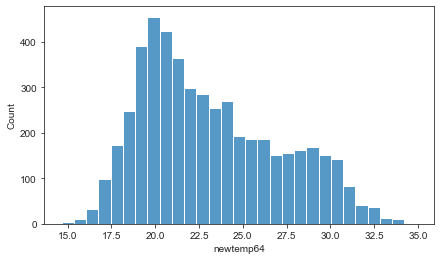

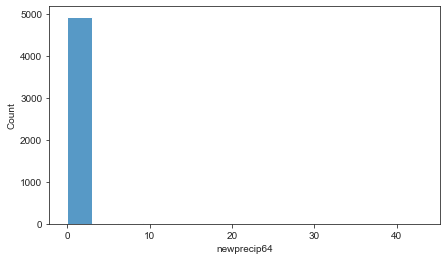

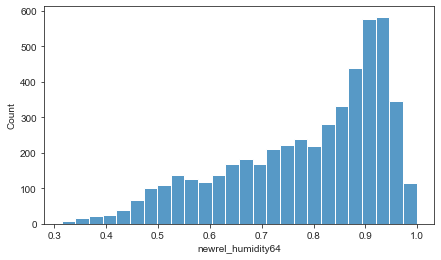

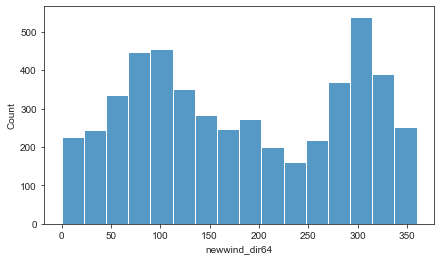

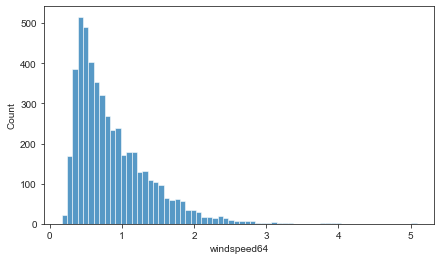

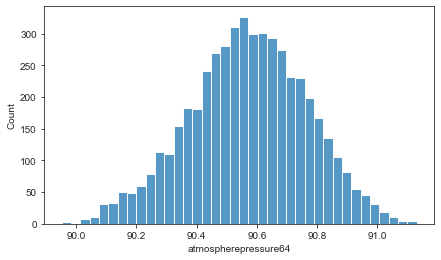

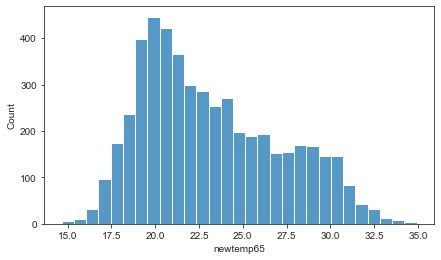

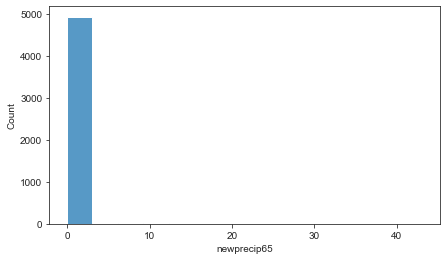

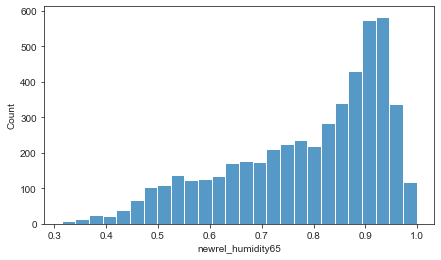

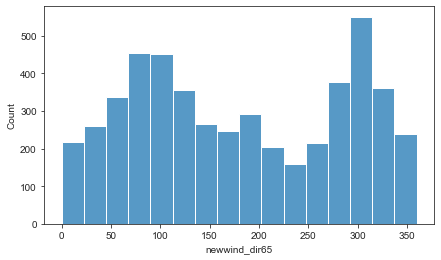

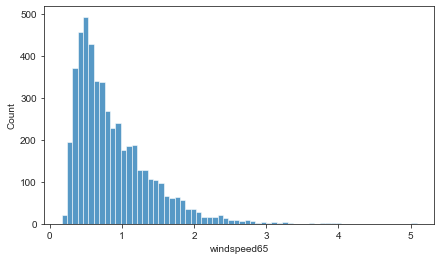

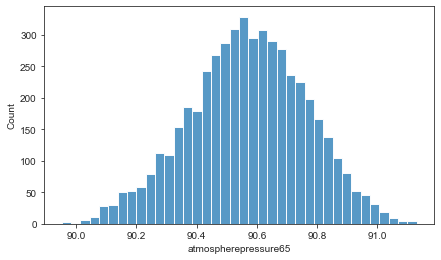

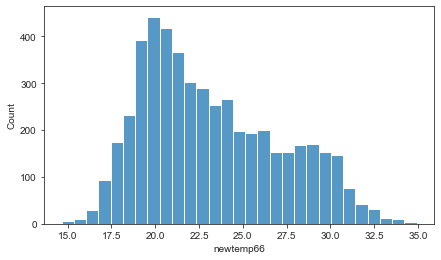

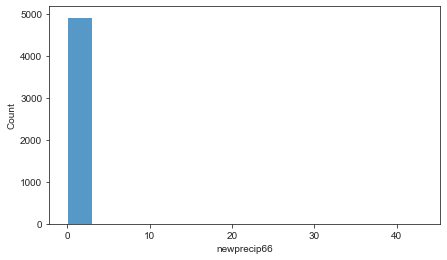

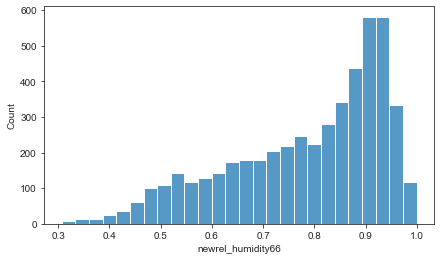

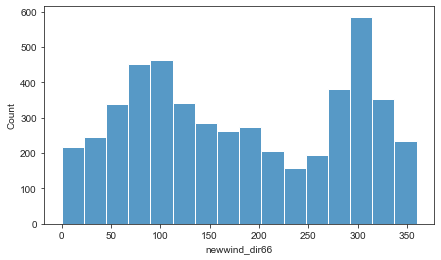

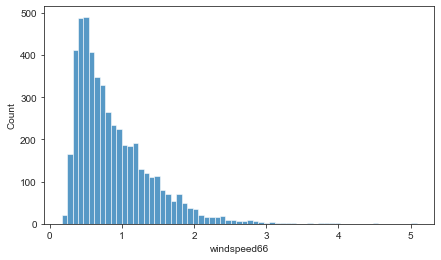

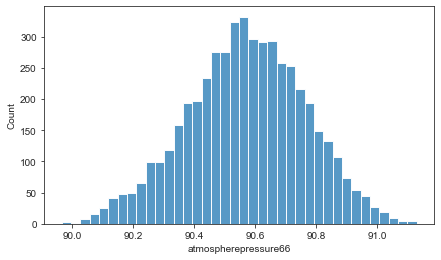

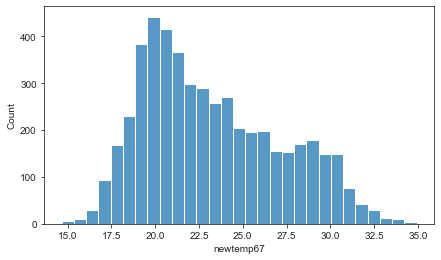

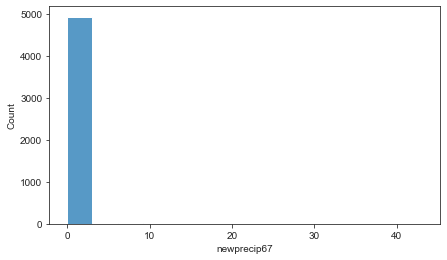

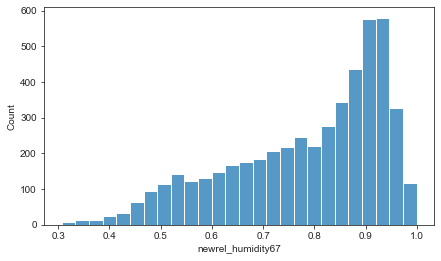

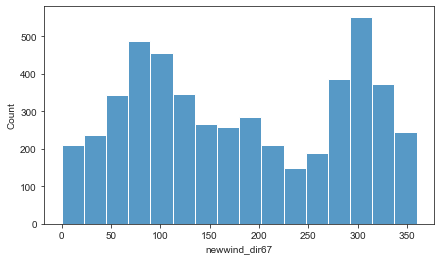

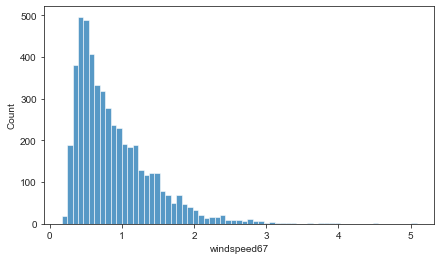

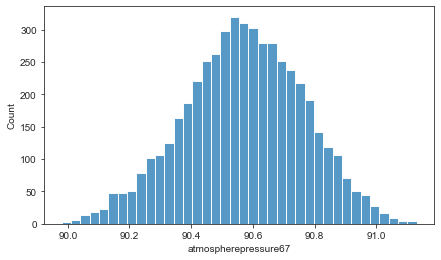

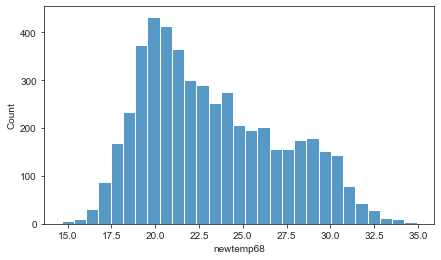

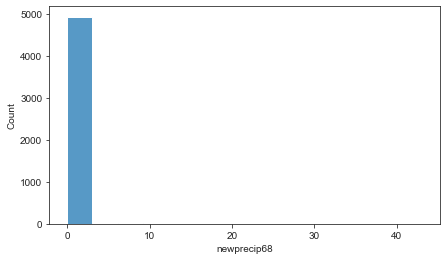

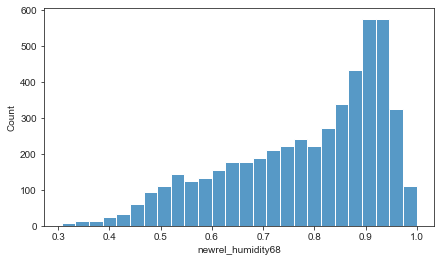

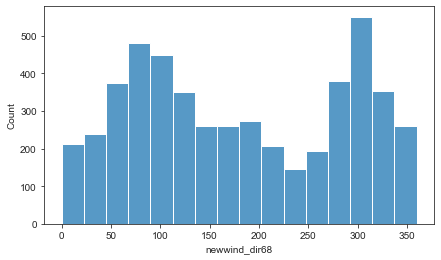

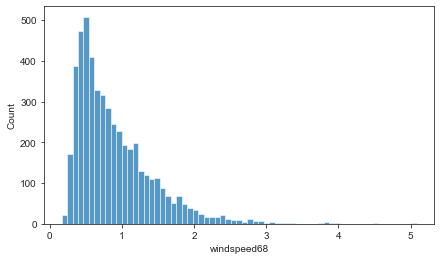

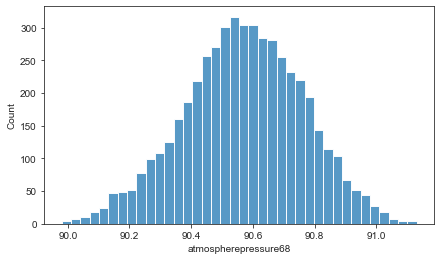

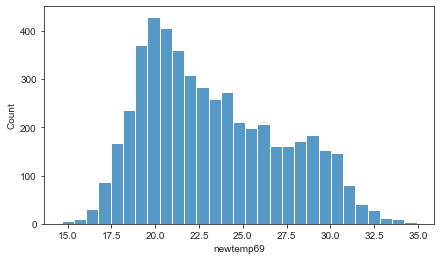

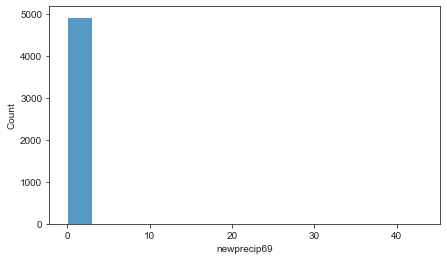

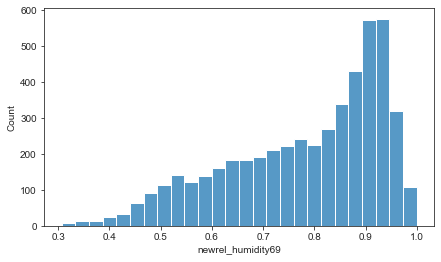

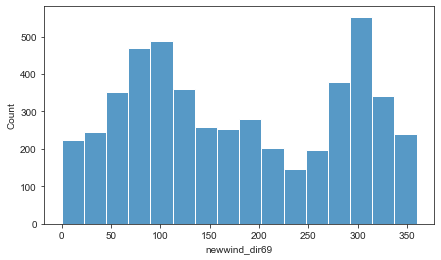

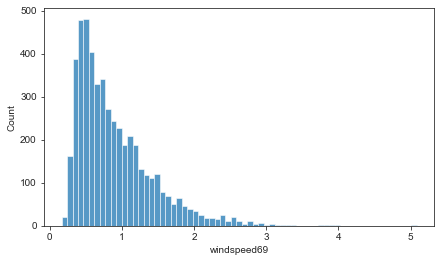

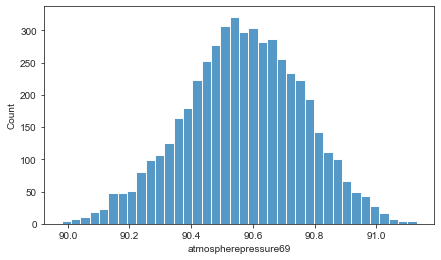

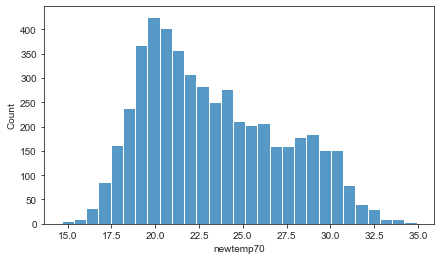

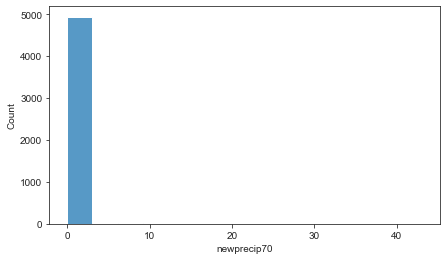

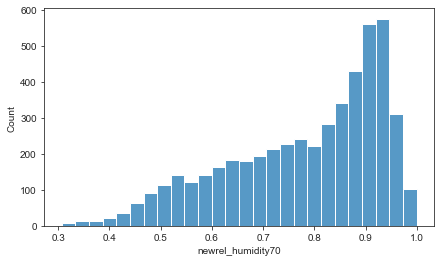

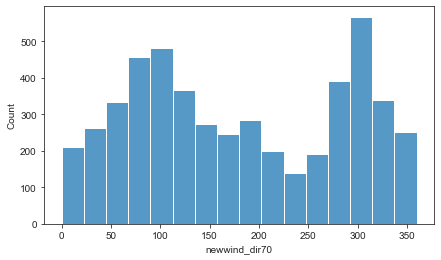

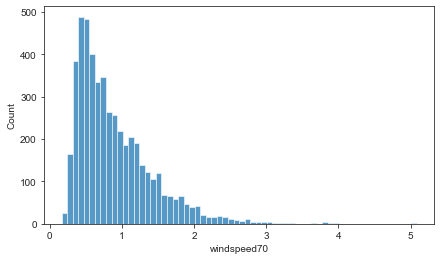

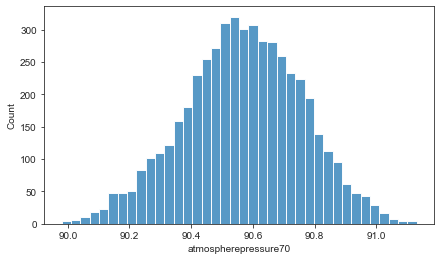

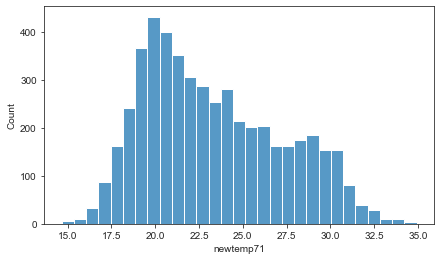

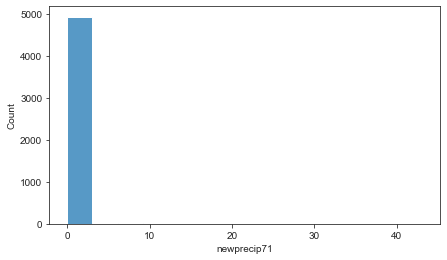

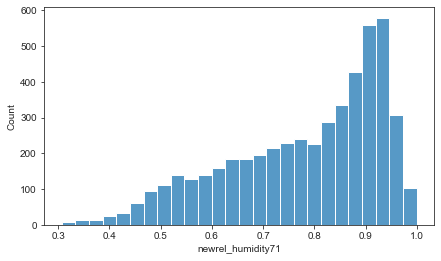

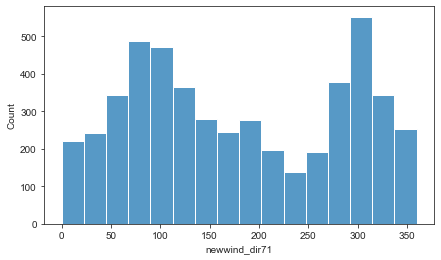

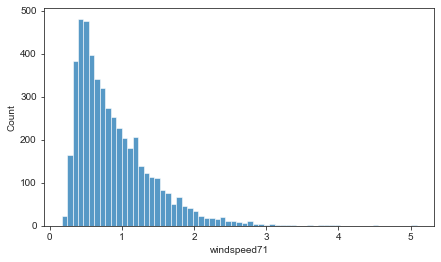

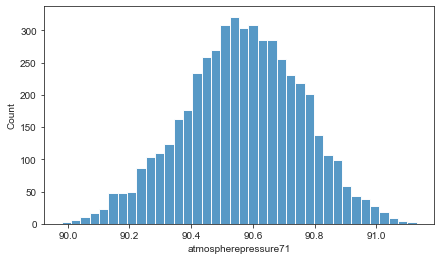

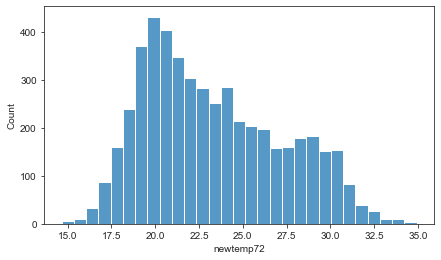

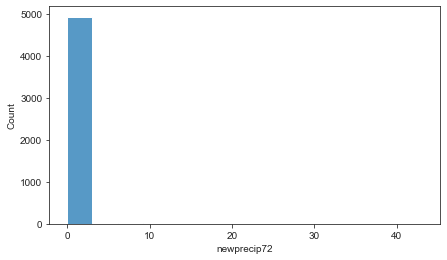

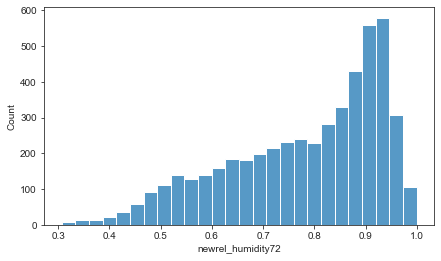

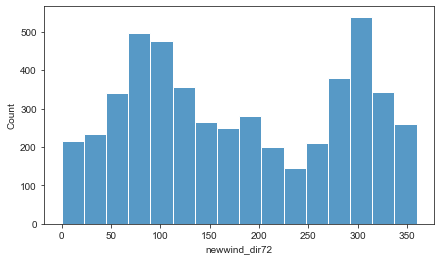

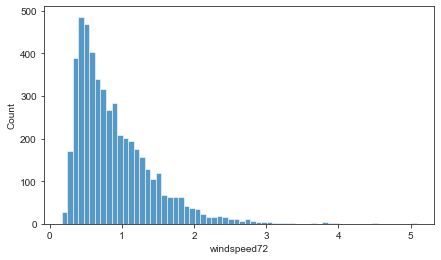

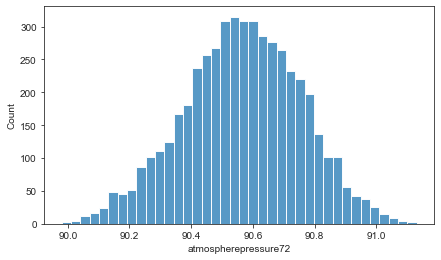

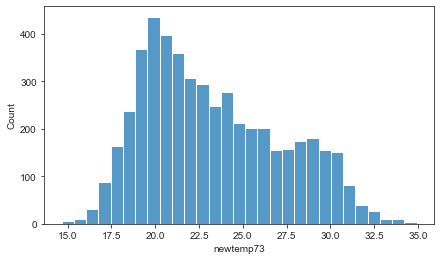

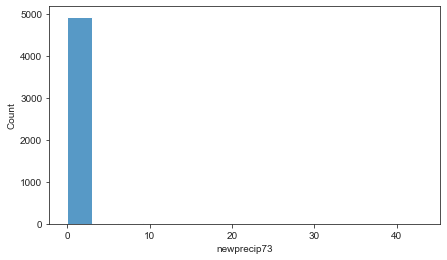

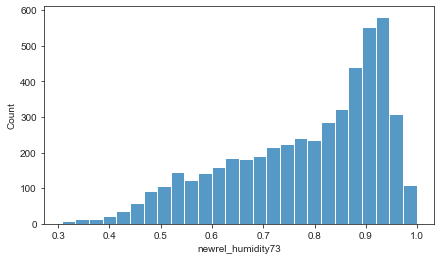

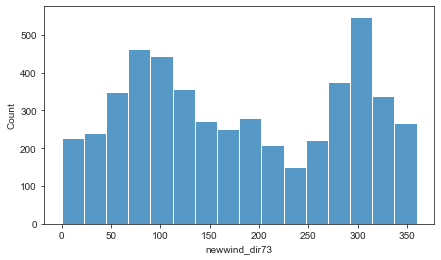

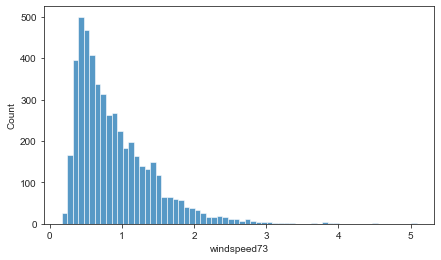

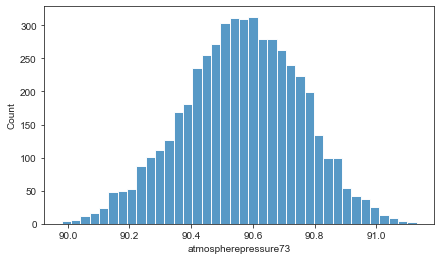

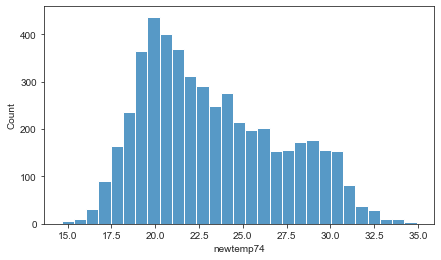

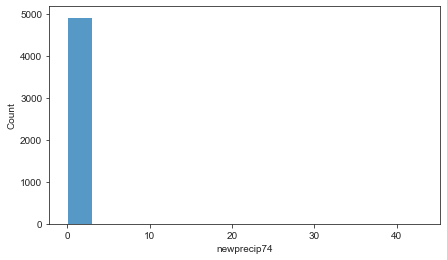

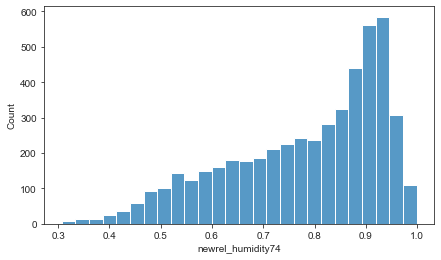

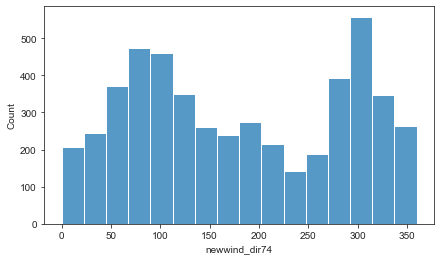

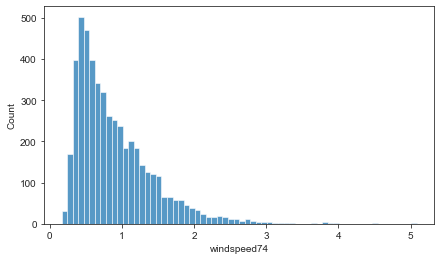

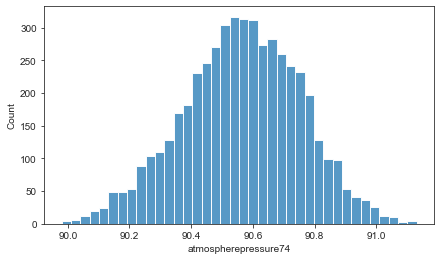

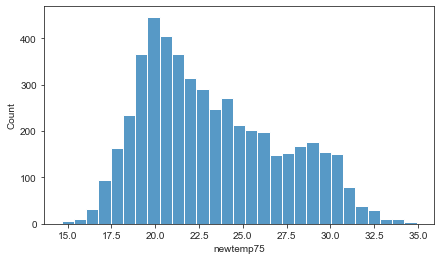

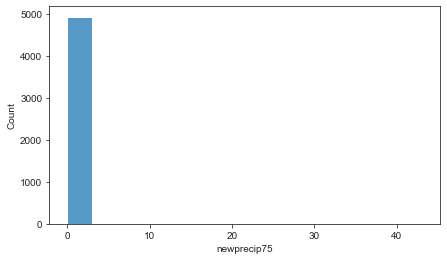

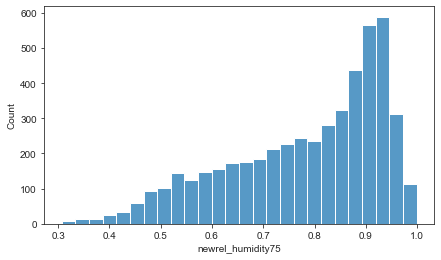

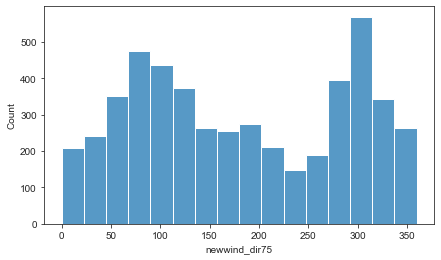

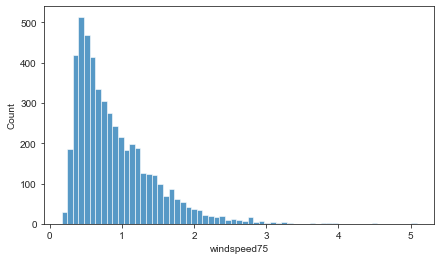

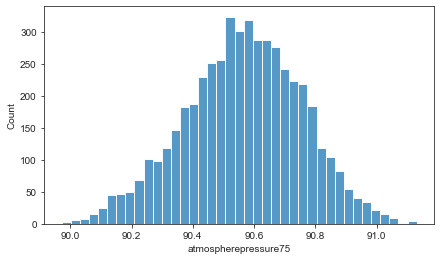

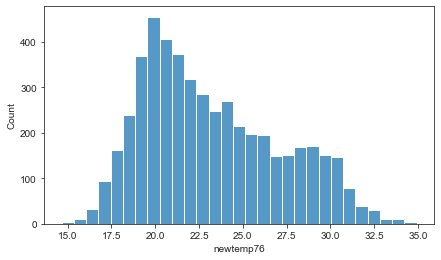

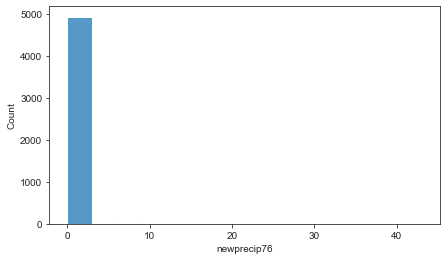

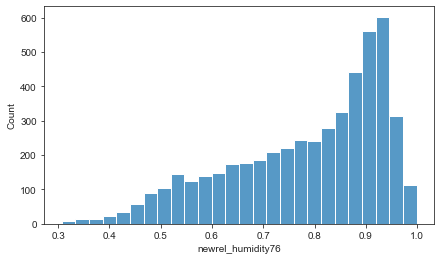

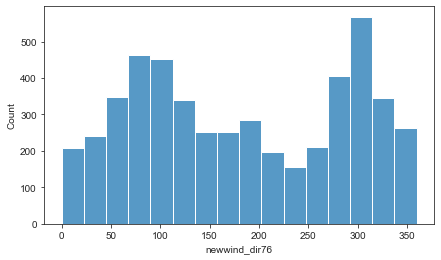

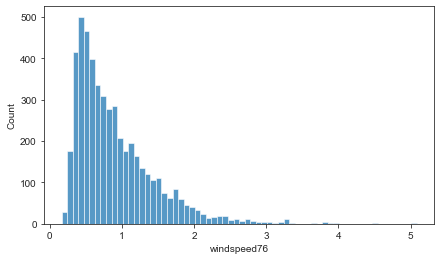

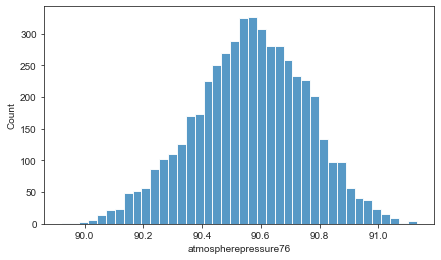

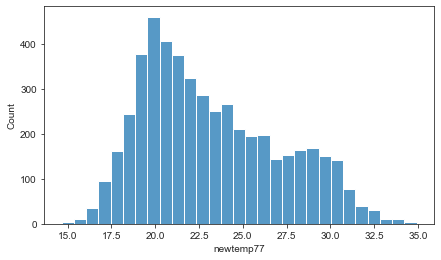

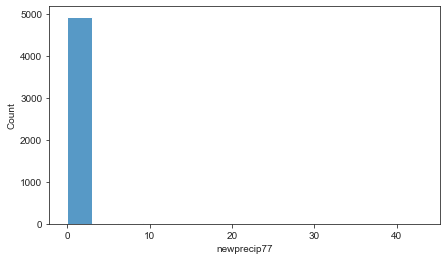

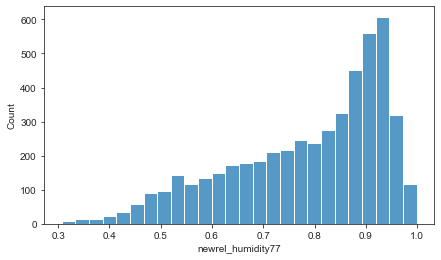

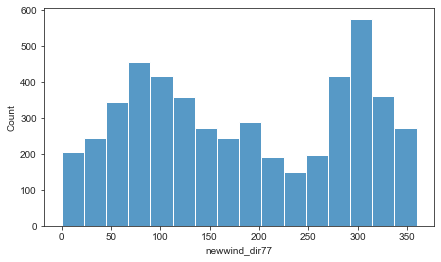

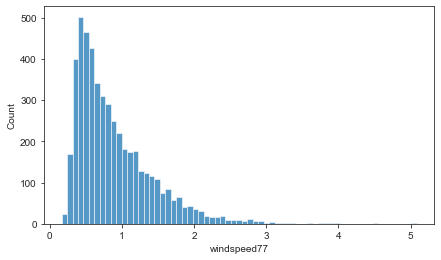

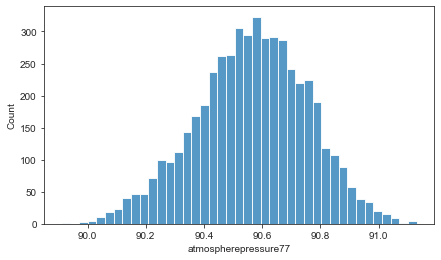

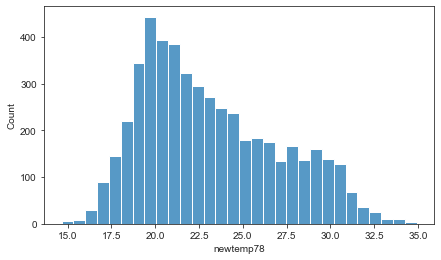

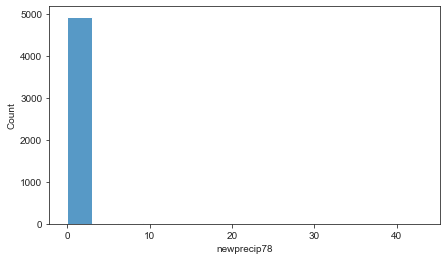

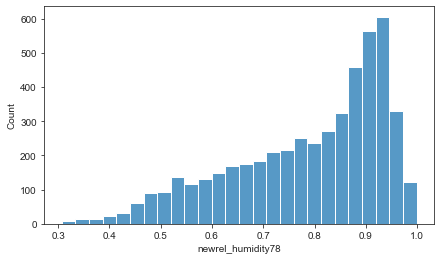

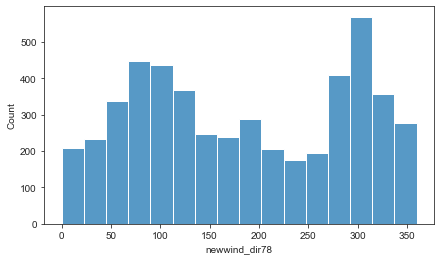

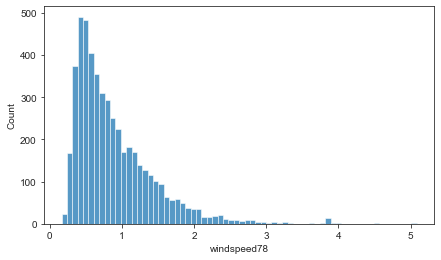

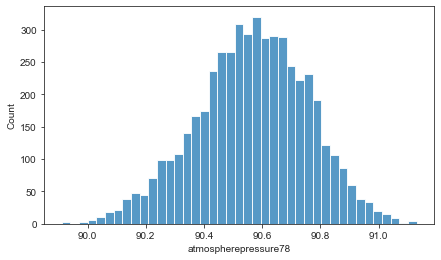

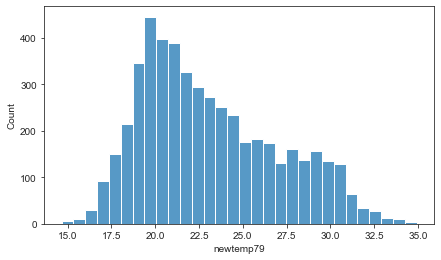

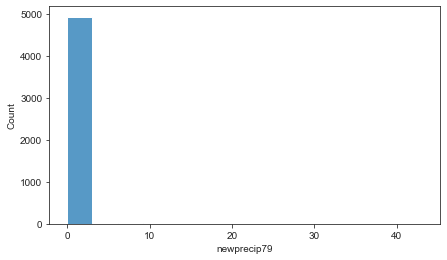

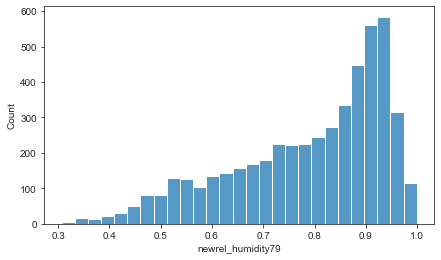

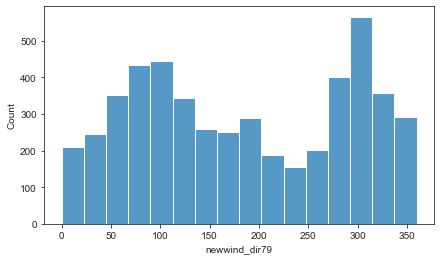

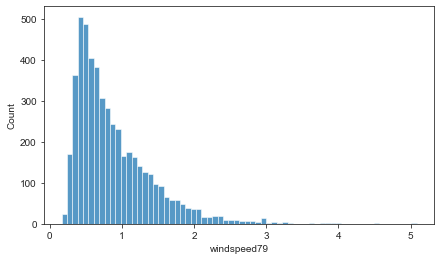

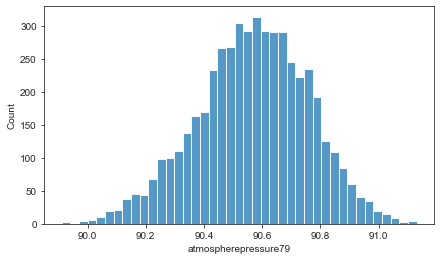

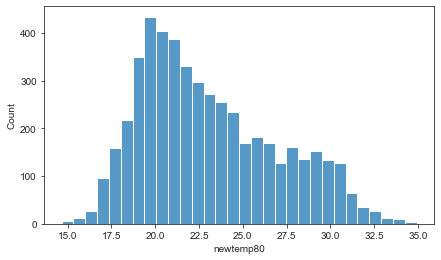

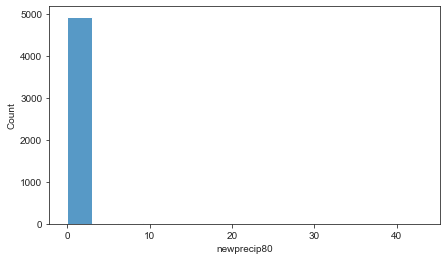

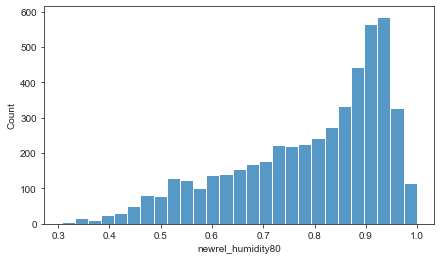

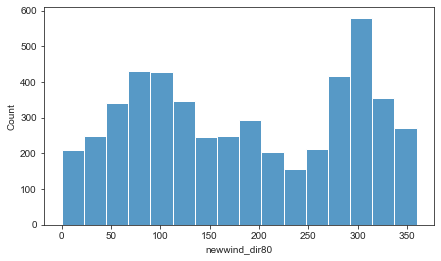

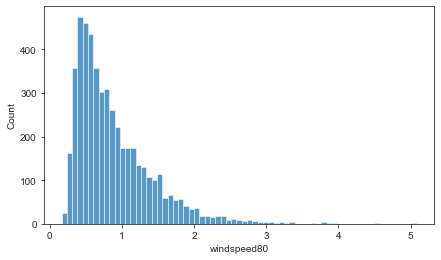

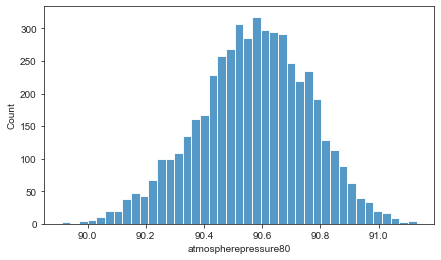

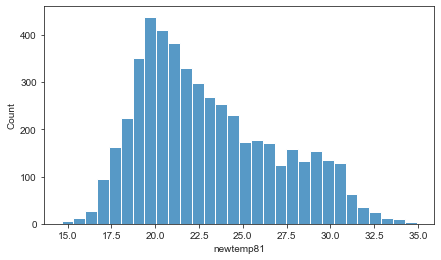

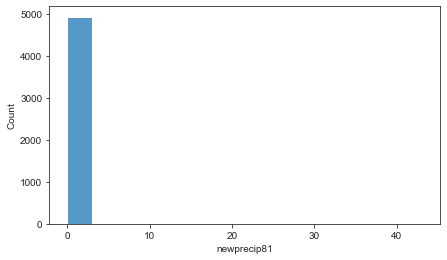

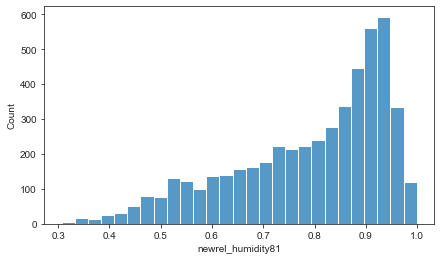

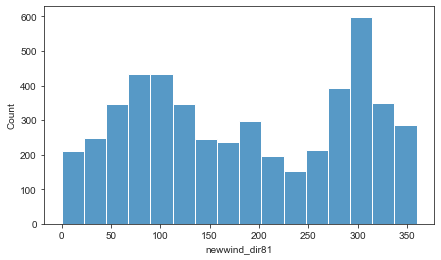

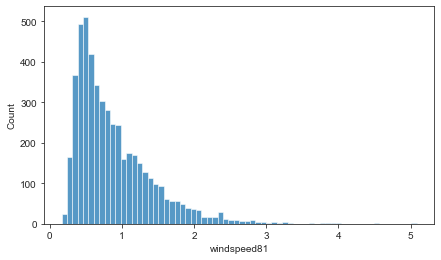

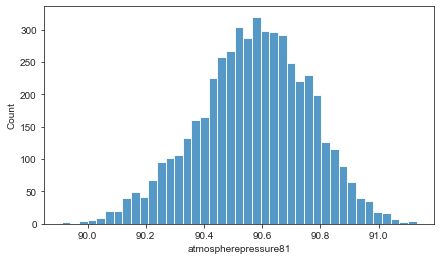

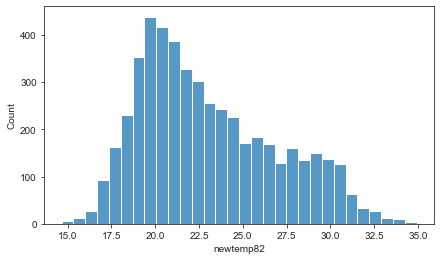

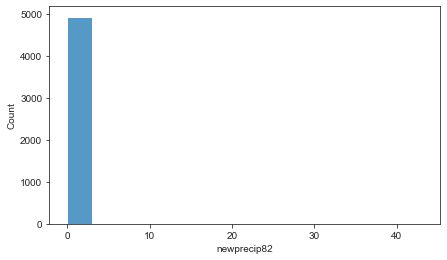

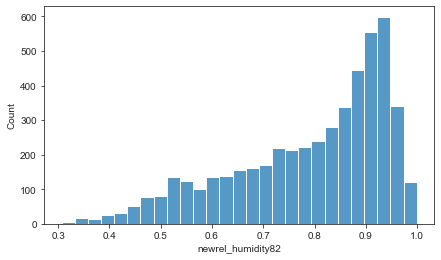

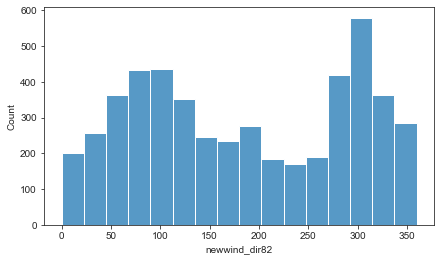

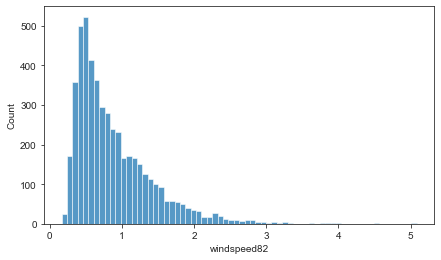

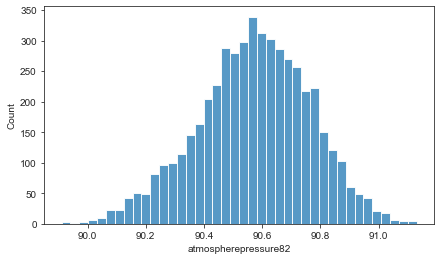

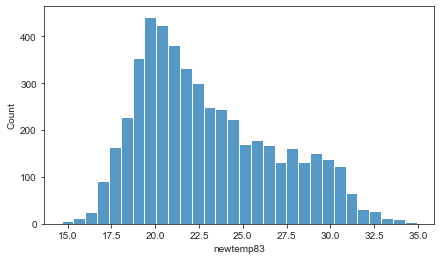

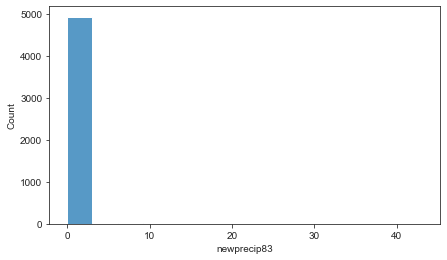

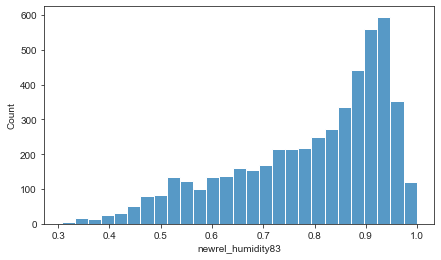

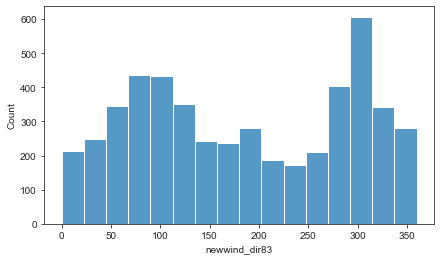

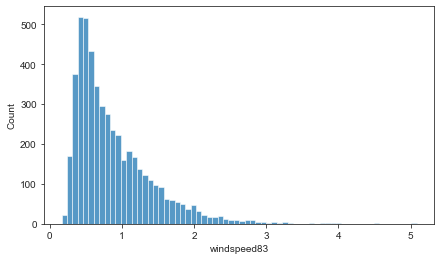

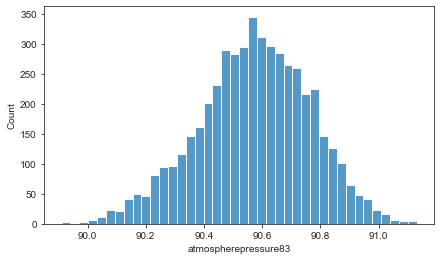

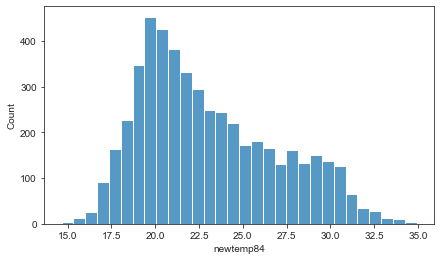

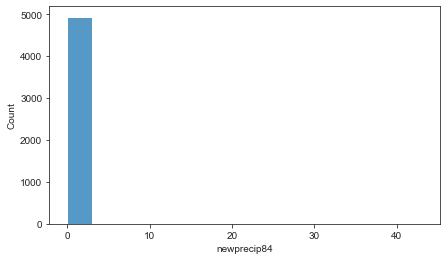

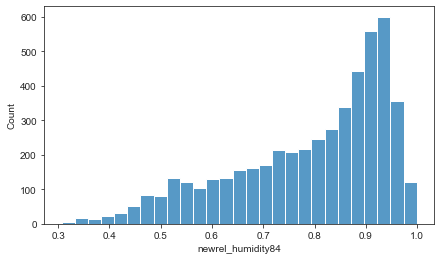

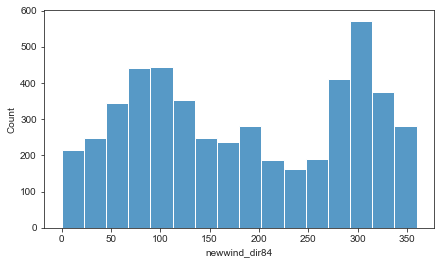

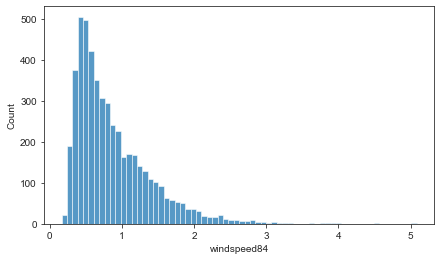

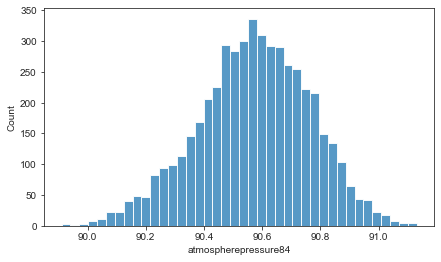

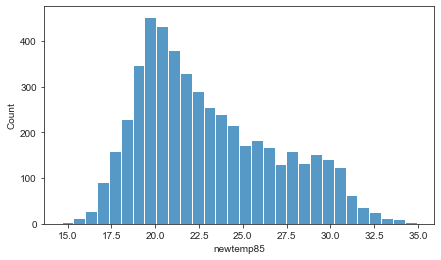

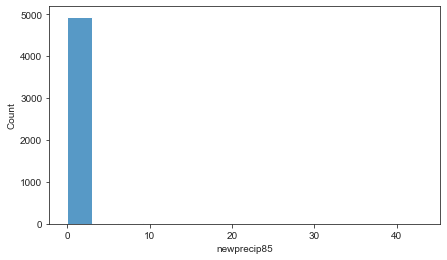

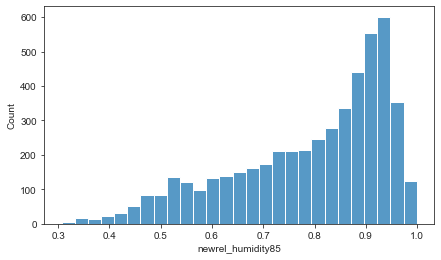

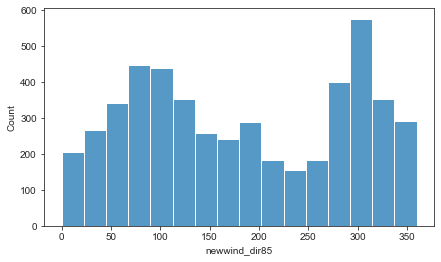

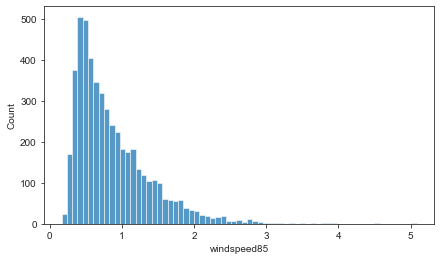

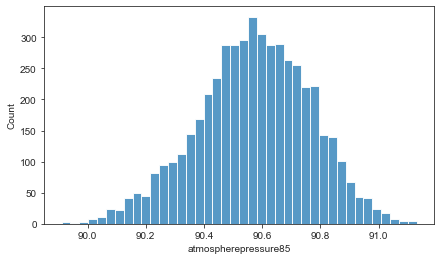

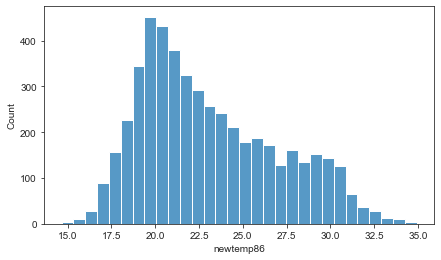

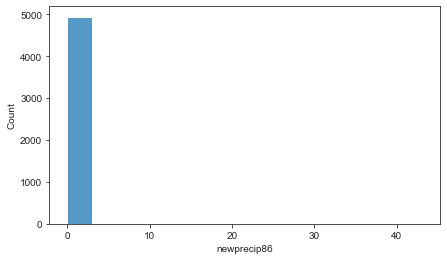

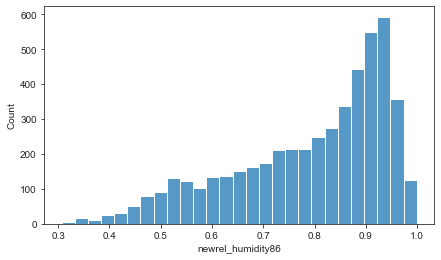

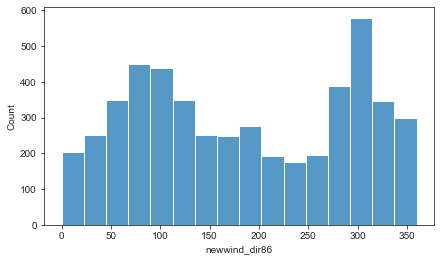

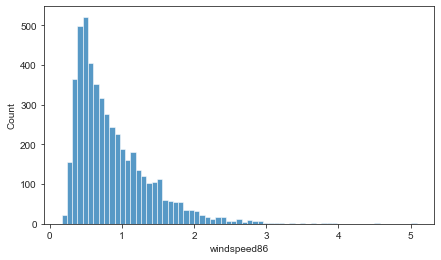

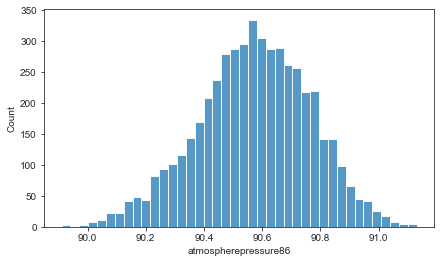

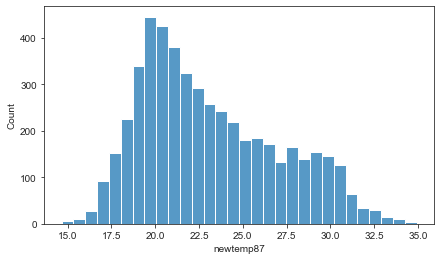

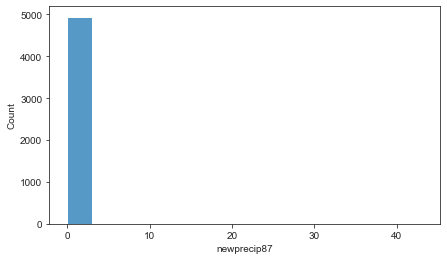

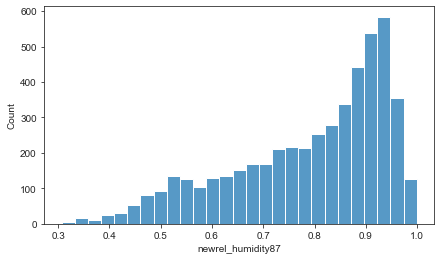

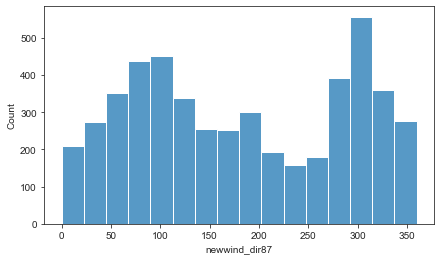

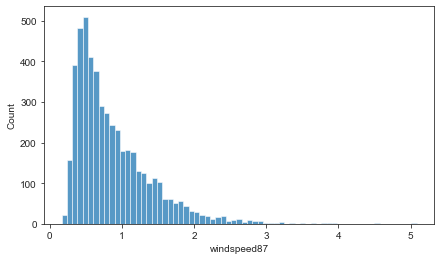

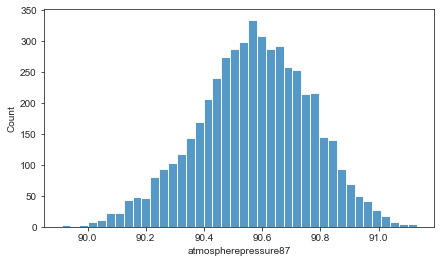

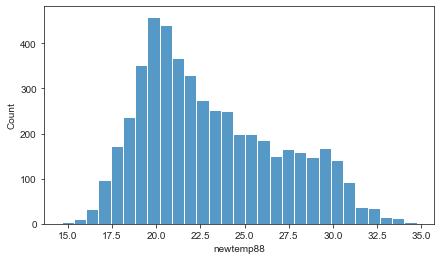

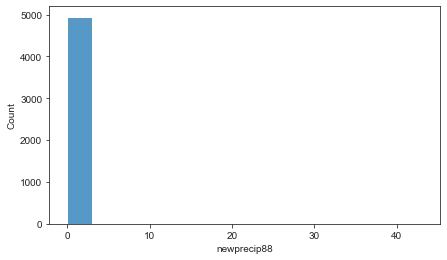

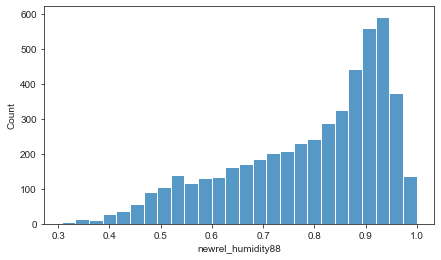

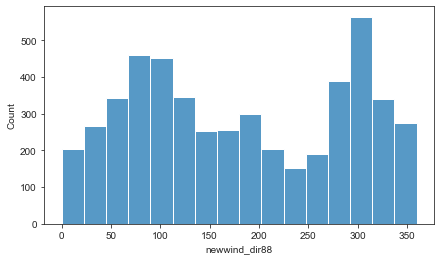

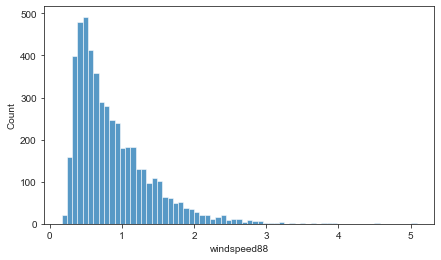

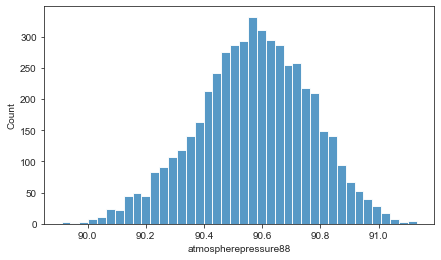

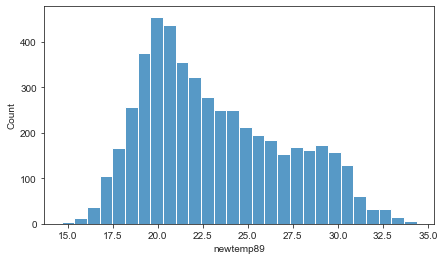

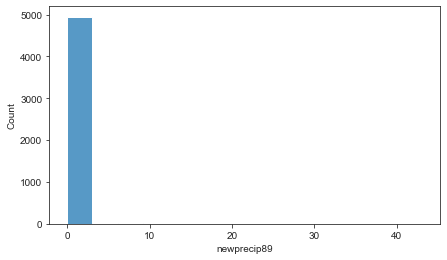

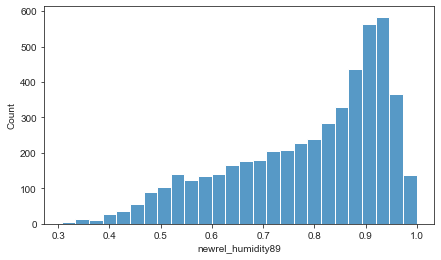

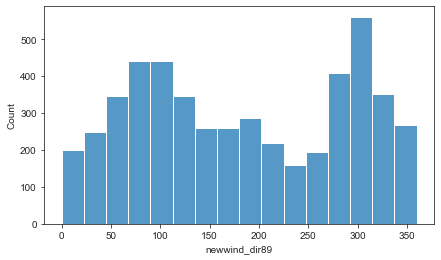

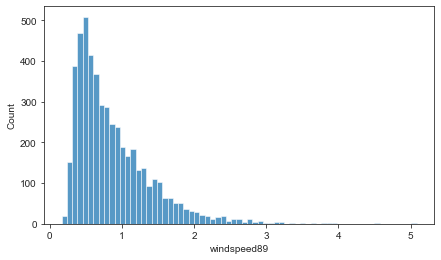

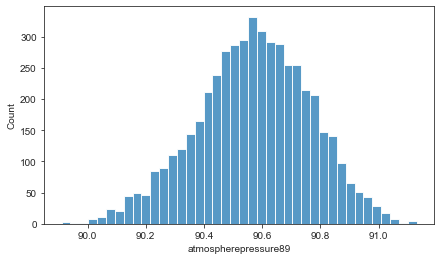

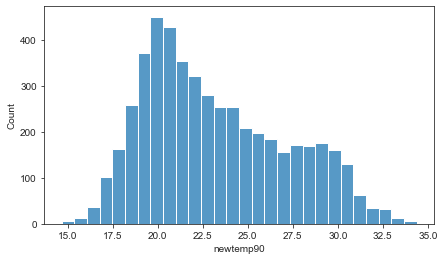

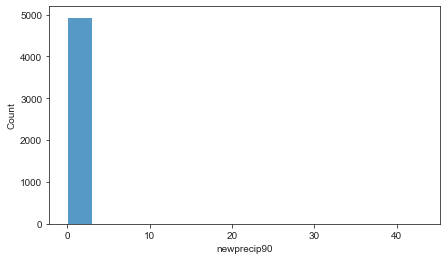

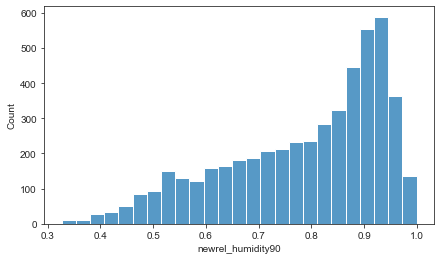

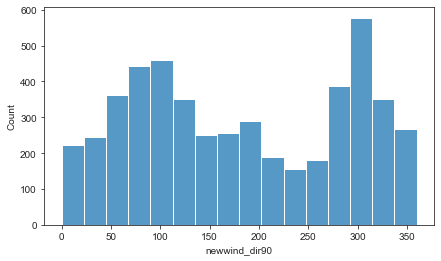

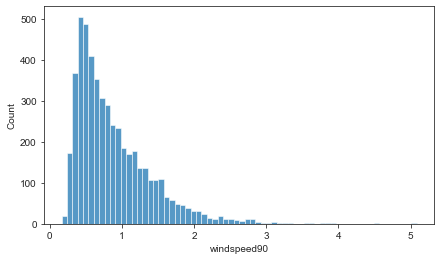

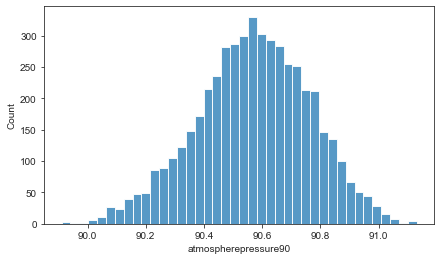

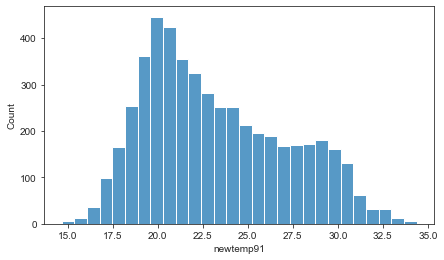

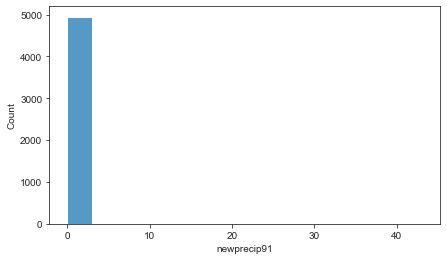

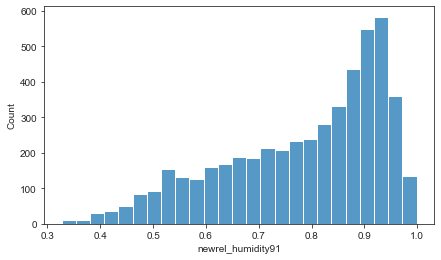

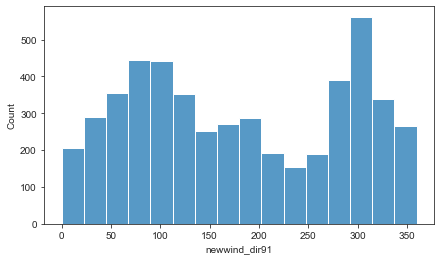

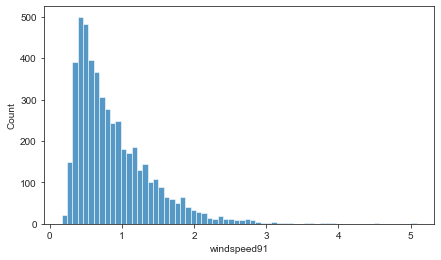

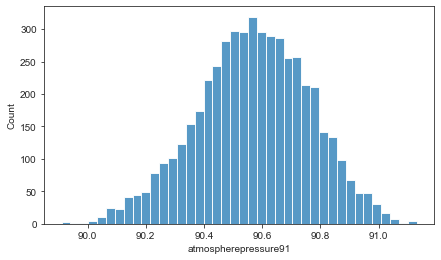

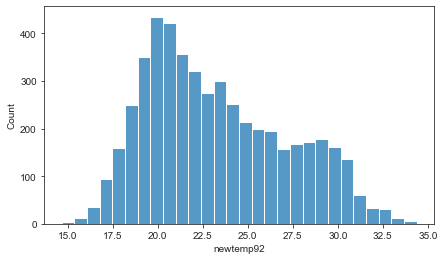

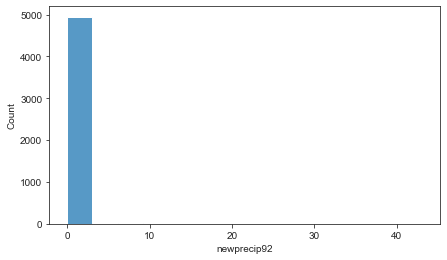

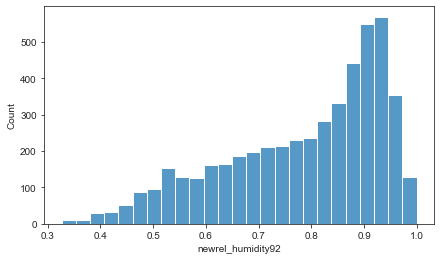

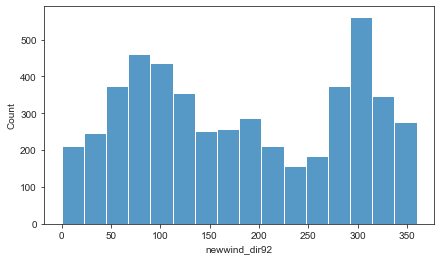

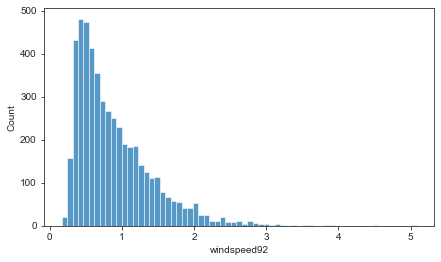

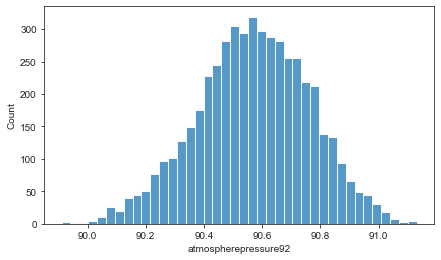

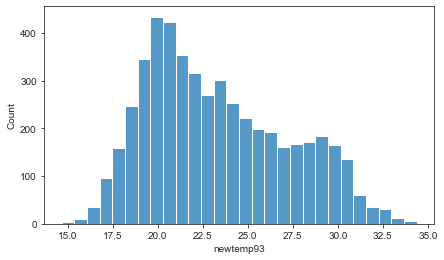

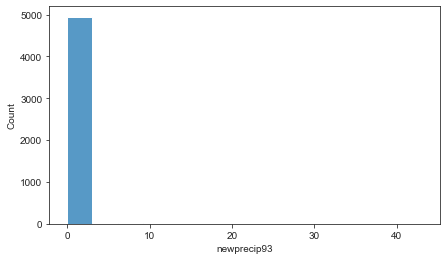

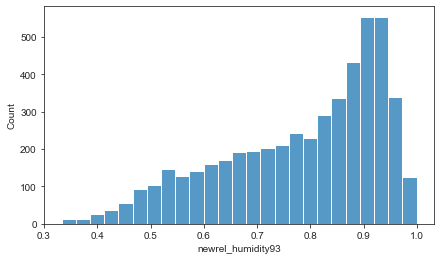

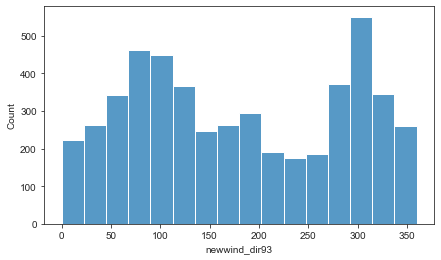

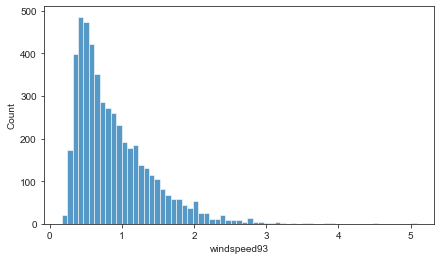

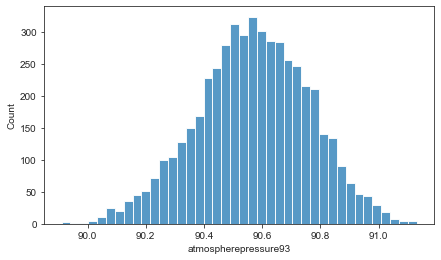

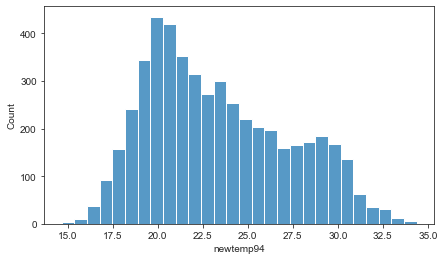

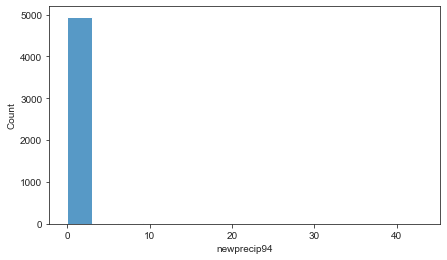

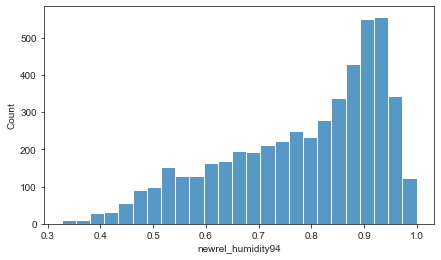

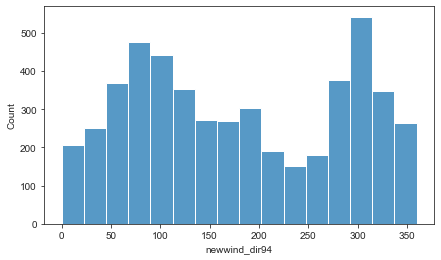

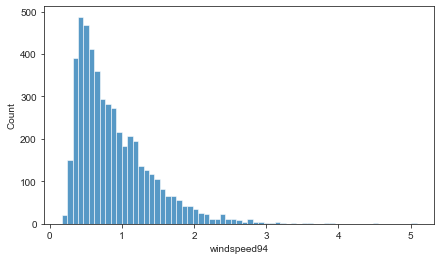

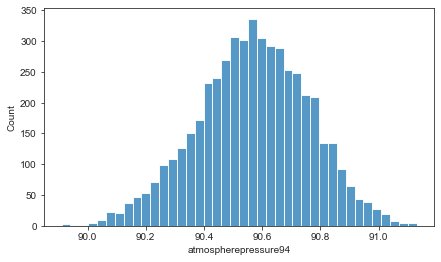

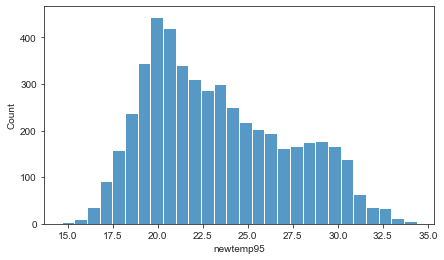

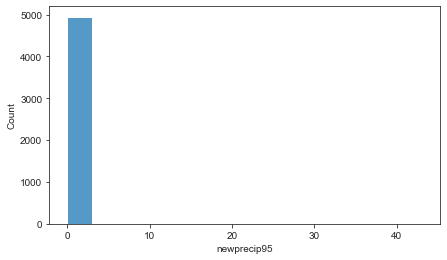

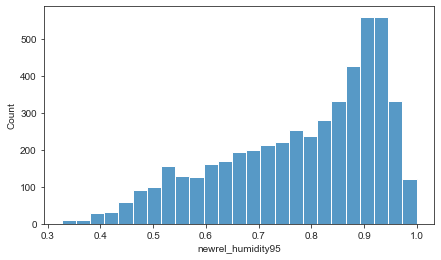

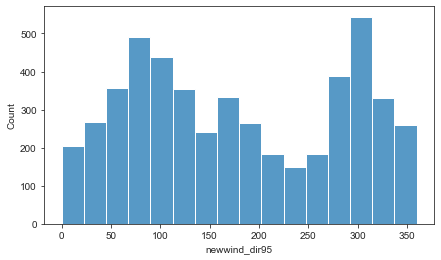

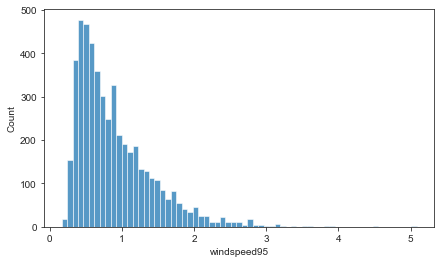

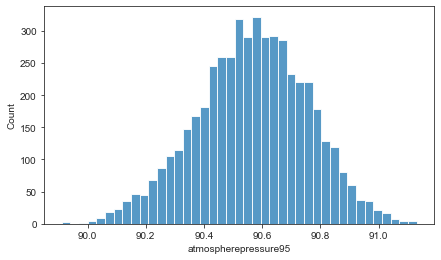

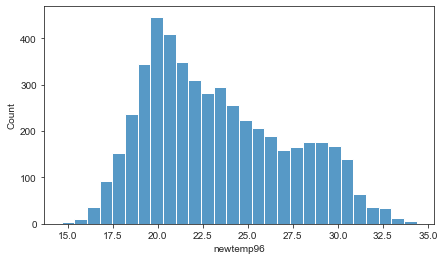

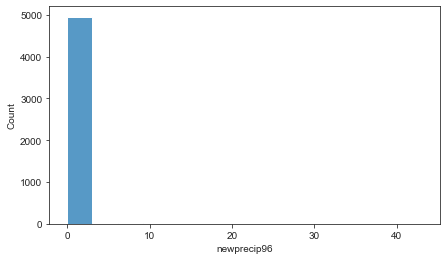

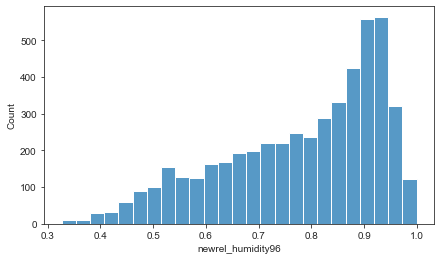

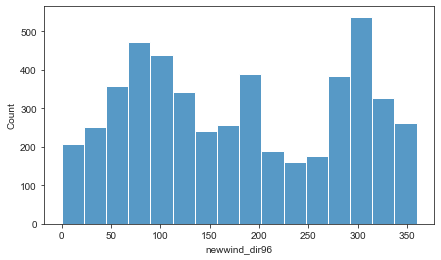

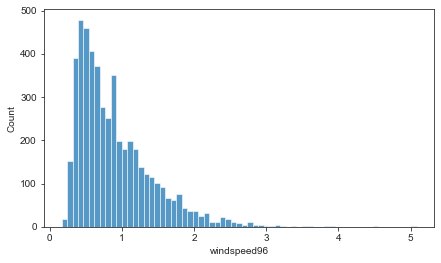

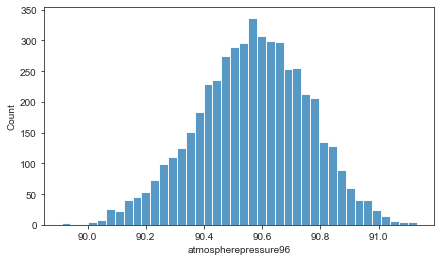

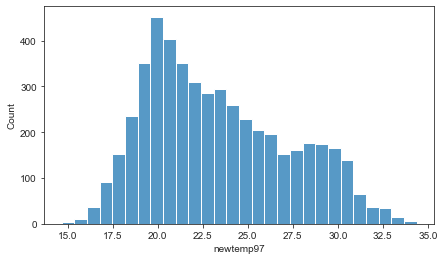

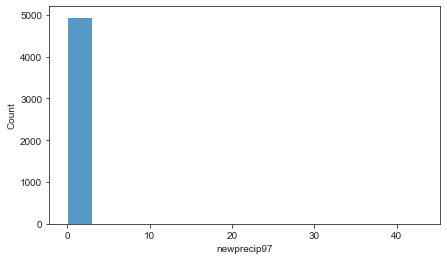

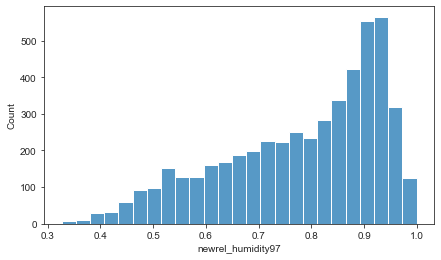

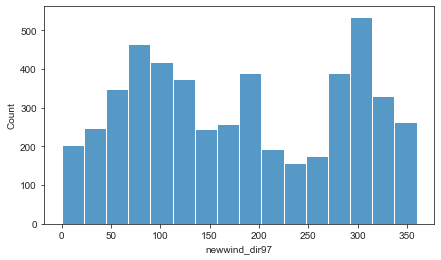

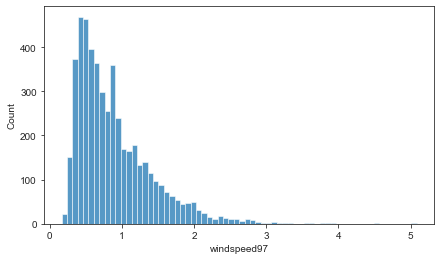

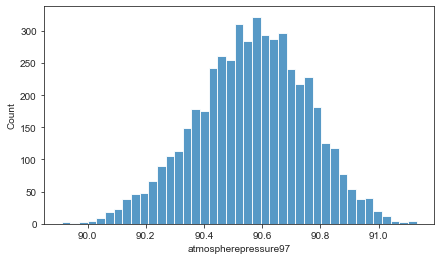

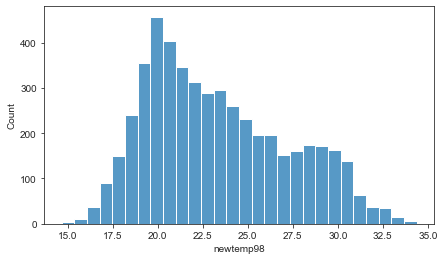

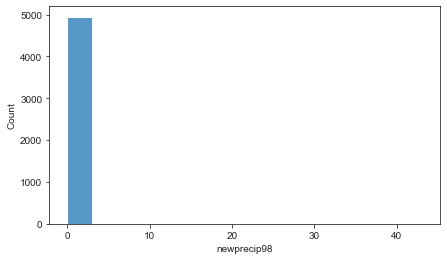

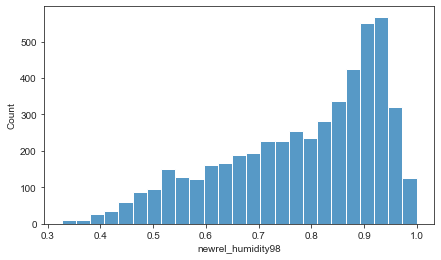

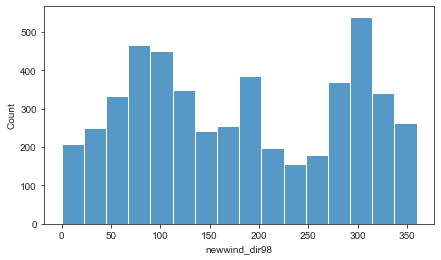

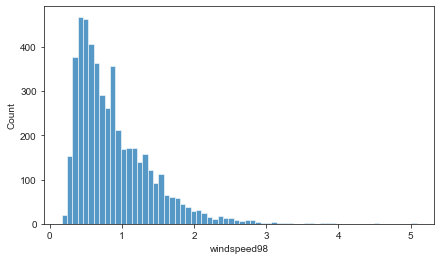

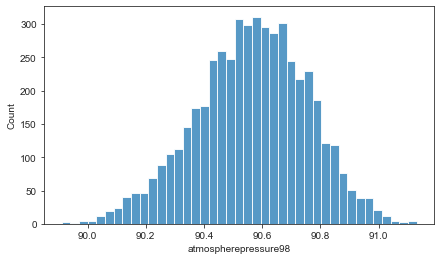

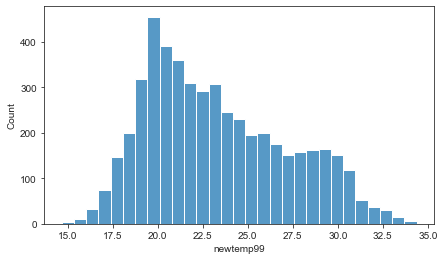

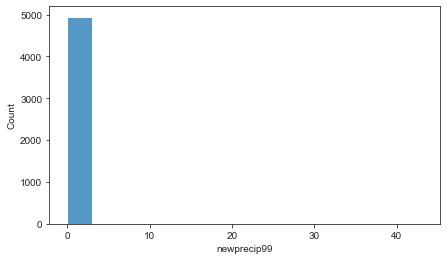

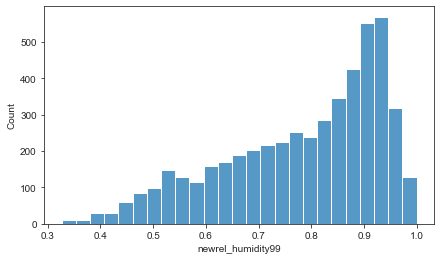

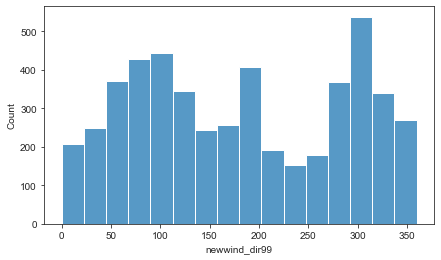

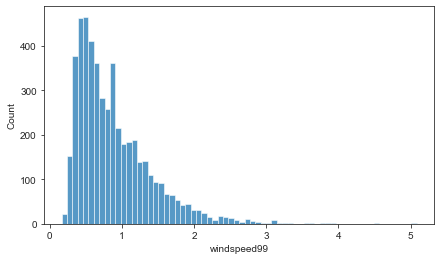

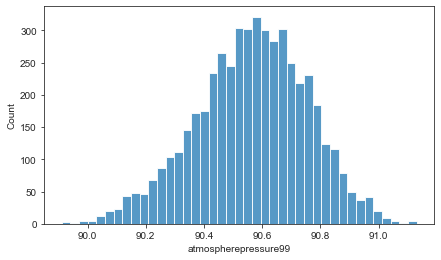

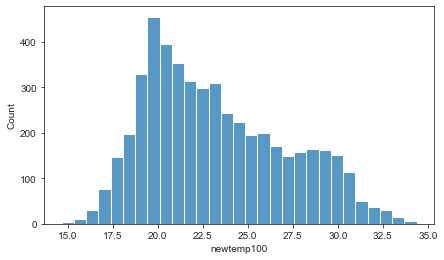

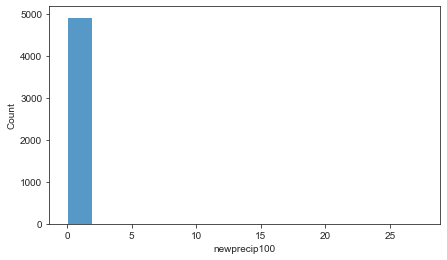

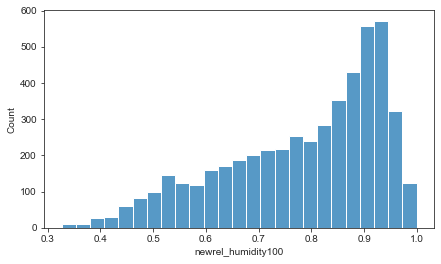

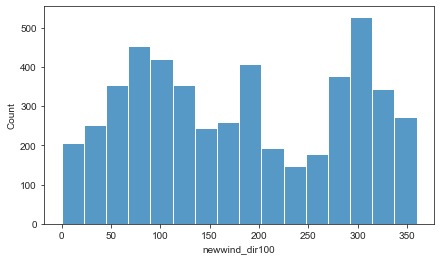

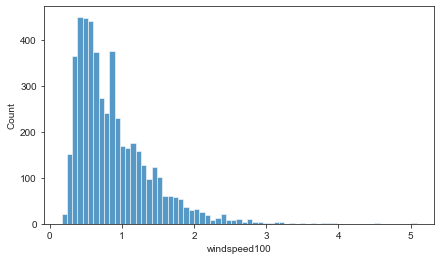

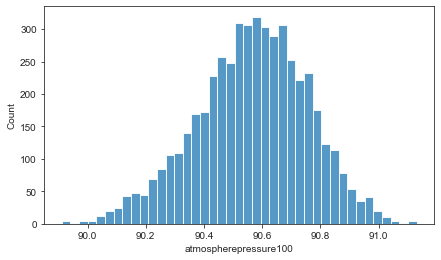

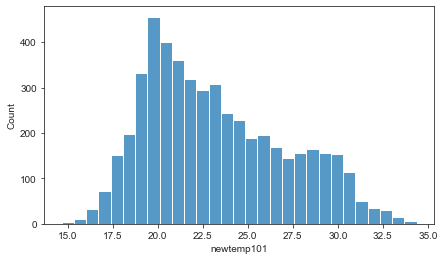

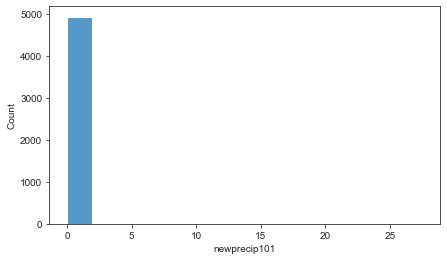

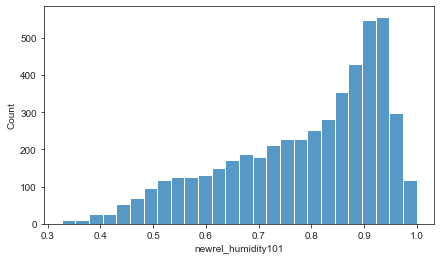

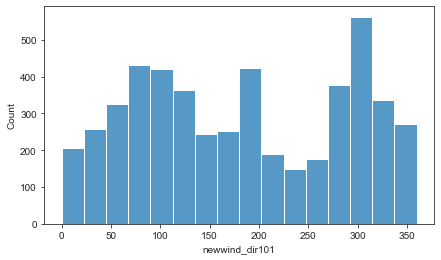

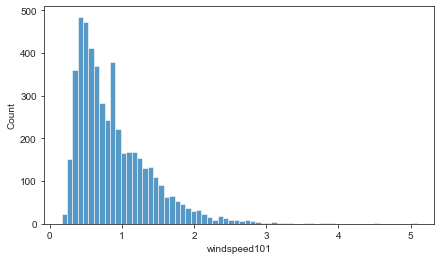

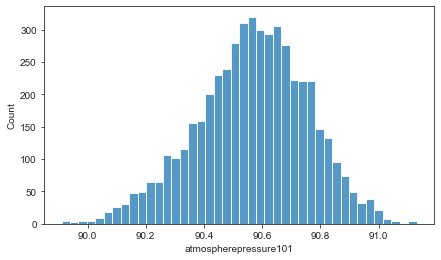

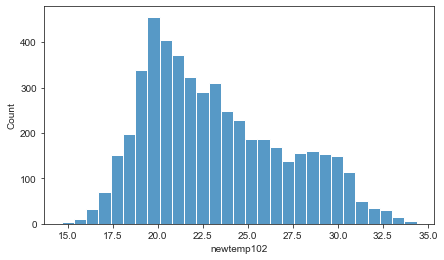

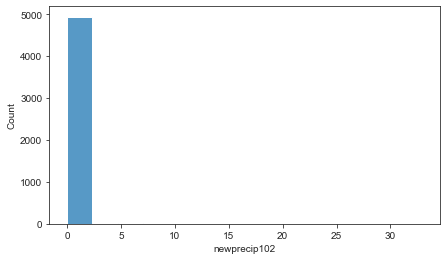

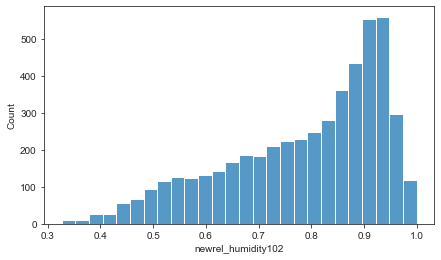

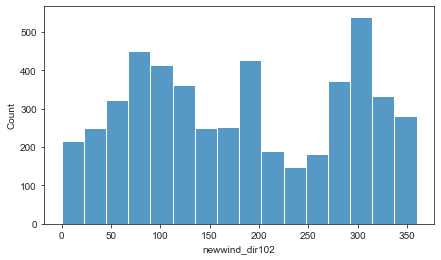

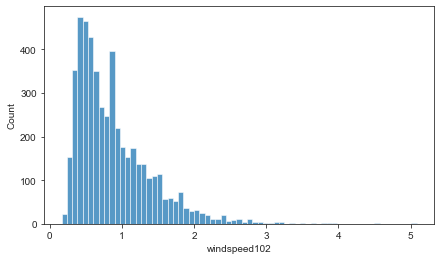

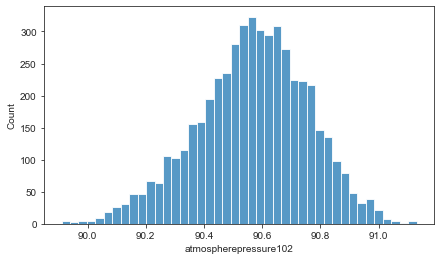

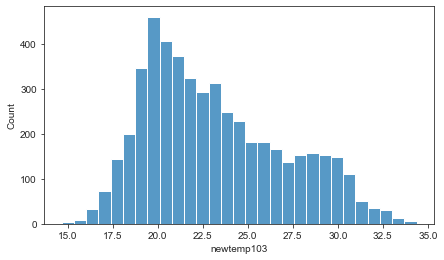

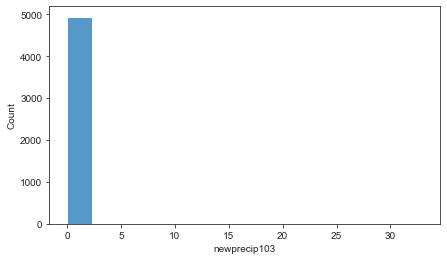

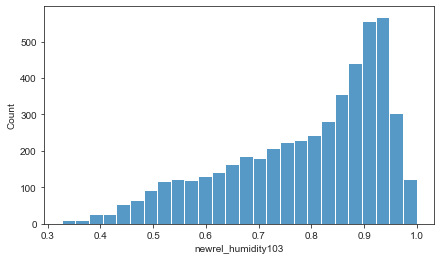

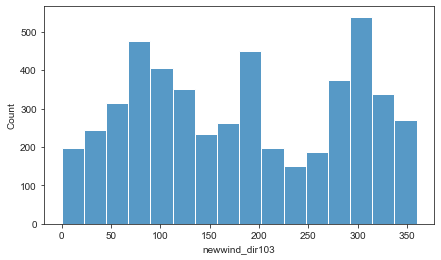

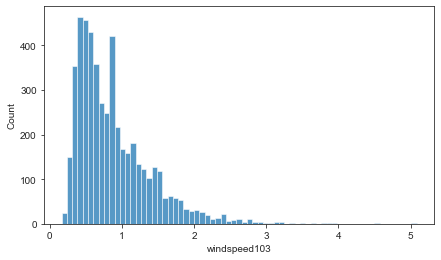

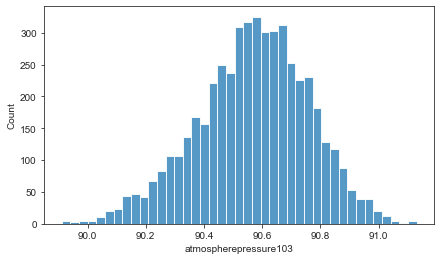

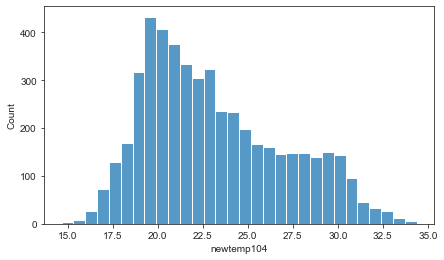

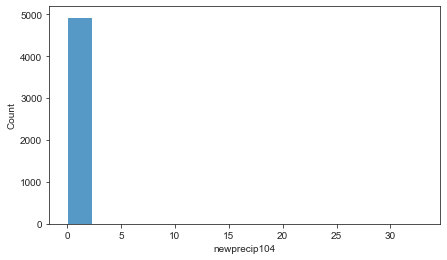

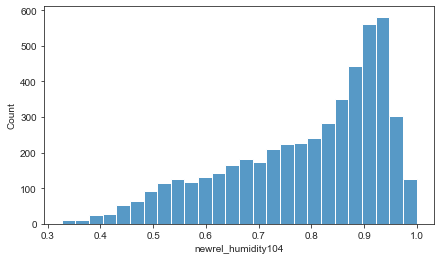

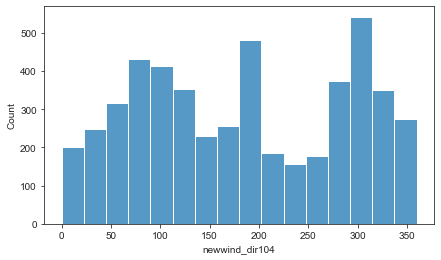

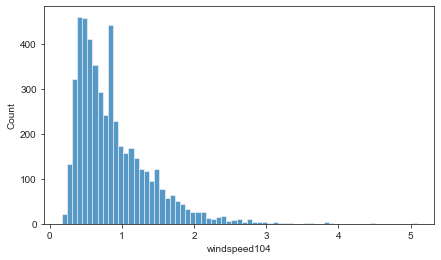

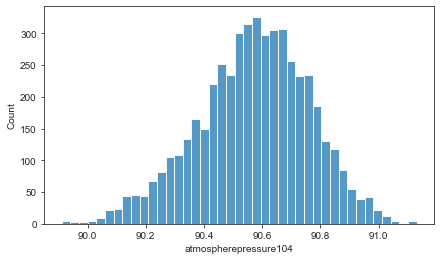

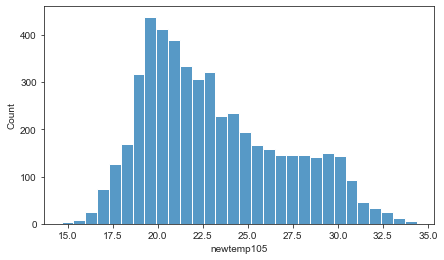

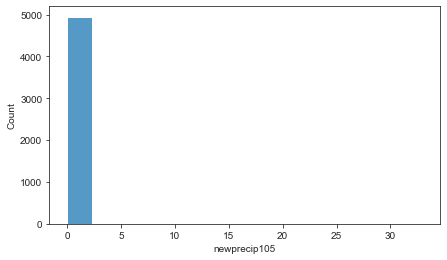

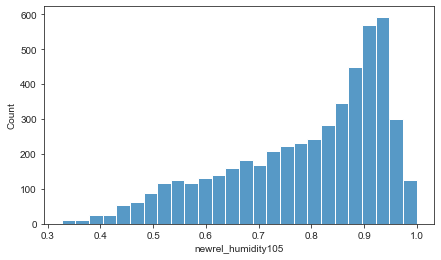

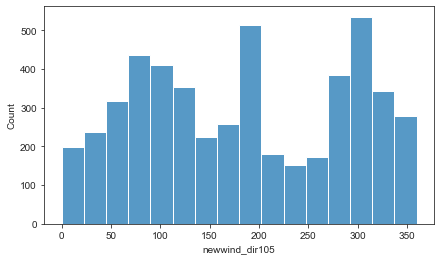

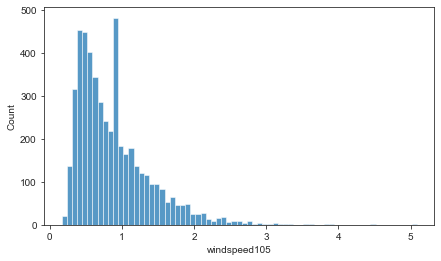

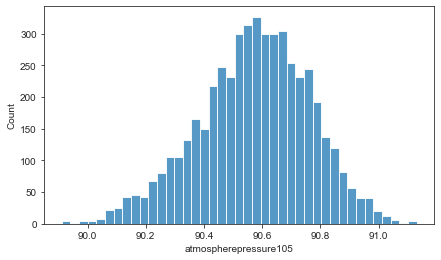

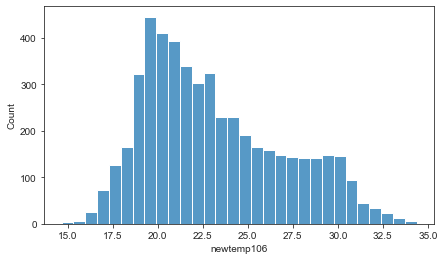

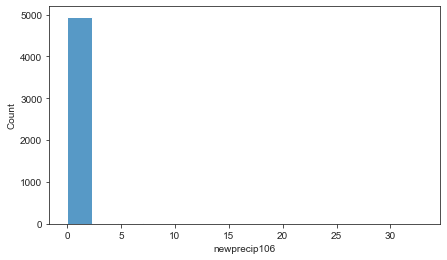

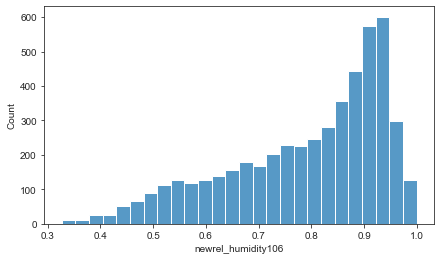

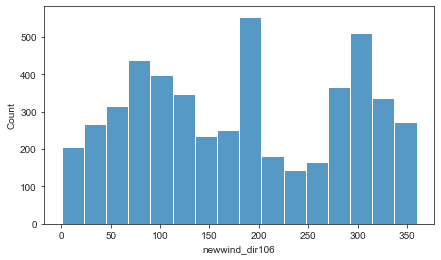

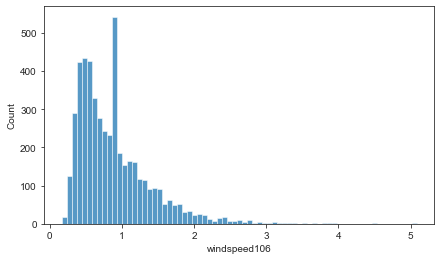

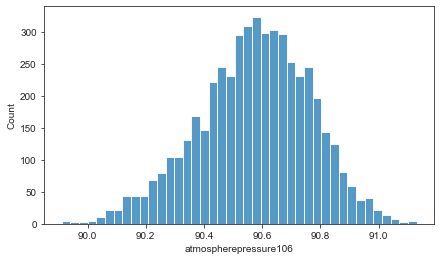

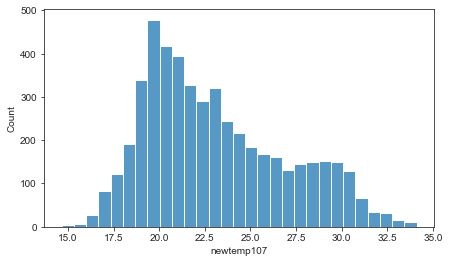

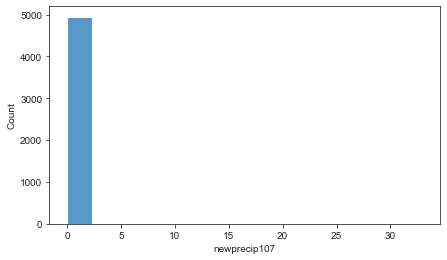

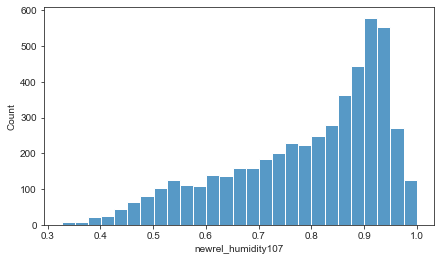

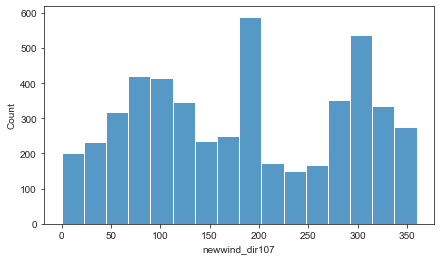

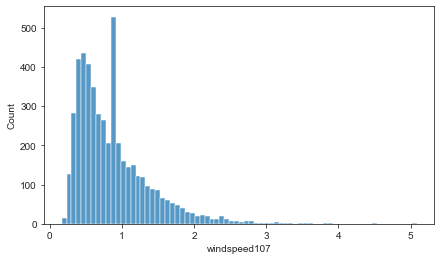

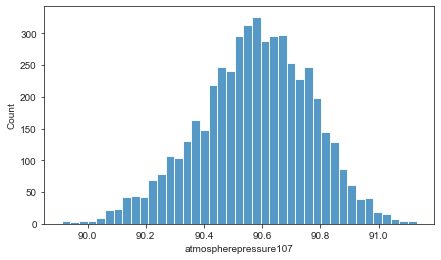

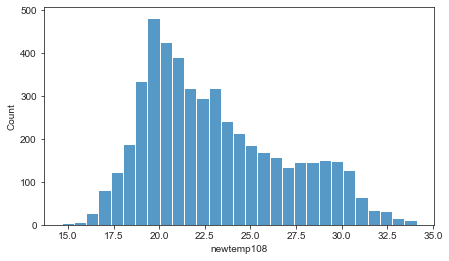

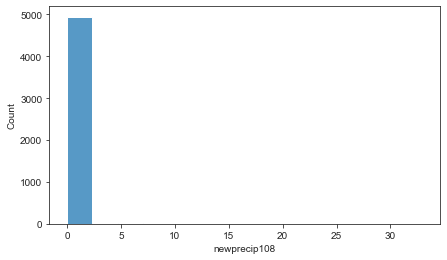

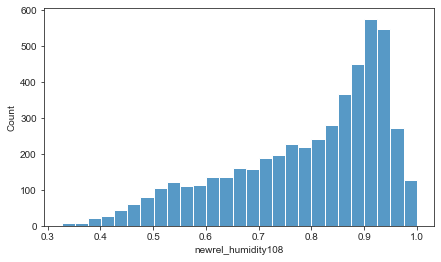

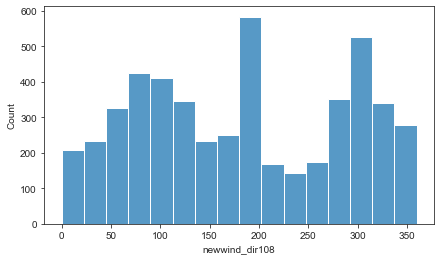

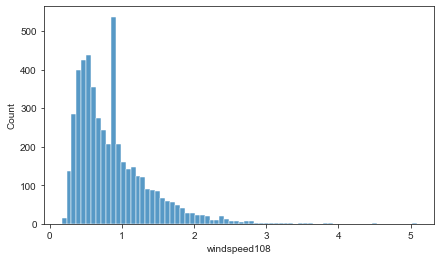

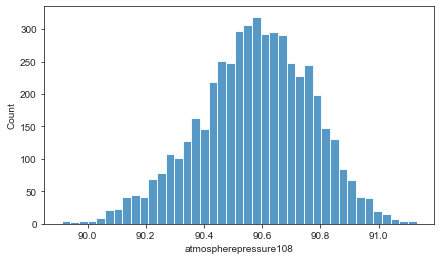

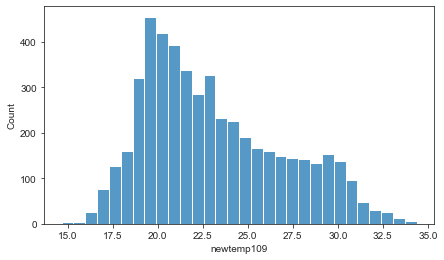

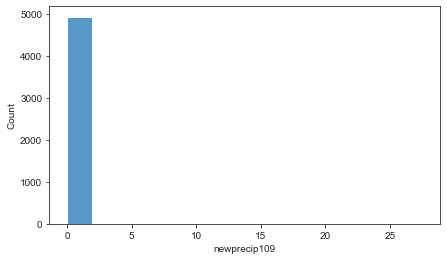

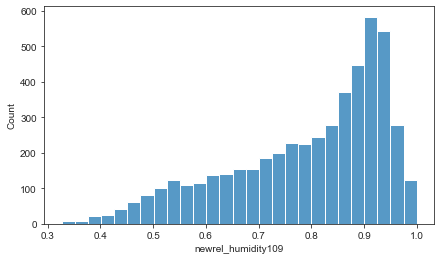

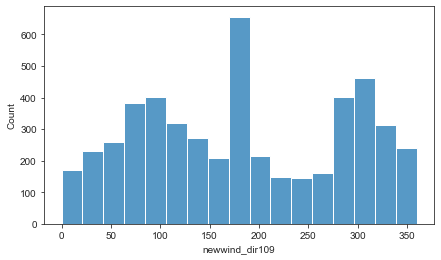

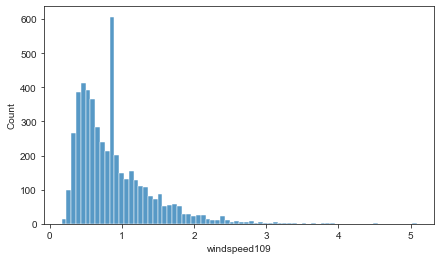

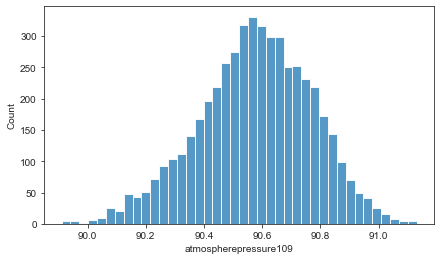

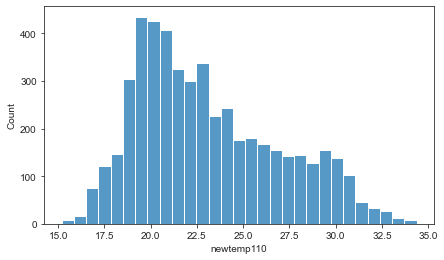

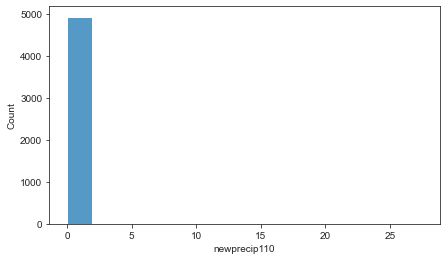

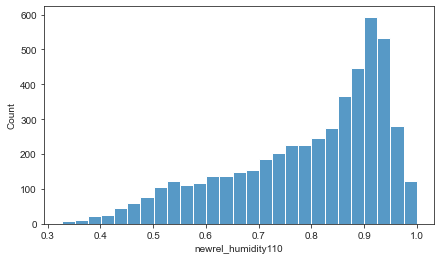

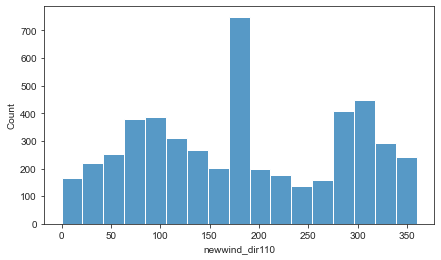

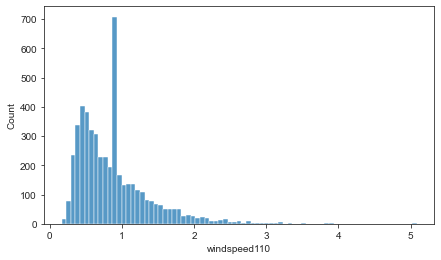

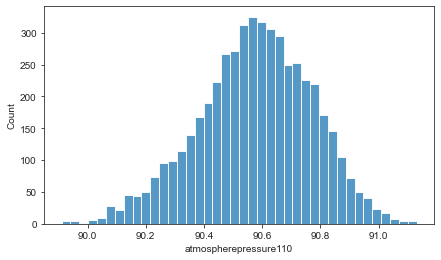

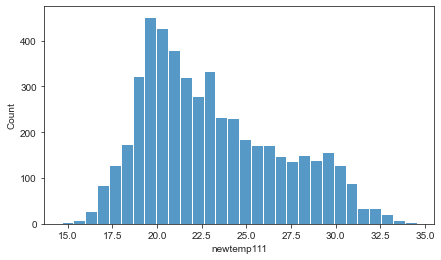

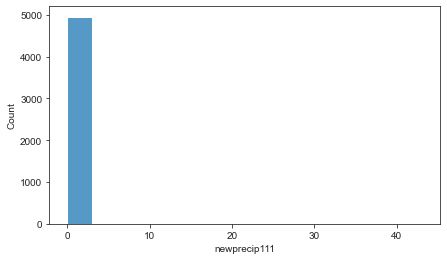

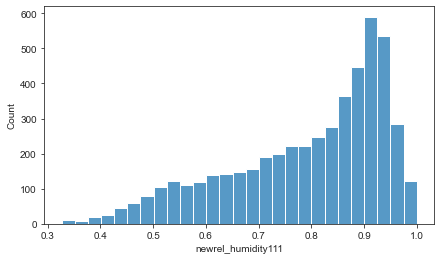

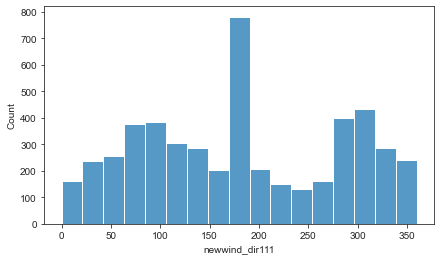

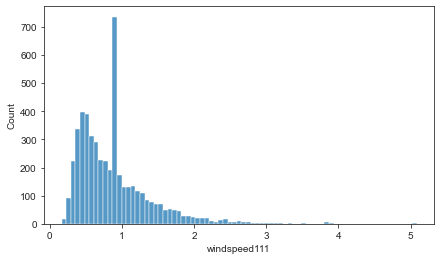

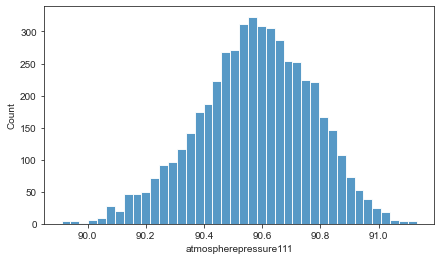

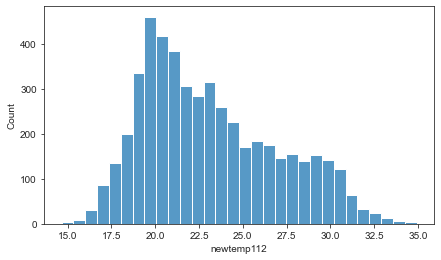

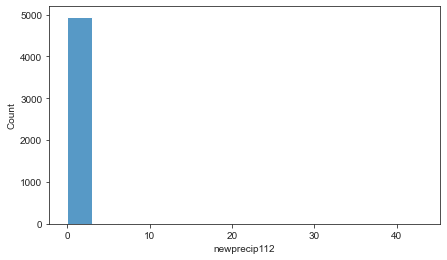

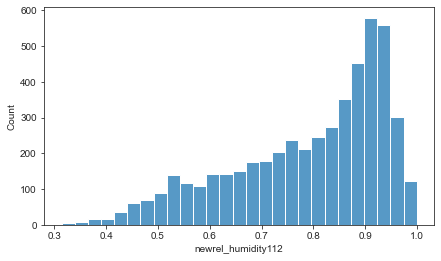

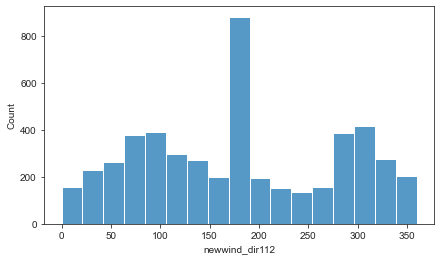

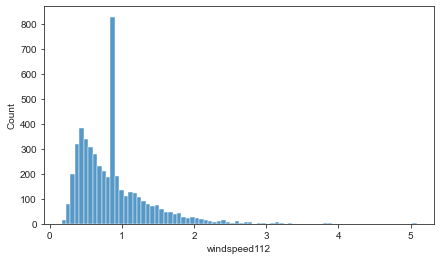

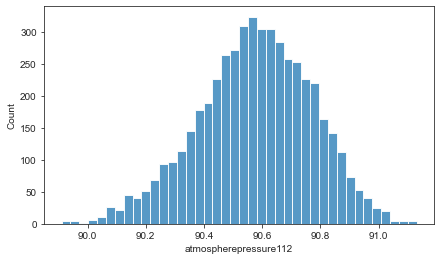

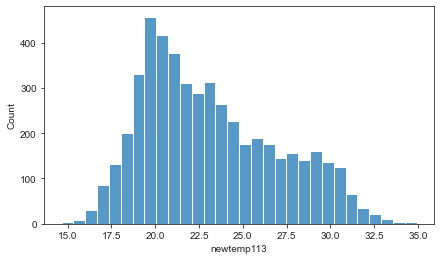

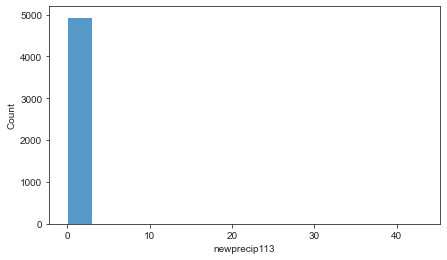

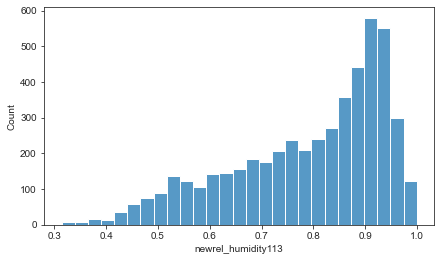

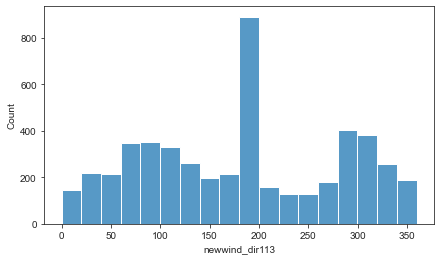

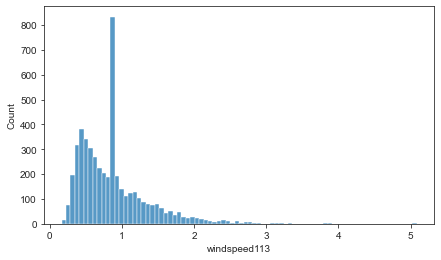

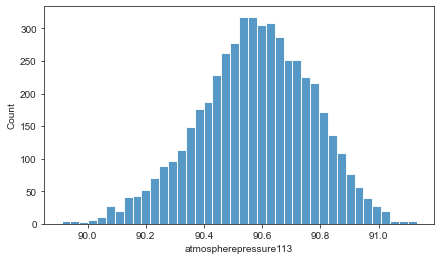

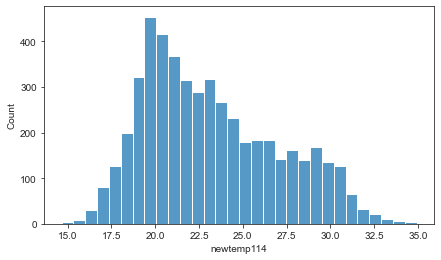

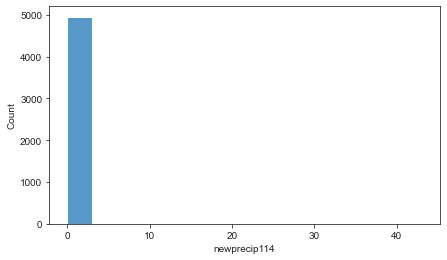

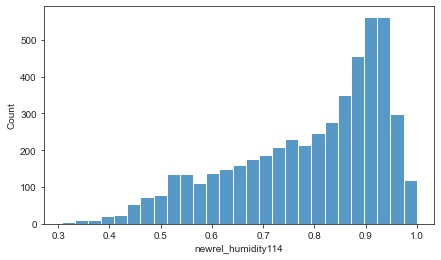

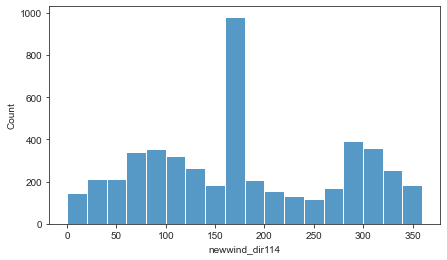

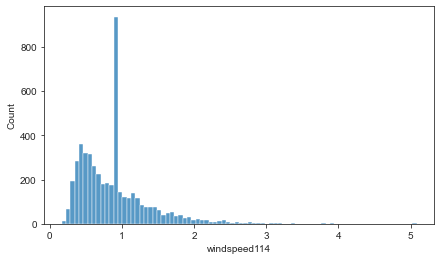

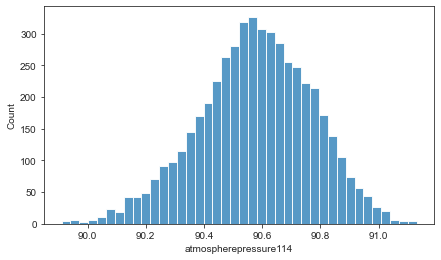

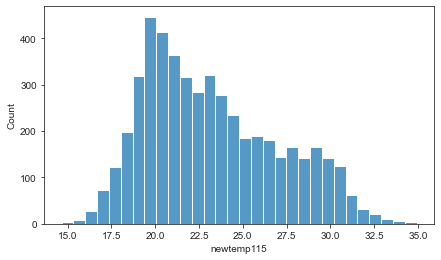

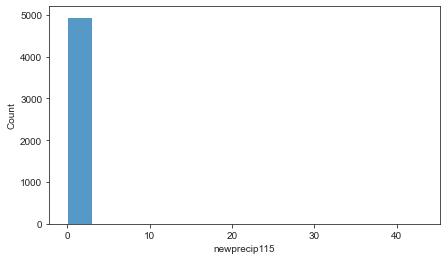

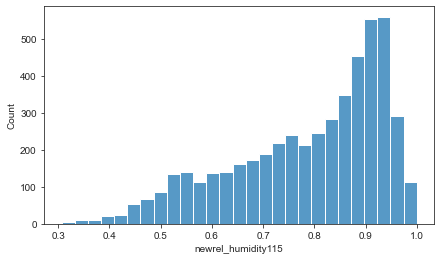

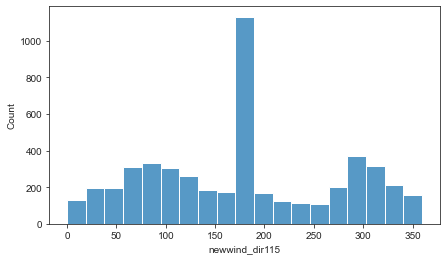

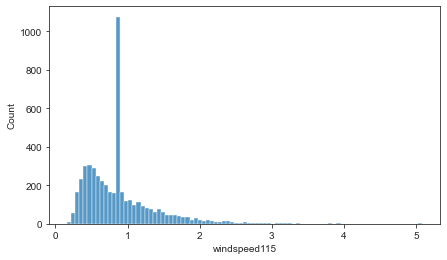

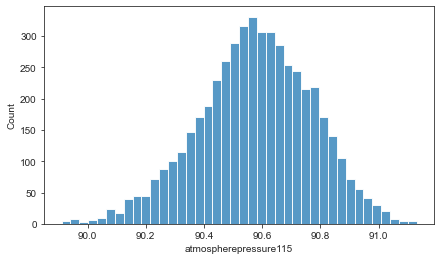

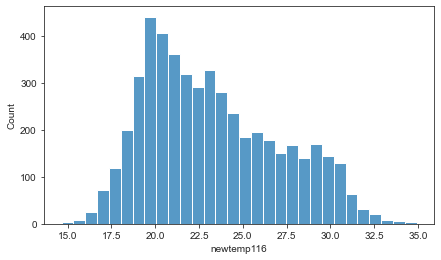

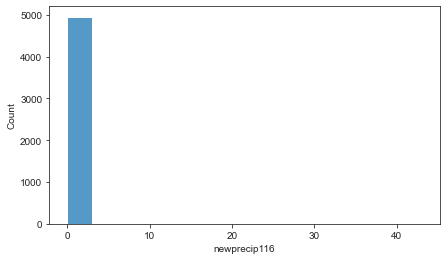

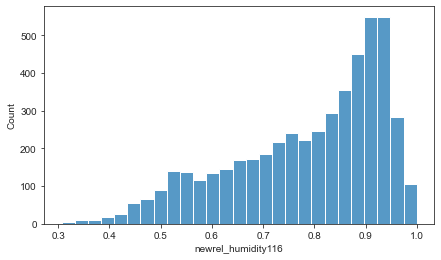

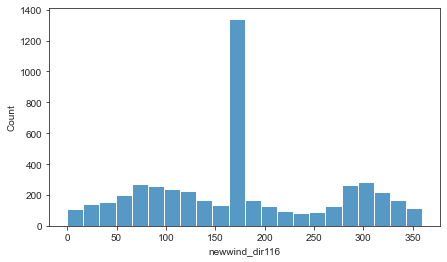

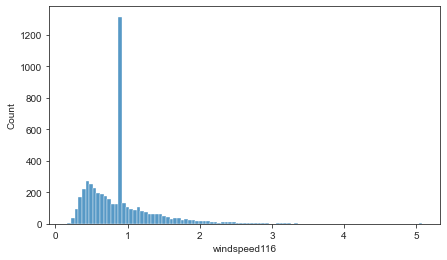

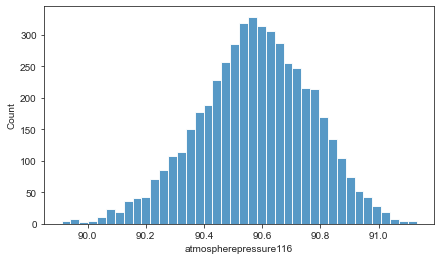

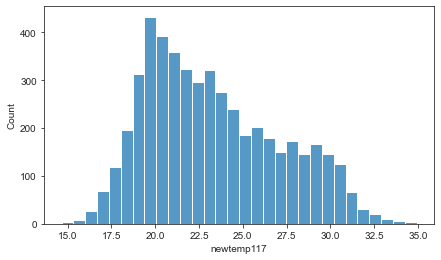

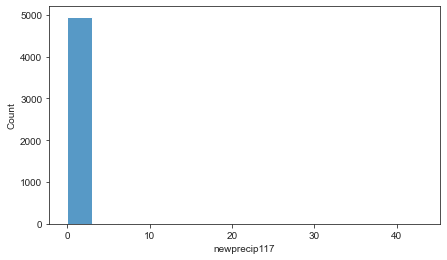

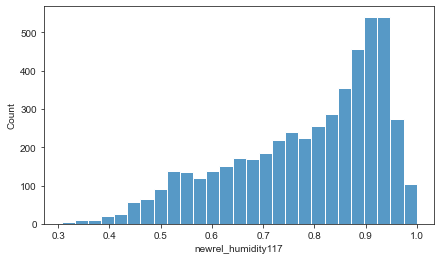

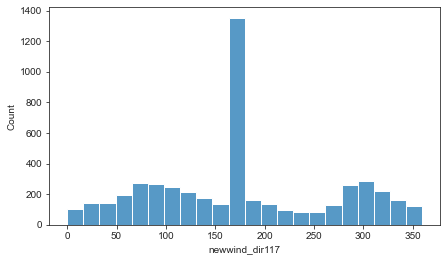

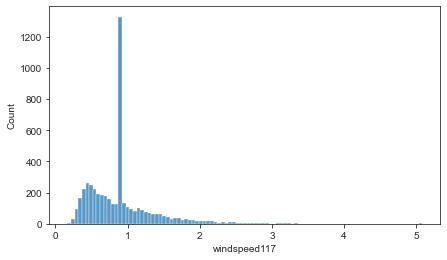

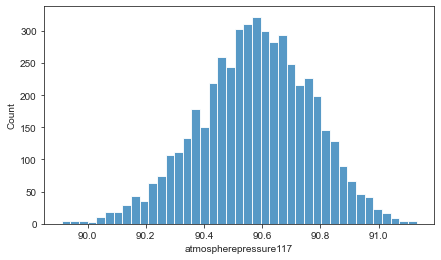

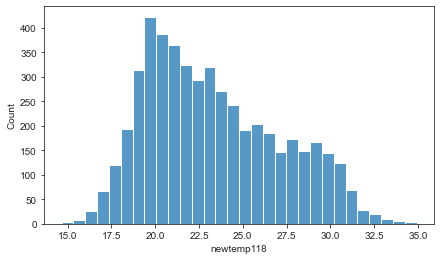

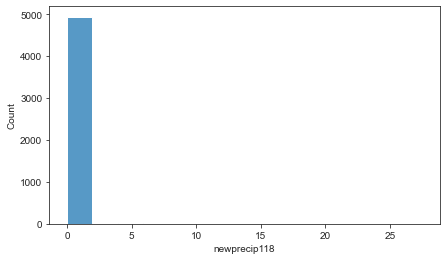

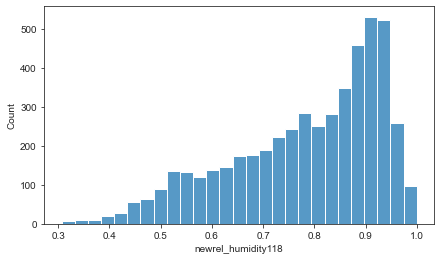

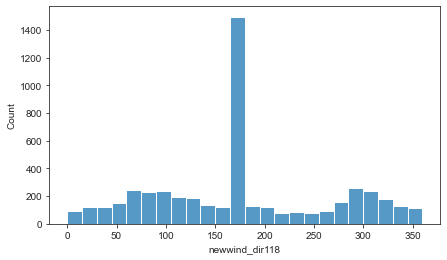

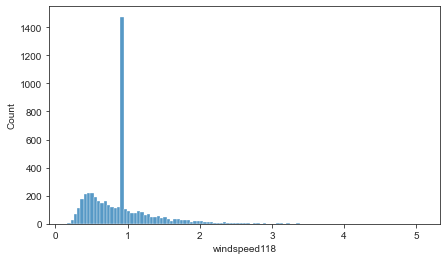

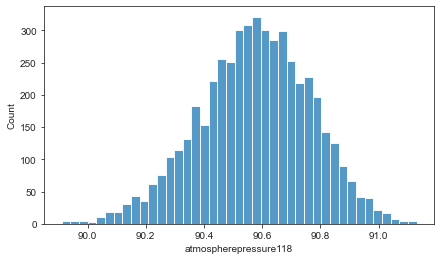

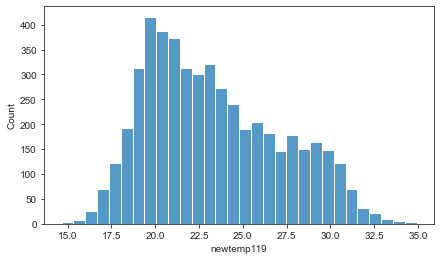

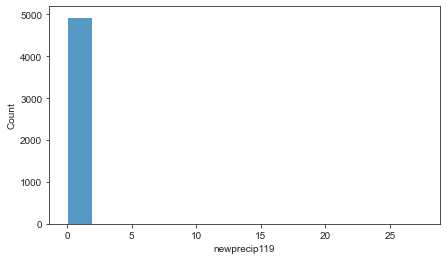

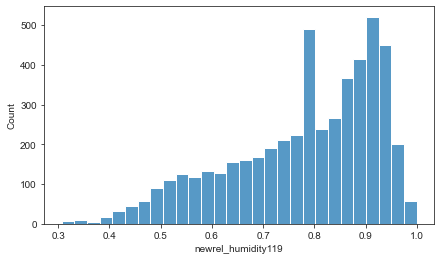

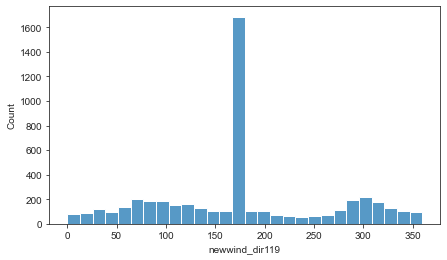

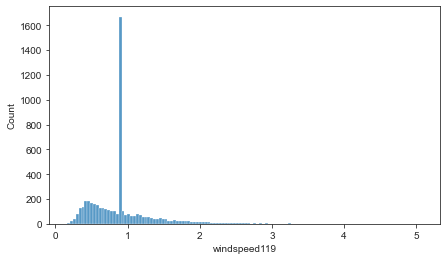

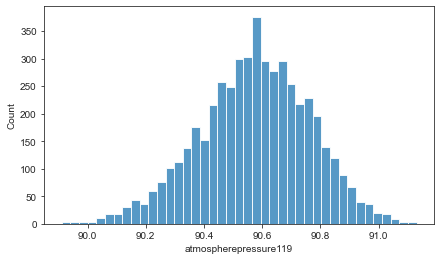

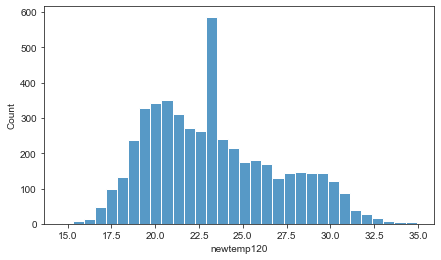

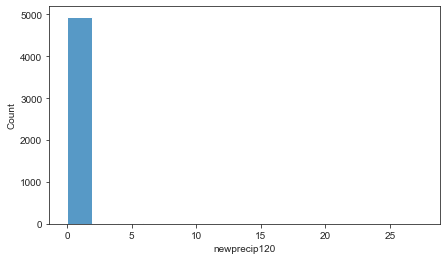

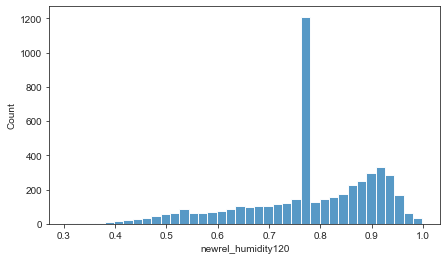

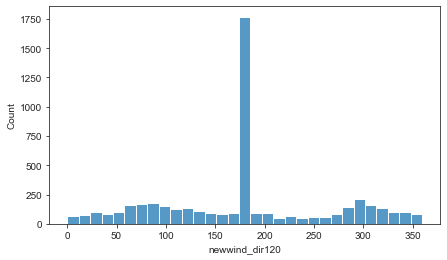

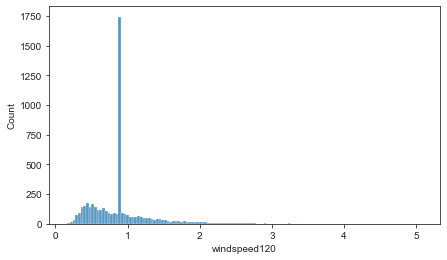

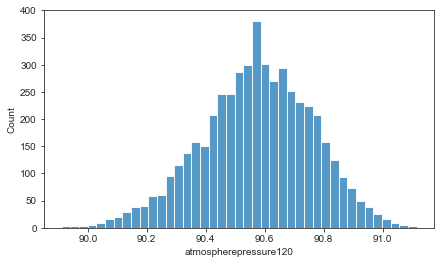

In [24]:
for i, col in enumerate(train.columns):
    plt.figure()
    sns.histplot(data = train, x = col)

convert precip to log

In [ ]:
#train['log_mean_precip'] = train['mean_precip'].apply(np.log1p)	

<AxesSubplot:xlabel='log_mean_precip', ylabel='Count'>

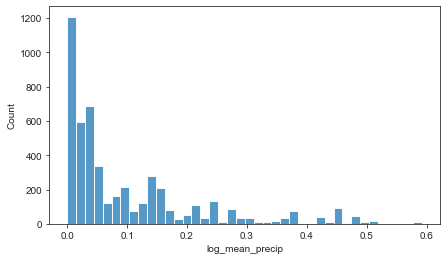

In [ ]:
sns.histplot(data = train, x='log_mean_precip')

In [ ]:
from scipy import special
# box - cox transform
precipitation = train['mean_precip']
#pos_precipitation = precipitation[precipitation > 0]


In [ ]:
precip_boxcox1p = special.boxcox1p(precipitation, 0.01)

<AxesSubplot:xlabel='mean_precip', ylabel='Count'>

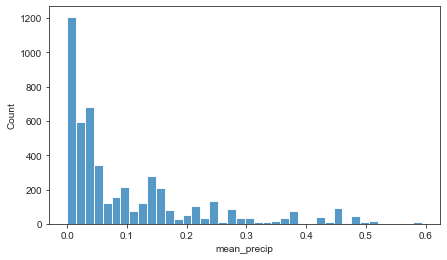

In [ ]:
sns.histplot(precip_boxcox1p)

### linreg with log_mean_precip instead of mean_prec

In [ ]:
columns_to_drop = ['target', 'mean_precip']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 7)
y: (4990,)
X_train: (3493, 7)
y_train: (3493,)
X_test: (1497, 7)
y_test: (1497,)


In [ ]:
X_train.head()

location  mean_temp  mean_rel_humidity  mean_wind_dir  mean_wind_spd  \
11299         3  23.963636           0.708059     196.573637       0.851281   
109           3  24.263636           0.752149     156.035714       1.074477   
9450          3  22.750826           0.843579     175.614937       0.805337   
3567          3  22.372620           0.808041     177.387662       1.028086   
10270         3  23.411088           0.751764     191.836646       0.865372   

       mean_atmos_press  log_mean_precip  
11299         90.552466         0.008116  
109           90.464979         0.303258  
9450          90.333519         0.071752  
3567          90.596577         0.220655  
10270         90.691853         0.058394

RSME _ train: 28.09
RSME _ test: 29.84


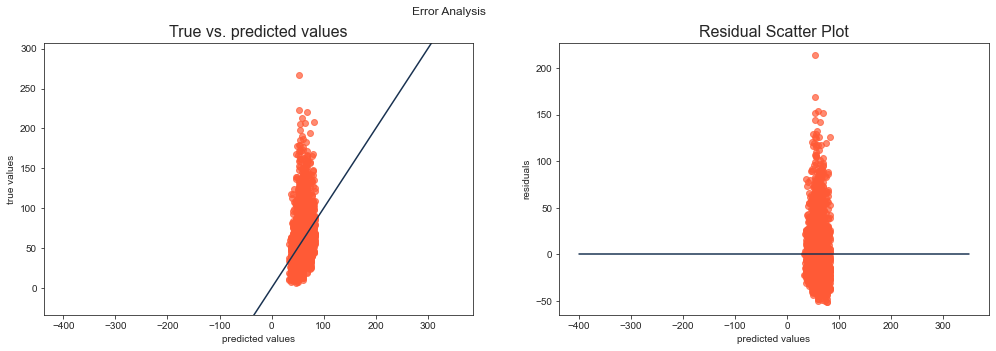

In [ ]:

# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X_train, y_train)


# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RSME
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### linear regression with cat precipitation

In [ ]:
# data preprocessing: 
train.head()

location     target  mean_temp  mean_precip  mean_rel_humidity  \
1          3  79.131702  24.679063     0.007025           0.758058   
10         3  55.638261  23.189507     0.094843           0.789361   
13         3  32.240851  23.151446     0.019826           0.846708   
15         3  72.717021  22.341529     0.169471           0.831924   
22         3  35.833571  22.401240     0.529488           0.844606   

    mean_wind_dir  mean_wind_spd  mean_atmos_press  log_mean_precip  
1      177.109855       0.899208         90.429924         0.007000  
10     157.660400       1.101989         90.624814         0.090611  
13     186.973246       0.770193         90.454477         0.019632  
15     184.881884       0.737514         90.607307         0.156552  
22     201.836702       0.795768         90.600544         0.424933

In [ ]:
def rain(x):
    if x == 0: return 0
    else: return 1

train['rain'] = train['mean_precip'].apply(lambda x : rain(x))
train.head()

location     target  mean_temp  mean_precip  mean_rel_humidity  \
1          3  79.131702  24.679063     0.007025           0.758058   
10         3  55.638261  23.189507     0.094843           0.789361   
13         3  32.240851  23.151446     0.019826           0.846708   
15         3  72.717021  22.341529     0.169471           0.831924   
22         3  35.833571  22.401240     0.529488           0.844606   

    mean_wind_dir  mean_wind_spd  mean_atmos_press  log_mean_precip  rain  
1      177.109855       0.899208         90.429924         0.007000     1  
10     157.660400       1.101989         90.624814         0.090611     1  
13     186.973246       0.770193         90.454477         0.019632     1  
15     184.881884       0.737514         90.607307         0.156552     1  
22     201.836702       0.795768         90.600544         0.424933     1

In [ ]:
columns_to_drop = ['target', 'mean_precip', 'log_mean_precip']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 7)
y: (4990,)
X_train: (3493, 7)
y_train: (3493,)
X_test: (1497, 7)
y_test: (1497,)


In [ ]:
X_train.head()

location  mean_temp  mean_rel_humidity  mean_wind_dir  mean_wind_spd  \
11299         3  23.963636           0.708059     196.573637       0.851281   
109           3  24.263636           0.752149     156.035714       1.074477   
9450          3  22.750826           0.843579     175.614937       0.805337   
3567          3  22.372620           0.808041     177.387662       1.028086   
10270         3  23.411088           0.751764     191.836646       0.865372   

       mean_atmos_press  rain  
11299         90.552466     1  
109           90.464979     1  
9450          90.333519     1  
3567          90.596577     1  
10270         90.691853     1

RSME _ train: 28.02
RSME _ test: 29.85


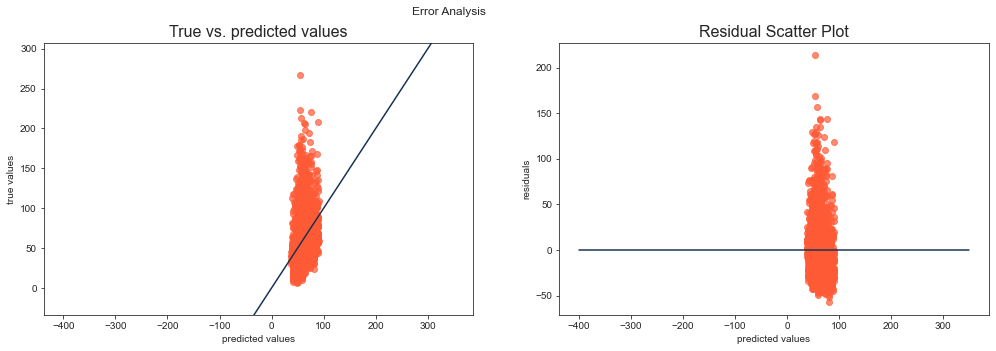

In [ ]:

# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X_train, y_train)


# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RSME
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

In [ ]:
### lasso 

RSME _ train: 28.87
RSME _ test: 30.81


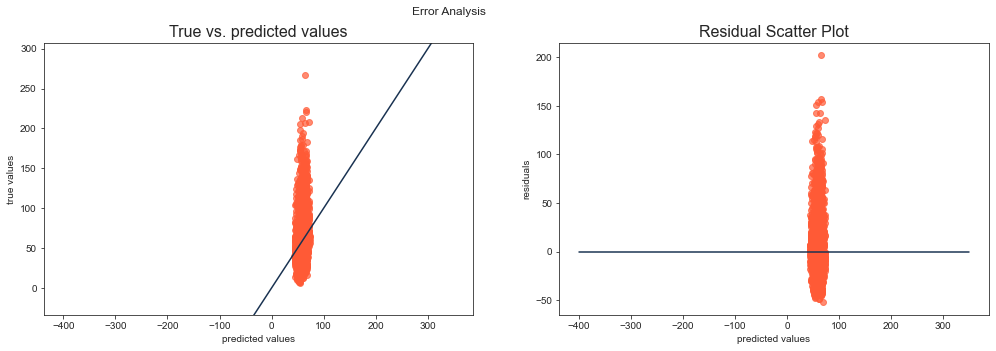

In [ ]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)
